# <center>Drawing with circles</center>
<center>By Denis Zahariev</center>

Download this notebook from: https://github.com/DeniBademi/Fourier-Series-drawing-replicator

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.animation as animation
import scipy.fftpack

Table of contents:
1. [Introduction](#introduction)
    1. [What is a signal?](#What_is_a_signal?)
    2. [What is Fourier Transform?](#What_is_Fourier_Transform?)
        1. [What is time domain? What is frequency domain?](#What_is_time_domain?_What_is_frequency_domain?)
    3. [What is Fourier Series?](#Why_Scrape_the_Web?)
        1. [What is the difference between Fourier Series and Fourier Transforms?](#What_is_the_difference_between_Fourier_Series_and_Fourier_Transforms?)
<br>
<br>
2. [Fourier Transform](#Fourier_Transform)
    1. [Definition](#Definition_FT)
    2. [Why Fourier Transform?](#Why_Fourier_Transform?)
    3. [Inverse Fourier Transform](#Inverse_Fourier_Transform)
    4. [Applications](#Applications_FT)
    5. [Examples with code(maybe)](#)
<br>
<br>
3. [Fourier Series](#Fourier_Series)
    1. [Definition](#Definition_FS)
    2. [Applications](#Applications_FS)
    3. [Examples with code](#)
<br>
<br>   
4. [Matplotlib animations](#Matplotlib_animations)
    1. [Basic animations](#Basic_animations)
    2. [Mouse input](#Mouse_input)
    3. [Mouse controller](#Mouse_controller)
    4. [Examples with code](#)
<br>
<br>  
5. [Coding a program to draw with circles](#Coding_a_program_to_draw_with_circles)
    1. [Retrieving a doodle on a coordinate system](#Retrieving_a_doodle_on_a_coordinate_system)
    2. [Calculating the Fourier coefficients](#Calculating_the_Fourier_coefficients)
    3. [Setting up the animations for drawing](#Setting_up_the_animations_for_drawing])
<br>
<br> 
6. [Conclusion](#Conclusion)
   

# 1. Introduction <a class="anchor" id="introduction"></a>

This idea for project originally started with the Fourier Series drawings of different objects, doodles, images, especially the cat curve in a 2d canvas. Our purpose here is to go through all of what seems to be math magic at a first glance that happens behind the scences of those mesmerizing animations. At the end however, we will know much more than how to make those animations.


We will first talk signals and the great Fourier's inventions. Fourier Transform and Fourier Series play a big role in many fields of computer science, perhaps the most important mathematical tools in signal processing. After we dive in what those two mean, what they can do for use and learn about their useful applications, we will go through matplotlib's animation functionality, its features and properties. At the end, we will put everything together to create a program that we can draw on and then see it replicate our drawing itself using Fourier Series.

## 1.A What is a signal? <a class="anchor" id="What_is_a_signal?"></a>

To get a clear understanding of what a signal is we will we will avoid the definitions for unrelevant science disciplines. What we are focusing on in this notebook is the signal in the context of computers and electronics. 


### Definiton

In electronics, a signal is often a time-varying voltage, current or other form that is also an electromagnetic wave carrying data(information).

Although useful, for this paper, we do not need to know the stuff happening on such deep level. We can look at signals like __functions__ that change through time.

### Characteristics


<u>__Signals can be continuous and discrete time.__</u>
<br><br>
A signal is said to be continuous when it is defined for all instants of time.

<center>
    <figure>
    <img alt="Continuous signal" src="https://www.tutorialspoint.com/signals_and_systems/images/continuous_signal.png"></img>
    <figcaption><strong>Continuous signal</strong></figcaption>
</figure></center>


A signal is said to be discrete when it is defined at only discrete instants of time.

<center>
    <figure>
    <img alt="Discrete signal" src="https://www.tutorialspoint.com/signals_and_systems/images/discrete_signal.png"></img>
    <figcaption><strong>Discrete signal</strong></figcaption>
</figure></center>

<u>__Signals can be deterministic and non-deterministic.__</u>
<br><br>
A signal is said to be deterministic if we are 100% sure about its value at any instant of time. Or, signals which can be defined exactly by a mathematical formula are known as deterministic signals.

<center>
    <figure>
        <img alt="Deterministic signal" src="https://www.tutorialspoint.com/signals_and_systems/images/deterministic_signal.png"></img>
        <figcaption><strong>Deterministic signal</strong></figcaption>
    </figure>
</center>

A signal is said to be non-deterministic if we are unsure about its value at some instant of time. Because they are usually random in nature, the are often called random signals and cannot be described by a mathematical equation.

<center>
    <figure>
        <img alt="Non-deterministic signal" src="https://www.tutorialspoint.com/signals_and_systems/images/nondeterministic_signal.png"></img>
        <figcaption><strong>Non-deterministic signal</strong></figcaption>
    </figure>
</center>


<u>__Signals can be periodic and aperiodic.__</u>
<br><br>
The names speak for themselves - periodic signals repeat over time and aperiodic don't.
Periodic signals are characterised by:
 - Time period (T), measured with standart time metrics.
 - Frequency (f), measured with Hz (or cycles/second).

<center>
    <figure>
    <img alt="Periodic signal" src="https://cnx.org/resources/30a1b6835a157ca617082c7e97bda6132c4dcb26/per_sig.png"></img>
    <figcaption><strong>Periodic signal</strong></figcaption>
</figure></center>

A special case of periodic signals that we will use through this whole notebook are the sine waves and cosine waves.
They are periodic, deterministic signals.

<center>
    <figure>
        <img alt="Sine wave" src="https://www.open.edu/openlearn/ocw/pluginfile.php/871656/mod_oucontent/oucontent/44735/41c12436/9398c104/tm355_bk1_pt1_f006.eps.jpg"></img>
        <figcaption><strong>Sine wave (sinusoid)</strong></figcaption>
    </figure>
</center>


What's cool about periodic signals is that __any non-sinusoidal periodic signal can be regarded as a sum of sinusoids__.

<center>
    <figure>
        <img alt="Sine wave" src="https://www.mathsisfun.com/physics/images/wave-superposition.svg"></img>
        <figcaption><strong>Sine wave (sinusoid)</strong></figcaption>
    </figure>
</center>


They have one more characteristic - __phase__, measured in radians, which defines how shifted the wave is to a side.

To get a better understanding and see it in action, we will use matplotlib to plot 2 sine waves - one with phase and one without.

Let's define a function that will build a pretty plot for us each time we need it:

In [34]:
def plot_sine_wave(f,phase,rangeW):
    """
    Plots sine wave signal with the following parameters
    Parameters:
        f : frequency of sine wave in Hertz
        phase : desired phase shift in radians
        rangeW: desired time interval in seconds
    Returns:
        Nothing
    Example:
        f=10; phase = 1/3*np.pi; rangeW = 2;
        sine_wave(f,phase,rangeW)
    """
    
    fs = 30*f # sampling frequency
    time = np.arange(0,rangeW,1/fs)
    amplitude = np.sin(2*np.pi*f*time + phase) #Amplitude of the sine wave is sine of a variable like time
    plt.plot(time, amplitude, label='f='+str(f)+ ' p='+str(np.round(phase)))
    plt.title('Sine wave f='+str(f)+' Hz | phase=' + str(phase) + ' radians') # plot title
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc="upper right")
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')

Now we can see a sine wave with no phase:

In [35]:
f=1; rangeW=2
phase1 = 0

And one with phase:

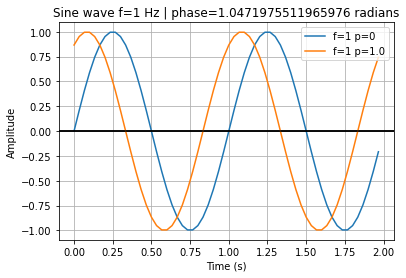

In [36]:
phase2 = 1/3*np.pi
plot_sine_wave(f,phase1,rangeW)
plot_sine_wave(f,phase2,rangeW)

The shape stays the same, but the wave gets shifted a bit to the side. The function may seem like an overkill for now but we will use it later on.

## 1.B What is Fourier Transform? <a class="anchor" id="What_is_Fourier_Transform?"></a>

What is transformation? A transformation is a mapping between two different domains. The Fourier Transform changes information in the time domain into information in the frequency domain and vice versa. The data before and after a transformation may look different, but it is still the same data.
<br><br>
__But why bother transforming?__
<br>
Depending on our use case, we may find one "form" of the data more easy or useful to work with.

A signal in the frequency domain also sometimes shows us data that we might have missed in the time domain

### What is time domain? What is frequency domain? <a class="anchor" id="What_is_time_domain?_What_is_frequency_domain?"></a>

A time domain analysis is an analysis of physical signals like sounds, mathematical functions, or time series, etc. in reference to time. An oscilloscope is a tool commonly used to see real-world signals in the time domain.

<center>
    <figure>
        <img alt="Sine wave" style="width:400px; height:300px" src="https://makeradvisor.com/wp-content/uploads/2019/03/best-oscilloscopes-hobbyists.jpg"></img>
        <figcaption><strong>Oscilloscope</strong></figcaption>
    </figure>
</center>


A time domain graph shows how a signal changes with time in a like waves.


A frequency domain analyses the same signals, but in reference to frequency.  A signal analyzer is used to show the frequencies of a sound versus it's amplitude.

<center>
    <figure>
        <img alt="Signal analyzer" style="width:400px; height:300px" src="https://base.imgix.net/files/base/ebm/mwrf/image/2019/03/mwrf_1132_optimizespectrumanalyzerfigure_3_0.png?auto=format&fit=crop&h=432&w=768"></img>
        <figcaption><strong>Signal analyzer</strong></figcaption>
    </figure>
</center>


A frequency domain graph shows how much of the signal lies within each given frequency band over a range of frequencies like distinct impulses.

For example, if we only have one of those tools, but need the other one, what fourier transform can do for us is to convert the signal between the two domains.

## 1.C What is Fourier Series? <a class="anchor" id="What_is_Fourier_Series?"></a>

Fourier series is a way of representing a periodic function as a (possibly infinite) sum of sine and cosine functions. It is analogous to a Taylor series, which represents functions as possibly infinite sums of monomial terms.

### What is the difference between Fourier Series and Fourier Transforms? <a class="anchor" id="What_is_the_difference_between_Fourier_Series_and_Fourier_Transforms?"></a>

While both of them switch signals into the two domains, they differentiate between the signals they work with.

The Fourier Series is used to represent a periodic function by a discrete sum of complex exponentials, while the Fourier Transform is then used to represent a general, nonperiodic function by a continuous superposition or integral of complex exponentials. The Fourier transform can be viewed as the limit of the Fourier series of a function with the period approaches to infinity, so the limits of integration change from one period to (−∞,∞).

In a classical approach it would not be possible to use the Fourier transform for a periodic function which cannot be in L1(−∞,∞). The use of generalized functions, however, frees us of that restriction and makes it possible to look at the Fourier transform of a periodic function. It can be shown that the Fourier series coefficients of a periodic function are sampled values of the Fourier transform of one period of the function.

# 2.Fourier Transform

Humans very easily perform Fourier Transform mechanically everyday. For example, when you are in a room with a great deal of noise and you selectively hear your name above the noise, then you just performed Fourier Transform.

The Fourier Transform is used to switch continuous signals between the time and frequency domain, where it represents them as sinusoids. It is not limited to functions of time, but the domain of the original function is commonly reffered as the time domain.

__Why sinusoids?__

Because sinusoids are the only waveform that doesn't change shape when subjected to a __linear time-invariant system__ (LTI). That is, if we amplify the signal, the wave shape doesn't change.
 
 
__Linearity of the Fourier Transform__

An impulse in time can be thought of as an infinite sum of sinusoids at every possible frequency. The output result then is the sum of the responses to each frequency.

## 2.A Definition <a class="anchor" id="Definition_FT"></a>

The Fourier Transform of a function $g$ with a theoretically infinite interval is conventionally market with circumflex(hat).
For any real number $t$(time), the commonly used definition is


$$  \hat g(f) = \int _\limits{-\infty} ^{\infty} g(t)e ^{-2\pi if t}dt $$

While that is the theory, nothing stops us from having a finite interval in cases like sound editing, etc.  We see that once transformed, the function $\hat g$ no longer takes time as an input, but a frequency $f$.

## 2.B Why Fourier Transform? <a class="anchor" id="Why_Fourier_Transform?"></a>

For every field the Fourier Transform is applied in there is a different reason why it is so useful. In general, it is an extremely powerful mathematical tool that can break down a comlicated signal in the time domain into something that is easier to work with, thus make several difficult problems become very simple to analyze.


## 2.C Inverse Fourier Transform <a class="anchor" id="Inverse_Fourier_Transform"></a>

The statement that $g$ can be reconstructed from $ \hat g$ is known as the Fourier inversion theorem. The inverse Fourier Transform is used to switch a signal from the frequency domain to the original domain.




If we had a finite number of signals with no phase, we could write their function in the time domain like so:
    
$$ f(x) = \sum A(f)\cos\left( 2\pi f t \right) $$

where $A(f)$ is the amplitude of each frequency. We then multiply the amplitude of that frequency with the cosine of that frequency.

If we have a continuous spectrum of frequencies, we can write it as an integral:

$$  g(f) = \int _\limits{-\infty} ^{\infty} A(f)\cos\left( 2\pi f t \right)df $$

However, signals usually do have phase and at this point we don't take care of that anywhere in our equation. It is more elegant to described phase and amplitude with a complex number. We can describe sines and cosines in the complex plain using Euler's formula:

$$ e^{it} = \cos(t) + i\sin(t) $$

The final equation we get is the mighty definition of the inverse Fourier Transform:

$$  g(f) = \int _\limits{-\infty} ^{\infty} \hat g(t)e ^{2\pi i f t}dt $$

The equation looks similar as well. 

## 2.D Applications <a class="anchor" id="Applications_FT"></a>

The Fourier Transform method is applicable in many fields of science & technology such as
1. __Circuit Analysis__

There are many linear circuits used in Electronic engineering field. These circuits include various components like
capacitor, inductor ,resistor etc. Every Electronic circuit can be modelled using mathematical equations.

2. __Cell phones__

The principle of Fourier Transform is used in signal, such as sound produced by a musical instrument. Sound recordings can be represented as the sum of a collection of sine and cosine waves with various frequencies and amplitudes. 
This collection of waves can then be manipulated with relative ease. Our mobile phone has
performing Fourier Transform. Every mobile device – such as netbook, tablet ,and phone have been built in high
speed cellular connection, just like Fourier Transform.

3. __Image processing__

The Fourier Transform is used if we want to access the geometric characteristics of a spatial domain image. Because
the image in the Fourier domain is decomposed into its sinusoidal components, it is easy to examine or process certain
frequencies of the image, thus influencing the geometric structure in the spatial domain.


4. __Signal processing__

The Fourier Transform is extensively used in the field of signal processing and probably
the most important tool for analyzing signals in that entire field. When we view the Fourier Transform of the output of a system (signal), we know how the system reacts to every possible frequency. Fourier Transform visualizes the affect of an LTI system simple and the analysis much easier. The Fourier Transform is extensively used in LTI system theory, filtering and signal processing. In fact, the majority of the analysis takes place in the frequency domain, making the understanding of Fourier Theory indispensable.


In computer science, there are 2 popular methods of doing Fourier transformation:

 - The __Discrete Fourier Transform (DFT)__ is the mathematical operation that we defined so far. 
 - The __Fast Fourier Transform (FFT)__, often misconcepted for the DFT, is only an efficient algorithm for the evaluation of that operation.
 
 Conveniently for us, Numpy has an implementation of both the __Fast Fourier Transform (FFT)__ and __Inverse Fast Fourier Transform (IFFT)__.

## 2.E Examples with code <a class="anchor" id="Examples_with_code_FT"></a>

If we were to have 2 signals with frequency 1 and 2 Hz in the frequency domain, so far we can plot their waves separately in the time domain.

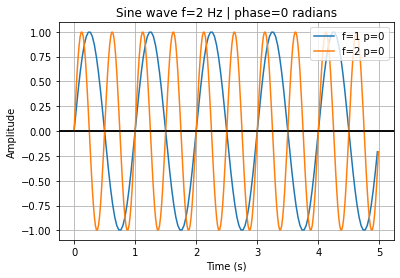

In [37]:
phase = 0; 
rangeW = 5

# SIGNAL 1
frequency1 = 1

# SIGNAL 2
frequency2 = 2

plot_sine_wave(frequency1,phase,rangeW)
plot_sine_wave(frequency2,phase,rangeW)

But we can also plot a complex wave of both of then with the function we wrote down earlier with a few tweaks to support more input frequencies.

Numpy has a ready implementation of the FFT algorithm, as well as an Inverse Fast Fourier Transform algorithm (IFFT).
We will use them to make the transformation in the frequency domain and back in the time domain.

In [40]:
def plot_complex_wave(frequencies,rangeW, plot_fft=False):
    """
    Plots complex wave signal with the following parameters
    Parameters:
        frequencies : list of frequencies of sine wave in Hertz
        rangeW: desired time interval in seconds
        plot_fft=False: if True, plots the wave in the frequency domain
    Returns:
        If plof_fft=False - An array of y values for the wave
        If plof_fft=True - An array of y values for the wave + frequency domain
    Example:
        f=[1,2]; rangeW = 5;
        plot_complex_wave(f,phase,rangeW, plot_fft=True)
    """
    
    amplitude = 0
    for f in frequencies:
        fs = 30 # sampling frequency
        time = np.arange(0,rangeW,1/fs)
        amplitude += np.sin(2*np.pi*f * time + phase) #Amplitude of the sine wave is sine of a variable like time
    plt.plot(time,amplitude)
    plt.title('Complex wave') # plot title
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
    
    if plot_fft:

        fT= np.fft.fft(amplitude)
        fTransform = fT/len(amplitude)
        fTransform = fTransform[range(len(amplitude)//2)] # Exclude sampling frequency
        N = len(amplitude)
        values = np.arange(N//2)
        T = N/fs
        frequencies = values/T
        
        plt.plot(frequencies, abs(fTransform))
        plt.title('Fourier transform')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')        

        return amplitude, fT
    
    else:
        return amplitude

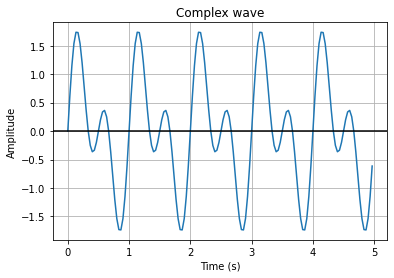

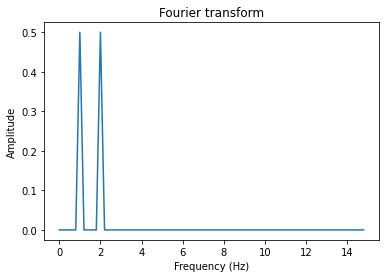

In [39]:
amplitude, fTransform = plot_complex_wave(frequencies=[1,2],rangeW=rangeW, plot_fft=True)

At this point we can do all sorts of manipulations to the signal. In signal processing, this is the time when we exclude any unwanted frequencies.

Applying the Inverse Fourier Transform, we will just return the signal back to its time domain. We should not see a difference compared to the signal graph above.

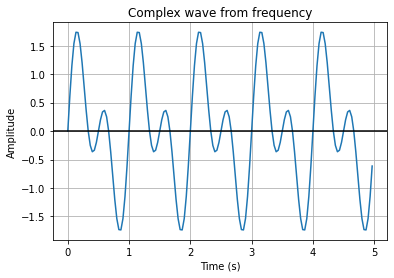

In [41]:
inversed_amplitude = np.fft.ifft(fTransform)
time = np.arange(0,rangeW,1/30)
plt.plot(time,inversed_amplitude.real)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.title('Complex wave from frequency') # plot title
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# 3. Fourier Series <a class="anchor" id="Fourer_Series"></a>

Fourier Series simply states that, periodic signals can be represented into sum of sines and cosines when multiplied with a certain weight called the __Fourier Coefficients__. It further states that periodic signals can be broken down into sines and cosines that are harmonics to each other.

## 3.A Definition <a class="anchor" id="Definition_FS"></a>

### Sine-cosine form

Lets consider a real-valued function $f(x)$ that we can integrate on an interval of length L. 
The analysis process determines the __Fourier Coefficients__, indexed by integer $n$.

The definition of Fourier Coefficients is
$$ a_n = \frac{2}{L} \int_L f(x) \cos\left(\frac{2\pi}{L}nx\right)dx $$
$$ b_n = \frac{2}{L} \int_L f(x) \sin\left(\frac{2\pi}{L}nx\right)dx $$

Optionally $a_0$ and $b_0$ can be defined and shortened like

$$ a_0= \frac{2}{L} \int_L f(x)dx $$

$$ b_0= 0 $$

The actual Fourier Series definition is

$$ f(x) = \frac{a_0}{2} + \sum \limits _{n=0} ^{\infty} a_n \cos\left(n \frac{2\pi x}{L}\right) + b_n\sin\left(n \frac{2\pi x}{L}\right) $$

### Exponential form
If  $f(x)$ is a complex-valued function defined and $L$-periodic on the interval $L$ of a real variable $x$, both components (real and imaginary part) are real-valued functions that can be represented by a Fourier series. The __complex Fourier Coefficients__ are defined by

$$ c_n = \frac{1}{L} \int f(t)e^{-n*2 \pi i \frac{t}{L}} dt$$

and the partial sum are given by:
$$ f(x) = \sum \limits _{n=- \infty}^{\infty} c_n e^{i\frac{2\pi}{L}nx} $$

## 3.B Applications <a class="anchor" id="Applications_FS"></a>

Fourier Series is useful for solving partial differential equations. The motivation of Joseph Fourier, was to solve the __heat equation__, which governs the temperature distribution in an object through time.


Another notable application of Fourier series on the square is in __image compression__. In particular, the jpeg image compression standard uses the two-dimensional discrete cosine transform, which is a Fourier-related transform using only the cosine basis functions.

## 3.C Examples with code

To show Fourier Series doing its job we are going to make an approximation of 2 functions - the hat function and a weirder one.

We will pack to whole code right off the bat in a function that:
1. Creates a plot and plots the real function in black
2. Calculates Fourier Coefficients
    1. Calculates the y average of the function
    2. Calculates the coefficients for the real(A) and imaginary(B) part.
3. Plots the approximations for each new wave added in different color.

In [45]:
def fourier_transform(x, f,dx):
    """
    Plots Fourier Series approximation in colored lines along the original signal
    in black
    Parameters:
        x: 1d array of inputs used to create the function f
        f: 1d array of functional values calculated using the x parameter
        dx: the difference between 2 neighbour values.
    Returns:
        Nothing
    Example:
        dx = 0.001
        x = np.arange(-1+dx, 1+dx, dx)
        nquart = int(np.floor(n/4))
        hat = np.zeros_like(x)
        hat[nquart:2*nquart] = (4/n) * np.arange(1,nquart+1)
        hat[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)
        fourier_approximate(x, f,dx)
    """
    fig, ax = plt.subplots()
    ax.plot(x,f,'-',color='k', linewidth=2)
    ax.set_title("Fourier transformation")

    # Calculate Fourier Coefficients
    name = "Accent"
    cmap = get_cmap('tab10')
    colors = cmap.colors
    ax.set_prop_cycle(color = colors)

    A0 = np.sum(f * np.ones_like(x)) * dx # average # multiples the elements in the two arrays with each one
    #501 so we need to normalize
    k = 200
    fFS = A0/2

    A = np.zeros(k)
    B = np.zeros(k)

    for k in range(50):
        A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx
        B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
        fFS += A[k] * np.cos((k+1) * np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
        ax.plot(x,fFS,'-')
    

We define the domain of our function, which we already have(so we have to make a guess about dx) will use a ready function, importing 349 functional values. It has range of -1-dx to 1+dx

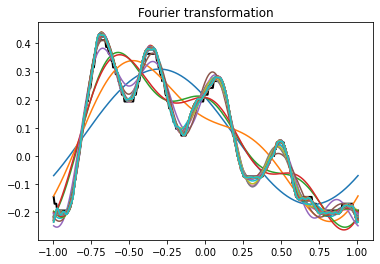

In [46]:
# Define domain
dx = 0.006
L = 1
f=[-0.14516129032258096, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.14516129032258096, -0.14516129032258096, -0.12096774193548399, -0.09677419354838701, -0.07258064516129092, -0.04838709677419395, -0.024193548387096975, 0.0, 0.0, 0.024193548387096087, 0.04838709677419306, 0.07258064516129004, 0.09677419354838612, 0.12096774193548399, 0.14516129032258007, 0.14516129032258007, 0.16935483870967794, 0.19354838709677402, 0.19354838709677402, 0.2177419354838701, 0.24193548387096797, 0.24193548387096797, 0.26612903225806406, 0.29032258064516014, 0.314516129032258, 0.314516129032258, 0.3387096774193541, 0.36290322580645196, 0.38709677419354804, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.41129032258064413, 0.38709677419354804, 0.38709677419354804, 0.38709677419354804, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.3387096774193541, 0.3387096774193541, 0.314516129032258, 0.314516129032258, 0.314516129032258, 0.29032258064516014, 0.29032258064516014, 0.29032258064516014, 0.26612903225806406, 0.26612903225806406, 0.24193548387096797, 0.24193548387096797, 0.2177419354838701, 0.2177419354838701, 0.2177419354838701, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.2177419354838701, 0.2177419354838701, 0.2177419354838701, 0.24193548387096797, 0.24193548387096797, 0.26612903225806406, 0.26612903225806406, 0.29032258064516014, 0.29032258064516014, 
0.314516129032258, 0.3387096774193541, 0.3387096774193541, 0.3387096774193541, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.36290322580645196, 0.3387096774193541, 0.3387096774193541, 0.314516129032258, 0.314516129032258, 0.29032258064516014, 0.29032258064516014, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.24193548387096797, 0.2177419354838701, 0.2177419354838701, 0.19354838709677402, 0.19354838709677402, 0.16935483870967794, 0.16935483870967794, 0.16935483870967794, 0.14516129032258007, 0.14516129032258007, 0.12096774193548399, 0.12096774193548399, 0.12096774193548399, 0.09677419354838612, 0.09677419354838612, 0.09677419354838612, 0.09677419354838612, 0.09677419354838612, 0.09677419354838612, 0.07258064516129004, 0.07258064516129004, 0.07258064516129004, 0.07258064516129004, 0.07258064516129004, 0.07258064516129004, 0.09677419354838612, 0.09677419354838612, 0.12096774193548399, 0.12096774193548399, 0.14516129032258007, 0.14516129032258007, 0.14516129032258007, 0.16935483870967794, 0.16935483870967794, 0.16935483870967794, 0.16935483870967794, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.19354838709677402, 0.2177419354838701, 0.2177419354838701, 0.2177419354838701, 0.2177419354838701, 0.2177419354838701, 0.24193548387096797, 0.24193548387096797, 0.24193548387096797, 0.24193548387096797, 0.24193548387096797, 0.24193548387096797, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.26612903225806406, 0.24193548387096797, 0.24193548387096797, 0.24193548387096797, 0.2177419354838701, 0.2177419354838701, 0.19354838709677402, 0.19354838709677402, 0.16935483870967794, 0.14516129032258007, 0.12096774193548399, 0.12096774193548399, 0.09677419354838612, 0.07258064516129004, 0.07258064516129004, 0.04838709677419306, 0.04838709677419306, 0.024193548387096087, 0.0, 0.0, -0.024193548387096975, -0.024193548387096975, -0.04838709677419395, -0.04838709677419395, -0.04838709677419395, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.07258064516129092, -0.04838709677419395, -0.04838709677419395, -0.04838709677419395, -0.04838709677419395, -0.024193548387096975, -0.024193548387096975, -0.024193548387096975, -0.024193548387096975, 0.0, 0.0, 0.0, 0.0, 0.0, 0.024193548387096087, 0.024193548387096087, 0.04838709677419306, 0.04838709677419306, 0.04838709677419306, 0.04838709677419306, 0.04838709677419306, 0.04838709677419306, 0.04838709677419306, 0.04838709677419306, 0.04838709677419306, 0.024193548387096087, 0.024193548387096087, 0.0, 0.0, 0.0, -0.024193548387096975, -0.024193548387096975, -0.04838709677419395, -0.07258064516129092, -0.09677419354838701, -0.09677419354838701, -0.09677419354838701, -0.12096774193548399, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.14516129032258096, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.16935483870967794, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402, -0.19354838709677402]
x = L * np.linspace(-1+dx, 1+dx, len(f)) # aray of 2000 elements
fourier_transform(x,f,dx)

It is amazing to watch the proggress of the transformation in almost real time. The more sinusoids there are in the equation, the closer the approximation gets to the real thing!

Now, let's try the hat function, the process of the required variables follows the same pattern.

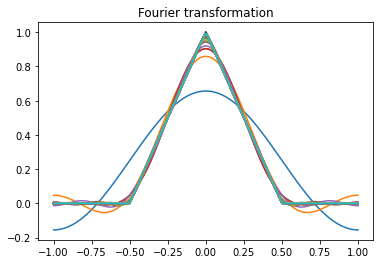

In [47]:
dx = 0.001
L = 1
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)

nquart = int(np.floor(n/4))
hat = np.zeros_like(x)
hat[nquart:2*nquart] = (4/n) * np.arange(1,nquart+1)
hat[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

fourier_transform(x,hat,dx)

    


Lets take a look at the coefficients the transformation makes and the change of error for each term

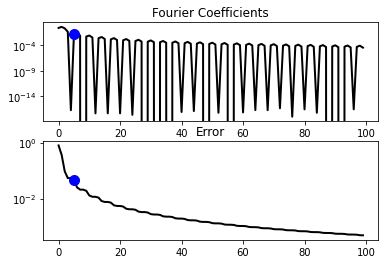

In [48]:
A0 = np.sum(hat * np.ones_like(x)) * dx
fFS = (A0/2) * np.ones_like(hat)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0/2
ERR[0] = np.linalg.norm(hat-fFS)/np.linalg.norm(hat)

for k in range(1,kmax):
    A[k] = np.sum(hat * np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(hat * np.sin(np.pi*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)
    ERR[k] = np.linalg.norm(hat-fFS)/np.linalg.norm(hat)
    
thresh = np.median(ERR) * np.sqrt(kmax) * (4/np.sqrt(3))
r = np.max(np.where(ERR > thresh))

fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax),A,color='k',linewidth=2)
axs[0].semilogy(r,A[r],'o',color='b',markersize=10)
plt.sca(axs[0])
plt.title('Fourier Coefficients')

axs[1].semilogy(np.arange(kmax),ERR,color='k',linewidth=2)
axs[1].semilogy(r,ERR[r],'o',color='b',markersize=10)
plt.sca(axs[1])
plt.title('Error')

plt.show()

This is exactly what we want to see. The more coefficients we calculate, the smaller the error rate gets.

# 4. Matplotlib animations<a class="anchor" id="Matplotlib_animations"></a>

Apart from showing amazing visualizations of functions, graphs, etc. , matplotlib allows us to make animations! There are three classes available:
1. __Animation__ - A base class for Animations.
2. __FuncAnimation__ -	Makes an animation by repeatedly calling a function func.
3. __ArtistAnimation__ - Animation using a fixed set of Artist objects.

To keep the focus on the main idea, we will use the FuncAnimation and abstract ourselves from the other options.

A call of __FuncAnimation__ looks like

```python
FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, **kwargs)
```
where:
 - __fig__ (Figure) - The figure object we are drawing on.
 - __func__ (callable) - The function to call at each frame. The first argument will always be the next frame No., but any additional positional arguments can be supplied via the fargs parameter.
    Example signature is
    ```
    def func(i, *fargs)
    ```
 - __frames__ (iterable), int, generator function, or None, optional - Source of data to pass func and each frame(as `i` in example) of the animation

    If an iterable, then simply use the values provided. If the iterable has a length, it will override the save_count kwarg.
    If an integer, then equivalent to passing range(frames)

 - __init_func__ (callable), optional - A function theat runs once before the first frame.

 - __fargs__ (tuple) or None, optional
    Additional arguments to pass to each call to func.
    
    
 - __interval__ (int), default: 200 - Delay between frames in milliseconds.

 - __blit__ (bool), default: False - Whether blitting is used to optimize drawing.(But has drawbacks, see documentation)
    If blit is True, func must return an iterable of all artists that were modified or created. This information is used by the blitting algorithm to determine which parts of the figure have to be updated. The return value is unused if blit is False and may be omitted in that case.
 

__More about blit__

Blitting is a standard technique in raster graphics that, in the context of Matplotlib, can be used to (drastically) improve performance of interactive figures. For example, the animation and widgets modules use blitting internally.

Blitting speeds up repetitive drawing by rendering all non-changing graphic elements into a background image once. Then, for every draw, only the changing elements need to be drawn onto this background. For example, if the limits of an Axes have not changed, we can render the empty Axes including all ticks and labels once, and only draw the changing data later.

So, when the animation isn't going as smooth as it should(based on the interval) or even freezes, we may try flicking the blit switch.




## 4.A Basic animations <a class="anchor" id="Basic_animations"></a>

Here is a basic animation of... You guessed it! A sine wave!

In [ ]:
%matplotlib inline

In order to view animations in jupyter notebook nicely, we need to use the notebook backend(__notebook__) instead of png graphics(__inline__), when you are done with the animations, run the cell above to undo the changes. 
For now run the cell below:

In [50]:
%matplotlib notebook

<IPython.core.display.Javascript object>


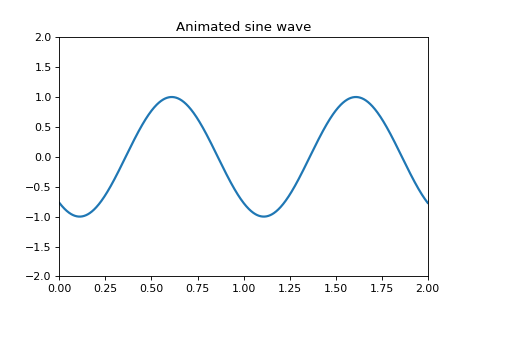

In [51]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_title("Animated sine wave")
ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)



## 4.B Mouse input <a class="anchor" id="Mouse_input"></a>

Matplotlib works with a number of user interface toolkits and in order to support features like interactive panning and zooming of figures, it is helpful to the developers to have an API for interacting with the figure via key presses and mouse movements that is "GUI neutral" so we don't have to repeat a lot of code across the different user interfaces. The triggered events are also a richer than standard GUI events, including information like which Axes the event occurred in. They also understand the Matplotlib coordinate system, and report event locations(pixels and data coordinates). 

An example call 
```python
def onpick(event):
    print ('event', event)
    
fig.canvas.mpl_connect('pick_event', onpick3)
```
`mpl_connect` class function connects a signal to the slot onpick. It will only be called once the signal is triggered (mouse clicked on canvas). At this point the underlying event is provided as an argument in the function call.

Here is an example of that in action:
    

```python
import numpy as np
import matplotlib.pyplot as plt

points_x, points_y, points_color, points_size = np.random.rand(4, 100)

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
col = ax1.scatter(points_x, points_y, 100*points_size, points_color, picker=True)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()
```

Unfortunatelly, jupyter notebook doesn't support interaction with events that easy. If you wish, you can copy this code to an empty file and execute it. Otherwise, here is what it will produce both in the plot and as output.

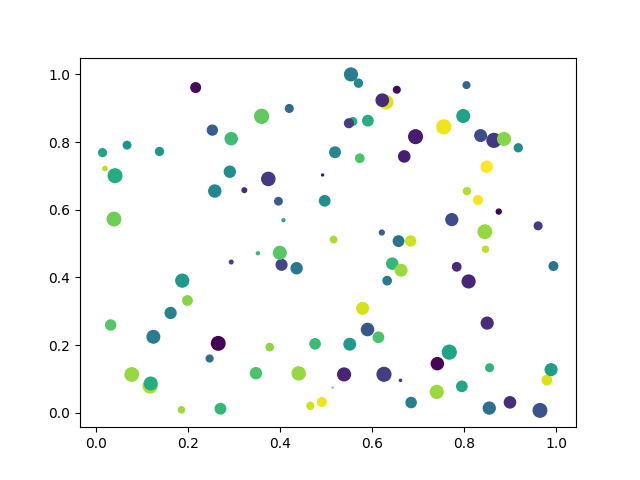

Output after 7 clicks (random places):
```
0.4996988477845476 0.6140281221192474
0.4996988477845476 0.6140281221192474
0.3997337046097044 0.45157708364295746
0.46927467377481275 0.36296742629225387
0.6061834568186197 0.45157708364295746
0.5996639909593908 0.6051671563841771
0.4475431209107163 0.6494719850595289
```

## 4.D Mouse Controller <a class="anchor" id="Mouse_Controller"></a>

The code below defines a `MouseController` class that we will use in our journey to drawing with circles. 

It contains all the necessary slots and connects to the required events in the `connect` method(3 times the same thing from the code above). It manages the user input (hover, key pressed) and returns data to the given plot when the user is pressing a button in an array for further use.


```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

mouse_x, mouse_y = [], []
class MouseController:
    lock = None  # only one can be animated at a time

    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        """Connect to all the events we need."""
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        """Handles button_press_event and locks the animation"""
        
        if (MouseController.lock is not None):
            return

        MouseController.lock = self

       
        
    def on_motion(self, event):
        """Store mouse movement data in the array if button is pressed."""
        if (MouseController.lock is not self):
            return
        
        mouse_x.append(event.xdata)
        mouse_y.append(event.ydata)
        history.set_data(mouse_x,mouse_y)
        
    def on_release(self, event):
        """Unlocks the animation and stops the data logging."""
        if MouseController.lock is not self:
            return

        self.press = None
        MouseController.lock = None

    def disconnect(self):
        """Disconnect all callbacks."""
      
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)
```

The class takes only one parameter on init, which is the axes.plot it has to drawn on.

An example use of the class goes like:

```python
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-6, 6), ylim=(-6, 6))
history, = ax.plot([], [], '-', lw=1)


mouse = MouseController(history)
mouse.connect()

def animate(i):
    history.set_data(mouse_x,mouse_y)
    return history, 

ani = animation.FuncAnimation(fig, animate,
                              interval=25, blit=True)
                  
plt.show()
```

Again, you can try it yourself on your machine and here is an example output:

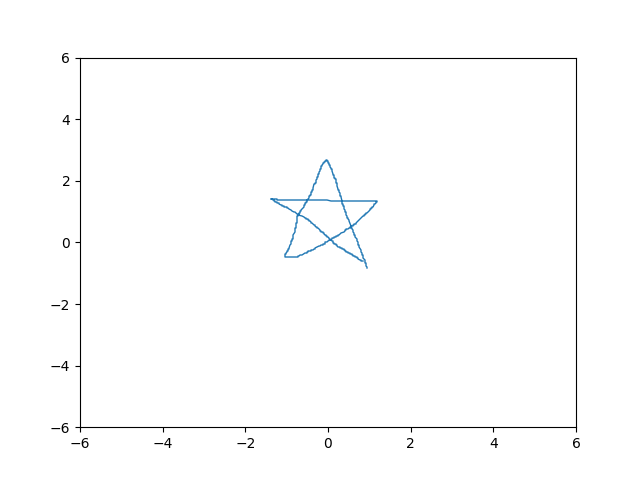

# 5 Coding a program to draw with circles <a class="anchor" id="Coding_a_program_to_draw_with_circles"></a>

At this point, we have went through all of the magic happening behind all the Fourier Series drawing replicators and it is time to create our own!

The code is inspired by 3Blue1Brown's video [here](https://www.youtube.com/watch?v=r6sGWTCMz2k).

What we will make in this section is an animation of `n` "lines" that form an approximation of an input "signal" in 2 dimensions.
That signal can be either pre-generated or drawn right before the animation.

A single line represents nothing more that a sinusoid.


It has:
 - __length__(amplitude), defined using the pythagorean theorem like $ \sqrt{z.real^22, z.imag^2} $ 
 - __speed__(frequency), which we get by the number arrow
 - __phase__, which is the imaginary part of the n-th Fourier coefficient
 
We have already saw the Fourier Transform in 2 dimensions replicating a drawing. 

To simplify the equations for two dimensions,
we will pack the two values (for x and y) into a complex number. This time we will use $ e^{it}$ to describe the motion of the wave, although, in a 2D field, it looks more like a vector. $ e^{it} $ is a complex exponential, but the real and imaginary part are equivalent to the cosine and sine part of the Fourier Series.


## 5.A Retrieving a doodle on a coordinate system <a class="anchor" id="Retrieving_a_doodle_on_a_coordinate_system"></a>

The Mouse Controller class from above can do the job with a few tweaks.
We will replace the `mouse_x` and `mouse_y` arrays from earlier with a single one - `mouse_xy`.

Since we can't draw a custom doodle in jupyter, here is a pre-generated example of mouse_xy - a star pattern.

In [57]:
mouse_xy = [[1.935483870967742, -2.974025974025974], [1.935483870967742, -2.941558441558441], [1.935483870967742, -2.9090909090909083], [1.935483870967742, -2.8766233766233764], [1.935483870967742, -2.8441558441558437], [1.935483870967742, -2.811688311688311], [1.935483870967742, -2.779220779220779], [1.935483870967742, -2.7467532467532463], [1.9112903225806441, -2.7467532467532463], [1.9112903225806441, -2.7142857142857135], [1.887096774193548, -2.6818181818181817], [1.887096774193548, -2.649350649350649], [1.887096774193548, -2.616883116883116], [1.862903225806452, -2.616883116883116], [1.862903225806452, -2.5844155844155843], [1.862903225806452, -2.5519480519480515], [1.838709677419354, -2.5194805194805188], [1.838709677419354, -2.487012987012987], [1.838709677419354, -2.454545454545454], [1.814516129032258, -2.454545454545454], [1.766129032258064, -2.2922077922077913], [1.766129032258064, -2.2597402597402594], [1.741935483870968, -2.2272727272727266], [1.741935483870968, -2.194805194805194], [1.741935483870968, -2.162337662337662], [1.741935483870968, -2.1298701298701292], [1.71774193548387, -2.1298701298701292], [1.71774193548387, -2.0974025974025965], [1.693548387096774, -2.0649350649350646], [1.693548387096774, -2.032467532467532], [1.693548387096774, -1.9999999999999991], [1.693548387096774, -1.9675324675324672], [1.669354838709678, -1.9675324675324672], [1.64516129032258, -1.8701298701298699], [1.620967741935484, -1.7727272727272725], [1.5967741935483861, -1.7402597402597397], [1.5967741935483861, -1.707792207792207], [1.5967741935483861, -1.675324675324675], [1.5967741935483861, -1.6428571428571423], [1.57258064516129, -1.6428571428571423], [1.57258064516129, -1.6103896103896096], [1.57258064516129, -1.5779220779220777], [1.57258064516129, -1.545454545454545], [1.548387096774194, -1.545454545454545], [1.548387096774194, -1.5129870129870122], [1.548387096774194, -1.4805194805194803], [1.5, -1.3181818181818175], [1.451612903225806, -1.1883116883116873], [1.42741935483871, -1.1233766233766227], [1.403225806451612, -1.1233766233766227], [1.403225806451612, -1.058441558441558], [1.403225806451612, -1.0259740259740253], [1.379032258064516, -1.0259740259740253], [1.379032258064516, -0.9935064935064926], [1.3548387096774182, -0.9285714285714279], [1.3548387096774182, -0.8961038961038952], [1.306451612903226, -0.8636363636363633], [1.306451612903226, -0.8311688311688306], [1.306451612903226, -0.7987012987012978], [1.2822580645161281, -0.7662337662337659], [1.2822580645161281, -0.7337662337662332], [1.258064516129032, -0.7012987012987004], [1.258064516129032, -0.6688311688311686], [1.233870967741936, -0.6363636363636358], [1.209677419354838, -0.603896103896103], [1.185483870967742, -0.5714285714285703], [1.112903225806452, -0.34415584415584366], [1.088709677419354, -0.3116883116883109], [1.088709677419354, -0.27922077922077815], [1.064516129032258, -0.27922077922077815], [1.064516129032258, -0.24675324675324628], [1.064516129032258, -0.21428571428571352], [1.0403225806451601, -0.21428571428571352], [1.0403225806451601, -0.18181818181818077], [1.0403225806451601, -0.1493506493506489], [1.016129032258064, -0.11688311688311614], [1.016129032258064, -0.08441558441558339], [0.991935483870968, -0.08441558441558339], [0.991935483870968, -0.05194805194805152], [0.9677419354838701, 0.01298701298701399], [0.9677419354838701, 0.04545454545454586], [0.943548387096774, 0.14285714285714324], [0.9193548387096779, 0.175324675324676], [0.8951612903225801, 0.20779220779220875], [0.8951612903225801, 0.2402597402597415], [0.8951612903225801, 0.30519480519480613], [0.870967741935484, 0.30519480519480613], [0.870967741935484, 0.337662337662338], [0.870967741935484, 0.37012987012987164], [0.8467741935483861, 0.4025974025974035], [0.8467741935483861, 0.4350649350649354], [0.82258064516129, 0.4350649350649354], [0.82258064516129, 0.467532467532469], [0.798387096774194, 0.467532467532469], [0.798387096774194, 0.5000000000000009], [0.798387096774194, 0.5324675324675328], [0.7741935483870961, 0.5649350649350664], [0.7258064516129021, 0.6948051948051956], [0.7258064516129021, 0.7272727272727275], [0.701612903225806, 0.7272727272727275], [0.701612903225806, 0.7597402597402612], [0.701612903225806, 0.792207792207793], [0.67741935483871, 0.8246753246753249], [0.67741935483871, 0.8571428571428585], [0.6532258064516121, 0.8896103896103904], [0.6532258064516121, 0.9220779220779223], [0.6532258064516121, 0.9545454545454559], [0.629032258064516, 0.9870129870129878], [0.6048387096774199, 0.9870129870129878], [0.6048387096774199, 1.0194805194805197], [0.6048387096774199, 1.0519480519480533], [0.5806451612903221, 1.116883116883117], [0.5806451612903221, 1.1493506493506507], [0.556451612903226, 1.1493506493506507], [0.556451612903226, 1.1818181818181825], [0.556451612903226, 1.2142857142857144], [0.556451612903226, 1.246753246753248], [0.5322580645161281, 1.246753246753248], [0.5322580645161281, 1.27922077922078], [0.508064516129032, 1.27922077922078], [0.508064516129032, 1.3116883116883118], [0.508064516129032, 1.3441558441558454], [0.48387096774193594, 1.3766233766233773], [0.48387096774193594, 1.4090909090909092], [0.48387096774193594, 1.4415584415584428], [0.4596774193548381, 1.4740259740259747], [0.38709677419354804, 1.6363636363636376], [0.38709677419354804, 1.6688311688311694], [0.38709677419354804, 1.701298701298703], [0.36290322580645196, 1.701298701298703], [0.36290322580645196, 1.733766233766235], [0.36290322580645196, 1.7662337662337668], [0.36290322580645196, 1.7987012987013005], [0.3387096774193541, 1.7987012987013005], [0.3387096774193541, 1.8311688311688323], [0.3387096774193541, 1.8636363636363642], [0.3387096774193541, 1.8961038961038978], [0.314516129032258, 1.9285714285714297], [0.29032258064516014, 1.9610389610389616], [0.29032258064516014, 2.025974025974027], [0.29032258064516014, 2.058441558441559], [0.26612903225806406, 2.058441558441559], [0.26612903225806406, 2.0909090909090926], [0.26612903225806406, 2.1233766233766245], [0.26612903225806406, 2.1558441558441563], [0.24193548387096797, 2.1558441558441563], [0.24193548387096797, 2.18831168831169], [0.24193548387096797, 2.220779220779222], [0.2177419354838701, 2.220779220779222], [0.2177419354838701, 2.2532467532467537], [0.2177419354838701, 2.2857142857142874], [0.19354838709677402, 2.3831168831168847], [0.19354838709677402, 2.4155844155844166], [0.16935483870967794, 2.4155844155844166], [0.16935483870967794, 2.4480519480519485], [0.16935483870967794, 2.480519480519482], [0.16935483870967794, 2.512987012987014], [0.16935483870967794, 2.545454545454546], [0.14516129032258007, 2.6103896103896114], [0.14516129032258007, 2.6428571428571432], [0.14516129032258007, 2.675324675324677], [0.14516129032258007, 2.7077922077922087], [0.14516129032258007, 2.7402597402597406], [0.12096774193548399, 2.7727272727272743], [0.12096774193548399, 2.805194805194806], [0.09677419354838612, 2.837662337662338], [0.09677419354838612, 2.8701298701298716], [0.09677419354838612, 2.9025974025974035], [0.09677419354838612, 2.9350649350649354], [0.09677419354838612, 2.967532467532469], [0.09677419354838612, 3.000000000000001], [0.07258064516129004, 3.000000000000001], [0.07258064516129004, 3.0324675324675328], [0.07258064516129004, 3.0649350649350664], [0.07258064516129004, 3.0974025974025983], [0.07258064516129004, 3.129870129870132], [0.04838709677419306, 3.162337662337664], [0.04838709677419306, 3.1948051948051956], [0.04838709677419306, 3.2272727272727293], [0.04838709677419306, 3.259740259740261], [0.04838709677419306, 3.292207792207793], [0.04838709677419306, 3.3246753246753267], [0.024193548387096087, 3.3571428571428585], [0.024193548387096087, 3.3896103896103904], [0.0, 3.3896103896103904], [0.0, 3.422077922077924], [0.0, 3.454545454545456], [0.0, 3.487012987012988], [0.0, 3.5194805194805214], [-0.024193548387096975, 3.5194805194805214], [-0.024193548387096975, 3.487012987012988], [-0.04838709677419395, 3.454545454545456], [-0.04838709677419395, 3.422077922077924], [-0.04838709677419395, 3.3896103896103904], [-0.07258064516129092, 3.3896103896103904], [-0.07258064516129092, 3.3571428571428585], [-0.09677419354838701, 3.3571428571428585], [-0.09677419354838701, 3.3246753246753267], [-0.09677419354838701, 3.259740259740261], [-0.09677419354838701, 3.2272727272727293], [-0.09677419354838701, 3.1948051948051956], [-0.12096774193548399, 3.1948051948051956], [-0.12096774193548399, 3.162337662337664], [-0.12096774193548399, 3.129870129870132], [-0.14516129032258096, 3.0324675324675328], [-0.14516129032258096, 3.000000000000001], [-0.14516129032258096, 2.967532467532469], [-0.16935483870967794, 2.967532467532469], [-0.16935483870967794, 2.9350649350649354], [-0.16935483870967794, 
2.9025974025974035], [-0.19354838709677402, 2.9025974025974035], [-0.19354838709677402, 2.8701298701298716], [-0.19354838709677402, 2.837662337662338], [-0.19354838709677402, 2.805194805194806], [-0.217741935483871, 2.7727272727272743], [-0.217741935483871, 2.7402597402597406], [-0.217741935483871, 2.7077922077922087], [-0.24193548387096797, 2.7077922077922087], [-0.24193548387096797, 2.6428571428571432], [-0.24193548387096797, 2.6103896103896114], [-0.24193548387096797, 2.5779220779220795], [-0.24193548387096797, 2.545454545454546], [-0.26612903225806495, 2.480519480519482], [-0.2903225806451619, 2.4155844155844166], [-0.2903225806451619, 2.3831168831168847], [-0.2903225806451619, 2.350649350649351], [-0.2903225806451619, 2.3181818181818192], [-0.314516129032258, 2.3181818181818192], [-0.314516129032258, 2.2857142857142874], [-0.314516129032258, 2.2532467532467537], [-0.314516129032258, 2.220779220779222], [-0.314516129032258, 2.18831168831169], [-0.314516129032258, 2.1558441558441563], [-0.338709677419355, 2.1233766233766245], [-0.338709677419355, 2.0909090909090926], [-0.338709677419355, 2.058441558441559], [-0.36290322580645196, 1.9935064935064952], [-0.36290322580645196, 1.9610389610389616], [-0.36290322580645196, 1.9285714285714297], [-0.36290322580645196, 1.8961038961038978], [-0.36290322580645196, 1.8636363636363642], [-0.38709677419354893, 1.8636363636363642], [-0.38709677419354893, 1.8311688311688323], [-0.38709677419354893, 1.7987012987013005], [-0.411290322580645, 1.7987012987013005], [-0.411290322580645, 1.7662337662337668], [-0.411290322580645, 1.733766233766235], [-0.411290322580645, 1.701298701298703], [-0.435483870967742, 1.6363636363636376], [-0.435483870967742, 1.6038961038961057], [-0.435483870967742, 1.571428571428572], [-0.435483870967742, 1.5389610389610402], [-0.435483870967742, 1.5064935064935083], [-0.45967741935483897, 1.4740259740259747], [-0.45967741935483897, 1.4415584415584428], [-0.45967741935483897, 1.4090909090909092], [-0.45967741935483897, 1.3766233766233773], [-0.48387096774193594, 1.3441558441558454], [-0.48387096774193594, 1.3116883116883118], [-0.5080645161290329, 1.27922077922078], [-0.532258064516129, 1.1818181818181825], [-0.532258064516129, 1.116883116883117], [-0.556451612903226, 1.0844155844155852], [-0.556451612903226, 1.0519480519480533], [-0.556451612903226, 1.0194805194805197], [-0.580645161290323, 1.0194805194805197], [-0.580645161290323, 0.9870129870129878], [-0.6048387096774199, 0.9870129870129878], [-0.6048387096774199, 0.9545454545454559], [-0.6048387096774199, 0.9220779220779223], [-0.6048387096774199, 0.8896103896103904], [-0.629032258064516, 0.8896103896103904], [-0.629032258064516, 0.8571428571428585], [-0.629032258064516, 0.8246753246753249], [-0.653225806451613, 0.7597402597402612], [-0.67741935483871, 0.7272727272727275], [-0.7016129032258069, 0.6623376623376638], [-0.7016129032258069, 0.6298701298701301], [-0.7258064516129039, 0.5974025974025983], [-0.7258064516129039, 0.5649350649350664], [-0.75, 0.5000000000000009], [-0.75, 0.467532467532469], [-0.75, 0.4350649350649354], [-0.774193548387097, 0.4350649350649354], [-0.774193548387097, 0.4025974025974035], [-0.798387096774194, 0.37012987012987164], [-0.798387096774194, 0.337662337662338], [-0.8225806451612909, 0.30519480519480613], [-0.846774193548387, 0.175324675324676], [-0.9193548387096779, 0.01298701298701399], [-0.9193548387096779, -0.019480519480518765], [-0.9193548387096779, -0.05194805194805152], [-0.943548387096774, -0.08441558441558339], [-0.943548387096774, -0.11688311688311614], [-0.943548387096774, -0.1493506493506489], [-0.943548387096774, -0.18181818181818077], [-0.967741935483871, -0.18181818181818077], [-0.967741935483871, -0.21428571428571352], [-0.991935483870968, -0.24675324675324628], [-0.991935483870968, -0.27922077922077815], [-0.991935483870968, -0.3116883116883109], [-1.016129032258065, -0.4090909090909083], [-1.040322580645162, -0.5064935064935057], [-1.040322580645162, -0.5389610389610384], [-1.040322580645162, -0.5714285714285703], [-1.064516129032258, -0.5714285714285703], [-1.064516129032258, -0.603896103896103], [-1.088709677419355, -0.6363636363636358], [-1.088709677419355, -0.6688311688311686], [-1.088709677419355, -0.7012987012987004], [-1.088709677419355, -0.7337662337662332], [-1.088709677419355, -0.7662337662337659], [-1.088709677419355, -0.7987012987012978], [-1.088709677419355, -0.8311688311688306], [-1.112903225806452, -0.8311688311688306], [-1.112903225806452, -0.8636363636363633], [-1.112903225806452, -0.9610389610389607], [-1.112903225806452, -1.0259740259740253], [-1.112903225806452, -1.058441558441558], [-1.137096774193549, -1.058441558441558], [-1.137096774193549, -1.09090909090909], [-1.137096774193549, -1.1233766233766227], [-1.137096774193549, -1.1558441558441555], [-1.137096774193549, -1.22077922077922], [-1.161290322580645, -1.2532467532467528], [-1.161290322580645, -1.2857142857142847], [-1.161290322580645, -1.3506493506493502], [-1.161290322580645, -1.383116883116882], [-1.161290322580645, -1.4155844155844148], [-1.209677419354839, -1.5129870129870122], [-1.209677419354839, -1.545454545454545], [-1.209677419354839, -1.5779220779220777], [-1.209677419354839, -1.6103896103896096], [-1.233870967741936, -1.6428571428571423], [-1.233870967741936, -1.675324675324675], [-1.233870967741936, -1.7402597402597397], [-1.233870967741936, -1.8051948051948044], [-1.258064516129033, -1.8051948051948044], [-1.258064516129033, -1.837662337662337], [-1.258064516129033, -1.8701298701298699], [-1.258064516129033, -1.9350649350649345], [-1.258064516129033, -1.9675324675324672], [-1.282258064516129, -1.9999999999999991], [-1.282258064516129, -2.032467532467532], [-1.306451612903226, -2.032467532467532], [-1.306451612903226, -2.0649350649350646], [-1.306451612903226, -2.0974025974025965], [-1.330645161290323, -2.194805194805194], [-1.330645161290323, -2.2272727272727266], [-1.35483870967742, -2.2597402597402594], [-1.35483870967742, -2.2922077922077913], [-1.35483870967742, -2.324675324675324], [-1.35483870967742, -2.3571428571428568], [-1.379032258064516, -2.3571428571428568], [-1.403225806451613, -2.454545454545454], [-1.42741935483871, -2.5194805194805188], [-1.42741935483871, -2.5519480519480515], [-1.42741935483871, -2.5844155844155843], [-1.42741935483871, -2.616883116883116], [-1.451612903225807, -2.616883116883116], [-1.451612903225807, -2.649350649350649], [-1.451612903225807, -2.6818181818181817], [-1.451612903225807, -2.7142857142857135], [-1.475806451612903, -2.7142857142857135], [-1.5, -2.7142857142857135], [-1.5, -2.7467532467532463], [-1.5, -2.779220779220779], [-1.524193548387097, -2.8441558441558437], [-1.524193548387097, -2.8766233766233764], [-1.524193548387097, -2.9090909090909083], [-1.524193548387097, -2.941558441558441], [-1.524193548387097, -2.974025974025974], [-1.524193548387097, -3.0064935064935057], [-1.524193548387097, -3.0389610389610384], [-1.524193548387097, -3.071428571428571], [-1.524193548387097, -3.103896103896103], [-1.524193548387097, -3.071428571428571], [-1.5, -3.071428571428571], [-1.5, -3.0389610389610384], [-1.475806451612903, -3.0389610389610384], [-1.475806451612903, -3.0064935064935057], [-1.451612903225807, -3.0064935064935057], [-1.451612903225807, -2.974025974025974], [-1.42741935483871, -2.941558441558441], [-1.42741935483871, -2.9090909090909083], [-1.403225806451613, -2.9090909090909083], [-1.379032258064516, -2.8441558441558437], [-1.35483870967742, -2.811688311688311], [-1.330645161290323, -2.779220779220779], [-1.330645161290323, -2.7467532467532463], 
[-1.306451612903226, -2.7467532467532463], [-1.282258064516129, -2.7467532467532463], [-1.282258064516129, -2.7142857142857135], [-1.282258064516129, -2.6818181818181817], [-1.258064516129033, -2.6818181818181817], [-1.258064516129033, -2.649350649350649], [-1.233870967741936, -2.649350649350649], [-1.233870967741936, -2.616883116883116], [-1.209677419354839, -2.616883116883116], [-1.209677419354839, -2.5844155844155843], [-1.185483870967742, -2.5519480519480515], [-1.112903225806452, -2.454545454545454], [-1.112903225806452, -2.3896103896103895], [-1.088709677419355, -2.3896103896103895], [-1.064516129032258, -2.3571428571428568], [-1.064516129032258, -2.324675324675324], [-1.040322580645162, -2.324675324675324], [-1.040322580645162, -2.2922077922077913], [-1.016129032258065, -2.2597402597402594], [-1.016129032258065, -2.2272727272727266], [-0.991935483870968, -2.2272727272727266], [-0.967741935483871, -2.194805194805194], [-0.943548387096774, -2.194805194805194], [-0.943548387096774, -2.162337662337662], [-0.895161290322581, -2.0974025974025965], [-0.870967741935484, -2.0649350649350646], [-0.846774193548387, -2.032467532467532], 
[-0.846774193548387, -1.9999999999999991], [-0.7258064516129039, -1.8701298701298699], [-0.67741935483871, -1.7727272727272725], [-0.653225806451613, -1.7727272727272725], [-0.629032258064516, -1.7402597402597397], [-0.580645161290323, -1.675324675324675], [-0.556451612903226, -1.6428571428571423], [-0.532258064516129, -1.6103896103896096], [-0.5080645161290329, -1.6103896103896096], [-0.48387096774193594, -1.5779220779220777], [-0.45967741935483897, -1.545454545454545], [-0.435483870967742, -1.5129870129870122], [-0.411290322580645, -1.5129870129870122], [-0.38709677419354893, -1.4805194805194803], [-0.36290322580645196, -1.4480519480519476], [-0.338709677419355, -1.4155844155844148], [-0.314516129032258, -1.383116883116882], [-0.2903225806451619, -1.383116883116882], [-0.2903225806451619, -1.3506493506493502], [-0.26612903225806495, -1.3506493506493502], [-0.19354838709677402, -1.2857142857142847], [-0.024193548387096975, -1.1233766233766227], [0.0, -1.09090909090909], [0.024193548387096087, -1.09090909090909], [0.024193548387096087, -1.058441558441558], [0.04838709677419306, -1.058441558441558], [0.04838709677419306, -1.0259740259740253], [0.09677419354838612, -1.0259740259740253], [0.09677419354838612, -0.9935064935064926], [0.12096774193548399, -0.9610389610389607], [0.12096774193548399, -0.9285714285714279], [0.14516129032258007, -0.9285714285714279], 
[0.16935483870967794, -0.9285714285714279], [0.16935483870967794, -0.8961038961038952], [0.26612903225806406, -0.7987012987012978], [0.29032258064516014, -0.7987012987012978], [0.314516129032258, -0.7662337662337659], [0.3387096774193541, -0.7662337662337659], [0.3387096774193541, -0.7337662337662332], [0.3387096774193541, -0.7012987012987004], [0.38709677419354804, -0.7012987012987004], [0.41129032258064413, -0.6688311688311686], [0.41129032258064413, -0.6363636363636358], [0.435483870967742, -0.6363636363636358], [0.435483870967742, -0.603896103896103], [0.4596774193548381, -0.603896103896103], [0.48387096774193594, -0.603896103896103], [0.48387096774193594, -0.5714285714285703], [0.508064516129032, -0.5714285714285703], [0.5322580645161281, -0.5064935064935057], [0.6048387096774199, -0.44155844155844104], [0.629032258064516, -0.44155844155844104], [0.6532258064516121, -0.44155844155844104], [0.6532258064516121, -0.4090909090909083], [0.67741935483871, -0.4090909090909083], [0.701612903225806, -0.3766233766233755], [0.7258064516129021, -0.3766233766233755], [0.75, -0.3116883116883109], [0.798387096774194, -0.27922077922077815], [0.82258064516129, -0.24675324675324628], [0.8467741935483861, -0.24675324675324628], [0.8467741935483861, -0.21428571428571352], [0.870967741935484, -0.21428571428571352], [0.9193548387096779, -0.1493506493506489], [0.943548387096774, -0.11688311688311614], [0.991935483870968, -0.11688311688311614], [0.991935483870968, -0.08441558441558339], [1.016129032258064, -0.08441558441558339], [1.016129032258064, -0.05194805194805152], [1.0403225806451601, -0.05194805194805152], [1.088709677419354, 0.01298701298701399], [1.137096774193548, 0.04545454545454586], [1.137096774193548, 0.07792207792207861], [1.1612903225806441, 0.07792207792207861], [1.1612903225806441, 0.11038961038961137], [1.185483870967742, 0.11038961038961137], [1.185483870967742, 0.14285714285714324], [1.209677419354838, 0.14285714285714324], [1.233870967741936, 0.20779220779220875], [1.258064516129032, 0.2402597402597415], [1.2822580645161281, 0.2402597402597415], [1.2822580645161281, 0.2727272727272734], [1.306451612903226, 0.2727272727272734], [1.306451612903226, 0.30519480519480613], [1.330645161290322, 0.337662337662338], [1.3548387096774182, 0.37012987012987164], [1.379032258064516, 0.37012987012987164], [1.379032258064516, 0.4025974025974035], [1.403225806451612, 0.4025974025974035], [1.403225806451612, 0.4350649350649354], [1.42741935483871, 0.4350649350649354], [1.42741935483871, 0.467532467532469], [1.451612903225806, 0.5000000000000009], [1.451612903225806, 0.5324675324675328], [1.4758064516129021, 0.5324675324675328], [1.4758064516129021, 0.5649350649350664], [1.5, 0.5974025974025983], [1.524193548387096, 0.6298701298701301], [1.524193548387096, 0.6623376623376638], [1.548387096774194, 0.6623376623376638], [1.548387096774194, 0.6948051948051956], [1.5967741935483861, 0.7272727272727275], [1.5967741935483861, 0.7597402597402612], [1.620967741935484, 0.7597402597402612], [1.64516129032258, 0.792207792207793], [1.669354838709678, 0.792207792207793], [1.669354838709678, 0.8246753246753249], [1.693548387096774, 0.8246753246753249], [1.71774193548387, 0.8246753246753249], [1.71774193548387, 0.8571428571428585], [1.741935483870968, 0.8571428571428585], [1.741935483870968, 0.8896103896103904], [1.766129032258064, 0.8896103896103904], [1.7903225806451601, 0.8896103896103904], [1.7903225806451601, 0.9220779220779223], [1.814516129032258, 0.9220779220779223], [1.838709677419354, 0.9220779220779223], [1.862903225806452, 0.9220779220779223], [1.887096774193548, 0.9220779220779223], [1.887096774193548, 0.9545454545454559], [1.9112903225806441, 0.9545454545454559], [1.935483870967742, 0.9545454545454559], [1.959677419354838, 0.9545454545454559], [1.983870967741936, 0.9545454545454559], [1.983870967741936, 0.9870129870129878], [2.008064516129032, 0.9870129870129878], [2.032258064516128, 0.9870129870129878], [2.080645161290322, 1.0194805194805197], [2.104838709677418, 1.0194805194805197], [2.104838709677418, 1.0519480519480533], [2.129032258064516, 1.0519480519480533], [2.129032258064516, 1.0844155844155852], [2.153225806451612, 1.0844155844155852], [2.153225806451612, 1.116883116883117], [2.153225806451612, 1.1493506493506507], [2.129032258064516, 1.1493506493506507], [2.104838709677418, 1.1493506493506507], 
[2.080645161290322, 1.1493506493506507], [2.056451612903226, 1.1493506493506507], [2.032258064516128, 1.1493506493506507], [2.008064516129032, 1.1493506493506507], [1.983870967741936, 1.1493506493506507], [1.959677419354838, 1.1493506493506507], [1.935483870967742, 1.1493506493506507], [1.9112903225806441, 1.1493506493506507], [1.838709677419354, 1.1493506493506507], [1.766129032258064, 1.1493506493506507], [1.741935483870968, 1.1493506493506507], [1.693548387096774, 1.1493506493506507], [1.669354838709678, 1.1493506493506507], [1.64516129032258, 1.1493506493506507], [1.620967741935484, 1.1493506493506507], [1.5967741935483861, 1.1493506493506507], [1.57258064516129, 1.1493506493506507], [1.548387096774194, 1.1493506493506507], [1.524193548387096, 1.1493506493506507], [1.5, 1.1493506493506507], [1.4758064516129021, 1.1493506493506507], [1.4758064516129021, 1.116883116883117], [1.451612903225806, 1.116883116883117], [1.42741935483871, 1.116883116883117], [1.330645161290322, 1.116883116883117], [1.1612903225806441, 1.0844155844155852], [1.112903225806452, 1.0844155844155852], [1.088709677419354, 1.0844155844155852], [1.064516129032258, 1.0844155844155852], [1.0403225806451601, 1.0844155844155852], [0.991935483870968, 1.0844155844155852], [0.9677419354838701, 1.0519480519480533], [0.9193548387096779, 1.0519480519480533], [0.870967741935484, 1.0519480519480533], [0.8467741935483861, 1.0519480519480533], [0.798387096774194, 1.0519480519480533], [0.7741935483870961, 1.0519480519480533], [0.75, 1.0519480519480533], [0.701612903225806, 1.0194805194805197], [0.67741935483871, 1.0194805194805197], [0.629032258064516, 1.0194805194805197], [0.6048387096774199, 1.0194805194805197], [0.556451612903226, 1.0194805194805197], [0.41129032258064413, 1.0194805194805197], [0.12096774193548399, 0.9870129870129878], [0.07258064516129004, 0.9870129870129878], [0.024193548387096087, 0.9870129870129878], [0.0, 0.9870129870129878], [0.0, 0.9545454545454559], [-0.024193548387096975, 0.9545454545454559], [-0.07258064516129092, 0.9545454545454559], [-0.19354838709677402, 0.9545454545454559], [-0.217741935483871, 0.9545454545454559], [-0.217741935483871, 0.9220779220779223], [-0.24193548387096797, 0.9220779220779223], [-0.26612903225806495, 0.9220779220779223], [-0.2903225806451619, 0.9220779220779223], [-0.314516129032258, 0.9220779220779223], [-0.338709677419355, 0.9220779220779223], [-0.45967741935483897, 0.8896103896103904], [-0.5080645161290329, 0.8571428571428585], [-0.556451612903226, 0.8571428571428585], [-0.580645161290323, 0.8571428571428585], [-0.6048387096774199, 0.8571428571428585], [-0.6048387096774199, 0.8246753246753249], [-0.653225806451613, 0.8246753246753249], [-0.67741935483871, 0.8246753246753249], [-0.7016129032258069, 
0.8246753246753249], [-0.7258064516129039, 0.8246753246753249], [-0.75, 0.8246753246753249], [-0.774193548387097, 0.8246753246753249], [-0.8225806451612909, 0.8246753246753249], [-0.846774193548387, 0.8246753246753249], [-0.846774193548387, 0.792207792207793], [-0.895161290322581, 0.792207792207793], [-1.161290322580645, 0.7597402597402612], [-1.185483870967742, 0.7597402597402612], [-1.209677419354839, 0.7597402597402612], [-1.233870967741936, 0.7597402597402612], [-1.258064516129033, 0.7597402597402612], [-1.282258064516129, 0.7272727272727275], [-1.306451612903226, 0.7272727272727275], [-1.330645161290323, 0.7272727272727275], [-1.35483870967742, 0.7272727272727275], [-1.379032258064516, 0.7272727272727275], [-1.403225806451613, 0.7272727272727275], [-1.42741935483871, 0.7272727272727275], [-1.451612903225807, 0.7272727272727275], [-1.475806451612903, 0.7272727272727275], [-1.5, 0.7272727272727275], [-1.524193548387097, 0.7272727272727275], [-1.548387096774194, 0.7272727272727275], [-1.572580645161291, 0.7272727272727275], [-1.596774193548387, 0.7272727272727275], [-1.620967741935484, 0.7272727272727275], [-1.645161290322581, 0.7272727272727275], [-1.669354838709678, 0.7272727272727275], [-1.693548387096774, 0.6948051948051956], [-1.717741935483871, 0.6948051948051956], [-1.741935483870968, 0.6948051948051956], [-1.766129032258065, 0.6948051948051956], [-1.790322580645162, 0.6948051948051956], [-1.814516129032258, 0.6948051948051956], [-1.838709677419355, 0.6948051948051956], [-1.862903225806452, 0.6948051948051956], [-1.887096774193549, 0.6948051948051956], [-1.911290322580645, 0.6948051948051956], [-1.935483870967742, 0.6948051948051956], [-1.959677419354839, 0.6948051948051956], [-1.983870967741936, 0.6948051948051956], [-2.008064516129033, 0.6948051948051956], [-2.032258064516129, 0.6948051948051956], 
[-2.056451612903226, 0.6948051948051956], [-2.056451612903226, 0.6623376623376638], [-2.080645161290323, 0.6623376623376638], [-2.10483870967742, 0.6623376623376638], [-2.129032258064516, 0.6623376623376638], [-2.153225806451613, 
0.6623376623376638], [-2.17741935483871, 0.6623376623376638], [-2.201612903225807, 0.6623376623376638], [-2.201612903225807, 0.6298701298701301], [-2.225806451612903, 0.6298701298701301], [-2.25, 0.6298701298701301], [-2.274193548387097, 0.6298701298701301], [-2.298387096774194, 0.6298701298701301], [-2.298387096774194, 0.5974025974025983], [-2.322580645161291, 0.5974025974025983], [-2.346774193548387, 0.5974025974025983], [-2.370967741935484, 0.5974025974025983], [-2.370967741935484, 0.5649350649350664], [-2.395161290322581, 0.5649350649350664], [-2.419354838709678, 0.5649350649350664], [-2.443548387096774, 0.5649350649350664], [-2.467741935483871, 0.5649350649350664], [-2.467741935483871, 0.5324675324675328], [-2.419354838709678, 0.5324675324675328], [-2.419354838709678, 0.5000000000000009], [-2.395161290322581, 0.5000000000000009], [-2.395161290322581, 0.467532467532469], [-2.370967741935484, 0.467532467532469], [-2.370967741935484, 0.4350649350649354], [-2.322580645161291, 0.4350649350649354], [-2.322580645161291, 0.4025974025974035], [-2.298387096774194, 0.4025974025974035], [-2.274193548387097, 0.4025974025974035], [-2.274193548387097, 0.37012987012987164], [-2.225806451612903, 0.30519480519480613], [-2.17741935483871, 0.2727272727272734], [-2.129032258064516, 0.2402597402597415], [-2.10483870967742, 0.20779220779220875], [-2.10483870967742, 0.175324675324676], [-2.080645161290323, 0.175324675324676], [-2.056451612903226, 0.14285714285714324], [-2.032258064516129, 0.14285714285714324], [-2.008064516129033, 0.11038961038961137], [-1.983870967741936, 0.11038961038961137], [-1.983870967741936, 0.07792207792207861], [-1.959677419354839, 0.04545454545454586], [-1.935483870967742, 0.04545454545454586], [-1.911290322580645, 0.01298701298701399], [-1.887096774193549, 0.01298701298701399], [-1.862903225806452, -0.019480519480518765], [-1.838709677419355, -0.019480519480518765], [-1.475806451612903, -0.34415584415584366], [-1.42741935483871, -0.34415584415584366], [-1.42741935483871, -0.3766233766233755], [-1.403225806451613, -0.3766233766233755], [-1.379032258064516, -0.4090909090909083], [-1.35483870967742, -0.44155844155844104], [-1.330645161290323, -0.44155844155844104], [-1.306451612903226, -0.44155844155844104], [-1.306451612903226, -0.4740259740259729], [-1.282258064516129, -0.4740259740259729], [-1.258064516129033, -0.4740259740259729], [-1.233870967741936, -0.5064935064935057], [-1.209677419354839, -0.5064935064935057], [-1.112903225806452, -0.603896103896103], [-1.088709677419355, -0.6688311688311686], [-1.064516129032258, -0.6688311688311686], [-1.016129032258065, -0.7012987012987004], [-1.016129032258065, -0.7337662337662332], [-0.991935483870968, -0.7337662337662332], [-0.991935483870968, -0.7662337662337659], [-0.967741935483871, -0.7662337662337659], [-0.967741935483871, -0.7987012987012978], [-0.943548387096774, -0.7987012987012978], [-0.9193548387096779, -0.7987012987012978], [-0.9193548387096779, -0.8311688311688306], [-0.895161290322581, -0.8311688311688306], [-0.895161290322581, -0.8636363636363633], [-0.870967741935484, -0.8636363636363633], [-0.846774193548387, -0.8961038961038952], [-0.8225806451612909, -0.8961038961038952], [-0.798387096774194, -0.9285714285714279], [-0.75, -0.9610389610389607], [-0.7016129032258069, -0.9935064935064926], [-0.67741935483871, -1.0259740259740253], [-0.653225806451613, -1.0259740259740253], [-0.6048387096774199, -1.058441558441558], [-0.580645161290323, -1.058441558441558], [-0.580645161290323, -1.09090909090909], [-0.532258064516129, -1.1233766233766227], [-0.5080645161290329, -1.1233766233766227], [-0.48387096774193594, -1.1233766233766227], [-0.45967741935483897, -1.1558441558441555], [-0.435483870967742, -1.1558441558441555], [-0.411290322580645, -1.1883116883116873], [-0.38709677419354893, -1.1883116883116873], [-0.36290322580645196, -1.1883116883116873], [-0.36290322580645196, -1.22077922077922], [-0.217741935483871, -1.2857142857142847], [-0.19354838709677402, -1.3181818181818175], [-0.16935483870967794, -1.3181818181818175], [-0.16935483870967794, -1.3506493506493502], [-0.14516129032258096, -1.3506493506493502], [-0.12096774193548399, -1.3506493506493502], [-0.12096774193548399, -1.383116883116882], [-0.09677419354838701, -1.383116883116882], [-0.07258064516129092, -1.4155844155844148], [-0.024193548387096975, -1.4480519480519476], [0.0, -1.4480519480519476], [0.024193548387096087, -1.4480519480519476], [0.024193548387096087, -1.4805194805194803], [0.04838709677419306, -1.4805194805194803], [0.07258064516129004, -1.5129870129870122], [0.09677419354838612, -1.5129870129870122], [0.14516129032258007, -1.545454545454545], [0.16935483870967794, -1.5779220779220777], [0.19354838709677402, -1.5779220779220777], [0.2177419354838701, -1.6103896103896096], [0.24193548387096797, -1.6428571428571423], [0.26612903225806406, -1.6428571428571423], [0.29032258064516014, -1.6428571428571423], [0.29032258064516014, -1.675324675324675], [0.314516129032258, -1.675324675324675], [0.3387096774193541, -1.675324675324675], [0.36290322580645196, -1.707792207792207], [0.41129032258064413, -1.707792207792207], [0.41129032258064413, -1.7402597402597397], [0.435483870967742, -1.7402597402597397], [0.4596774193548381, -1.7402597402597397], [0.4596774193548381, -1.7727272727272725], [0.48387096774193594, -1.7727272727272725], [0.48387096774193594, -1.8051948051948044], [0.508064516129032, -1.8051948051948044], [0.508064516129032, -1.837662337662337], [0.5322580645161281, -1.837662337662337], [0.556451612903226, -1.837662337662337], [0.556451612903226, -1.8701298701298699], [0.6048387096774199, -1.8701298701298699], [0.701612903225806, -1.9675324675324672], [0.75, -1.9999999999999991], [0.7741935483870961, -2.032467532467532], [0.798387096774194, -2.0649350649350646], [0.82258064516129, -2.0649350649350646], [0.8467741935483861, -2.0974025974025965], [0.8951612903225801, -2.0974025974025965], [0.8951612903225801, -2.1298701298701292], [0.9193548387096779, -2.1298701298701292], [0.9677419354838701, -2.162337662337662], [0.9677419354838701, -2.194805194805194], [0.991935483870968, -2.194805194805194], [1.016129032258064, -2.194805194805194], [1.016129032258064, -2.2272727272727266], [1.064516129032258, -2.2272727272727266], [1.064516129032258, -2.2597402597402594], [1.088709677419354, -2.2597402597402594], [1.112903225806452, -2.2597402597402594], [1.112903225806452, -2.2922077922077913], [1.112903225806452, -2.324675324675324], [1.137096774193548, -2.324675324675324], [1.1612903225806441, -2.324675324675324], [1.185483870967742, -2.3571428571428568], [1.209677419354838, -2.3571428571428568], [1.209677419354838, -2.3896103896103895], [1.233870967741936, -2.3896103896103895], [1.258064516129032, -2.3896103896103895], [1.2822580645161281, -2.3896103896103895], [1.2822580645161281, -2.4220779220779214], [1.306451612903226, -2.4220779220779214], 
[1.306451612903226, -2.454545454545454], [1.330645161290322, -2.454545454545454], [1.3548387096774182, -2.454545454545454], [1.3548387096774182, -2.487012987012987], [1.379032258064516, -2.487012987012987], [1.403225806451612, -2.487012987012987], [1.42741935483871, -2.487012987012987], [1.42741935483871, -2.5194805194805188], [1.451612903225806, -2.5194805194805188], [1.4758064516129021, -2.5194805194805188], [1.4758064516129021, -2.5519480519480515], [1.5, -2.5519480519480515], [1.524193548387096, -2.5844155844155843], [1.548387096774194, -2.5844155844155843], [1.57258064516129, -2.5844155844155843], [1.57258064516129, -2.616883116883116], [1.5967741935483861, -2.616883116883116], [1.620967741935484, -2.616883116883116], [1.620967741935484, -2.649350649350649], [1.64516129032258, -2.649350649350649], [1.669354838709678, -2.649350649350649], [1.693548387096774, -2.6818181818181817], [1.71774193548387, -2.6818181818181817], [1.741935483870968, -2.6818181818181817], [1.766129032258064, -2.7142857142857135], [1.766129032258064, -2.7467532467532463], [1.7903225806451601, -2.7467532467532463], [1.814516129032258, -2.7467532467532463], [1.838709677419354, -2.7467532467532463], [1.862903225806452, -2.7467532467532463], [1.862903225806452, -2.779220779220779], [1.887096774193548, -2.779220779220779], [1.9112903225806441, -2.779220779220779], [1.935483870967742, -2.779220779220779]]


That is, in the `on_motion` method we will replace the appending lines with

```python
        mouse_xy.append((event.xdata,event.ydata))
        history.set_data([item[0] for item in mouse_xy],[item[1] for item in mouse_xy])
```
analogically, we will change the animation function

```python
    def animate(i):
    history.set_data([item[0] for item in mouse_xy],[item[1] for item in mouse_xy])
    return history, 
```

We are doing that to save a bit of excess code later on.

__How do we get 2 dimensions from one number?__

Since matplotlib cannot plot complex numbers directly, we need to split the `z`(in the code) variable into real and imaginary. That is, the x coordinate and the y coordinate.


## 5.B Calculating the Fourier coefficients <a class="anchor" id="Calculating_the_Fourier_coefficients"></a>

Applying the equations from above, we can pack everything in a function to calculate `n` fourier coefficients and return them in an array. That is, `n` lines drawing.

At the end, we need to divide by the input range `tl` ($L$ in the formula) to normalize.

In [60]:
def calculate_fouirer_coefs(f, n):
    """
    Calculates complex Fourier coefficients for a given function
    Parameters:
        f: 2d array of functional values like [[x1,y1],[x2,y2]]
        n: number of terms to compute
        dx: the difference between 2 neighbour values.
    Returns:
        An array of the complex coefficients
    Example:
        f = [[1.935483870967742, -2.974025974025974], [1.935483870967742, -2.941558441558441], [1.935483870967742, -2.9090909090909083], [1.935483870967742, -2.8766233766233764], [1.935483870967742, -2.8441558441558437], [1.935483870967742, -2.811688311688311], [1.935483870967742, -2.779220779220779], [1.935483870967742, -2.7467532467532463], [1.9112903225806441, -2.7467532467532463], [1.9112903225806441, -2.7142857142857135], [1.887096774193548, -2.6818181818181817], [1.887096774193548, -2.649350649350649], [1.887096774193548, -2.616883116883116], [1.862903225806452, -2.616883116883116], [1.862903225806452, -2.5844155844155843], [1.862903225806452, -2.5519480519480515], [1.838709677419354, -2.5194805194805188], [1.838709677419354, -2.487012987012987], [1.838709677419354, -2.454545454545454], [1.814516129032258, -2.454545454545454], [1.766129032258064, -2.2922077922077913], [1.766129032258064, -2.2597402597402594], [1.741935483870968, -2.2272727272727266], [1.741935483870968, -2.194805194805194], [1.741935483870968, -2.162337662337662], [1.741935483870968, -2.1298701298701292], [1.71774193548387, -2.1298701298701292], [1.71774193548387, -2.0974025974025965], [1.693548387096774, -2.0649350649350646], [1.693548387096774, -2.032467532467532], [1.693548387096774, -1.9999999999999991], [1.693548387096774, -1.9675324675324672], [1.669354838709678, -1.9675324675324672], [1.64516129032258, -1.8701298701298699], [1.620967741935484, -1.7727272727272725], [1.5967741935483861, -1.7402597402597397], [1.5967741935483861, -1.707792207792207], [1.5967741935483861, -1.675324675324675], [1.5967741935483861, -1.6428571428571423], [1.57258064516129, -1.6428571428571423], [1.57258064516129, -1.6103896103896096], [1.57258064516129, -1.5779220779220777], [1.57258064516129, -1.545454545454545], [1.548387096774194, -1.545454545454545], [1.548387096774194, -1.5129870129870122], [1.548387096774194, -1.4805194805194803], [1.5, -1.3181818181818175], [1.451612903225806, -1.1883116883116873], [1.42741935483871, -1.1233766233766227], [1.403225806451612, -1.1233766233766227], [1.403225806451612, -1.058441558441558], [1.403225806451612, -1.0259740259740253], [1.379032258064516, -1.0259740259740253], [1.379032258064516, -0.9935064935064926], [1.3548387096774182, -0.9285714285714279], [1.3548387096774182, -0.8961038961038952], [1.306451612903226, -0.8636363636363633], [1.306451612903226, -0.8311688311688306], [1.306451612903226, -0.7987012987012978], [1.2822580645161281, -0.7662337662337659], [1.2822580645161281, -0.7337662337662332], [1.258064516129032, -0.7012987012987004], [1.258064516129032, -0.6688311688311686], [1.233870967741936, -0.6363636363636358], [1.209677419354838, -0.603896103896103], [1.185483870967742, -0.5714285714285703], [1.112903225806452, -0.34415584415584366], [1.088709677419354, -0.3116883116883109], [1.088709677419354, -0.27922077922077815], [1.064516129032258, -0.27922077922077815], [1.064516129032258, -0.24675324675324628], [1.064516129032258, -0.21428571428571352], [1.0403225806451601, -0.21428571428571352], [1.0403225806451601, -0.18181818181818077], [1.0403225806451601, -0.1493506493506489], [1.016129032258064, -0.11688311688311614], [1.016129032258064, -0.08441558441558339], [0.991935483870968, -0.08441558441558339], [0.991935483870968, -0.05194805194805152], [0.9677419354838701, 0.01298701298701399], [0.9677419354838701, 0.04545454545454586], [0.943548387096774, 0.14285714285714324], [0.9193548387096779, 0.175324675324676], [0.8951612903225801, 0.20779220779220875], [0.8951612903225801, 0.2402597402597415], [0.8951612903225801, 0.30519480519480613], [0.870967741935484, 0.30519480519480613], [0.870967741935484, 0.337662337662338], [0.870967741935484, 0.37012987012987164], [0.8467741935483861, 0.4025974025974035], [0.8467741935483861, 0.4350649350649354], [0.82258064516129, 0.4350649350649354], [0.82258064516129, 0.467532467532469], [0.798387096774194, 0.467532467532469], [0.798387096774194, 0.5000000000000009], [0.798387096774194, 0.5324675324675328], [0.7741935483870961, 0.5649350649350664], [0.7258064516129021, 0.6948051948051956], [0.7258064516129021, 0.7272727272727275], [0.701612903225806, 0.7272727272727275], [0.701612903225806, 0.7597402597402612], [0.701612903225806, 0.792207792207793], [0.67741935483871, 0.8246753246753249], [0.67741935483871, 0.8571428571428585], [0.6532258064516121, 0.8896103896103904], [0.6532258064516121, 0.9220779220779223], [0.6532258064516121, 0.9545454545454559], [0.629032258064516, 0.9870129870129878], [0.6048387096774199, 0.9870129870129878], [0.6048387096774199, 1.0194805194805197], [0.6048387096774199, 1.0519480519480533], [0.5806451612903221, 1.116883116883117], [0.5806451612903221, 1.1493506493506507], [0.556451612903226, 1.1493506493506507], [0.556451612903226, 1.1818181818181825], [0.556451612903226, 1.2142857142857144], [0.556451612903226, 1.246753246753248], [0.5322580645161281, 1.246753246753248], [0.5322580645161281, 1.27922077922078], [0.508064516129032, 1.27922077922078], [0.508064516129032, 1.3116883116883118], [0.508064516129032, 1.3441558441558454], [0.48387096774193594, 1.3766233766233773], [0.48387096774193594, 1.4090909090909092], [0.48387096774193594, 1.4415584415584428], [0.4596774193548381, 1.4740259740259747], [0.38709677419354804, 1.6363636363636376], [0.38709677419354804, 1.6688311688311694], [0.38709677419354804, 1.701298701298703], [0.36290322580645196, 1.701298701298703], [0.36290322580645196, 1.733766233766235], [0.36290322580645196, 1.7662337662337668], [0.36290322580645196, 1.7987012987013005], [0.3387096774193541, 1.7987012987013005], [0.3387096774193541, 1.8311688311688323], [0.3387096774193541, 1.8636363636363642], [0.3387096774193541, 1.8961038961038978], [0.314516129032258, 1.9285714285714297], [0.29032258064516014, 1.9610389610389616], [0.29032258064516014, 2.025974025974027], [0.29032258064516014, 2.058441558441559], [0.26612903225806406, 2.058441558441559], [0.26612903225806406, 2.0909090909090926], [0.26612903225806406, 2.1233766233766245], [0.26612903225806406, 2.1558441558441563], [0.24193548387096797, 2.1558441558441563], [0.24193548387096797, 2.18831168831169], [0.24193548387096797, 2.220779220779222], [0.2177419354838701, 2.220779220779222], [0.2177419354838701, 2.2532467532467537], [0.2177419354838701, 2.2857142857142874], [0.19354838709677402, 2.3831168831168847], [0.19354838709677402, 2.4155844155844166], [0.16935483870967794, 2.4155844155844166], [0.16935483870967794, 2.4480519480519485], [0.16935483870967794, 2.480519480519482], [0.16935483870967794, 2.512987012987014], [0.16935483870967794, 2.545454545454546], [0.14516129032258007, 2.6103896103896114], [0.14516129032258007, 2.6428571428571432], [0.14516129032258007, 2.675324675324677], [0.14516129032258007, 2.7077922077922087], [0.14516129032258007, 2.7402597402597406], [0.12096774193548399, 2.7727272727272743], [0.12096774193548399, 2.805194805194806], [0.09677419354838612, 2.837662337662338], [0.09677419354838612, 2.8701298701298716], [0.09677419354838612, 2.9025974025974035], [0.09677419354838612, 2.9350649350649354], [0.09677419354838612, 2.967532467532469], [0.09677419354838612, 3.000000000000001], [0.07258064516129004, 3.000000000000001], [0.07258064516129004, 3.0324675324675328], [0.07258064516129004, 3.0649350649350664], [0.07258064516129004, 3.0974025974025983], [0.07258064516129004, 3.129870129870132], [0.04838709677419306, 3.162337662337664], [0.04838709677419306, 3.1948051948051956], [0.04838709677419306, 3.2272727272727293], [0.04838709677419306, 3.259740259740261], [0.04838709677419306, 3.292207792207793], [0.04838709677419306, 3.3246753246753267], [0.024193548387096087, 3.3571428571428585], [0.024193548387096087, 3.3896103896103904], [0.0, 3.3896103896103904], [0.0, 3.422077922077924], [0.0, 3.454545454545456], [0.0, 3.487012987012988], [0.0, 3.5194805194805214], [-0.024193548387096975, 3.5194805194805214], [-0.024193548387096975, 3.487012987012988], [-0.04838709677419395, 3.454545454545456], [-0.04838709677419395, 3.422077922077924], [-0.04838709677419395, 3.3896103896103904], [-0.07258064516129092, 3.3896103896103904], [-0.07258064516129092, 3.3571428571428585], [-0.09677419354838701, 3.3571428571428585], [-0.09677419354838701, 3.3246753246753267], [-0.09677419354838701, 3.259740259740261], [-0.09677419354838701, 3.2272727272727293], [-0.09677419354838701, 3.1948051948051956], [-0.12096774193548399, 3.1948051948051956], [-0.12096774193548399, 3.162337662337664], [-0.12096774193548399, 3.129870129870132], [-0.14516129032258096, 3.0324675324675328], [-0.14516129032258096, 3.000000000000001], [-0.14516129032258096, 2.967532467532469], [-0.16935483870967794, 2.967532467532469], [-0.16935483870967794, 2.9350649350649354], [-0.16935483870967794, 
2.9025974025974035], [-0.19354838709677402, 2.9025974025974035], [-0.19354838709677402, 2.8701298701298716], [-0.19354838709677402, 2.837662337662338], [-0.19354838709677402, 2.805194805194806], [-0.217741935483871, 2.7727272727272743], [-0.217741935483871, 2.7402597402597406], [-0.217741935483871, 2.7077922077922087], [-0.24193548387096797, 2.7077922077922087], [-0.24193548387096797, 2.6428571428571432], [-0.24193548387096797, 2.6103896103896114], [-0.24193548387096797, 2.5779220779220795], [-0.24193548387096797, 2.545454545454546], [-0.26612903225806495, 2.480519480519482], [-0.2903225806451619, 2.4155844155844166], [-0.2903225806451619, 2.3831168831168847], [-0.2903225806451619, 2.350649350649351], [-0.2903225806451619, 2.3181818181818192], [-0.314516129032258, 2.3181818181818192], [-0.314516129032258, 2.2857142857142874], [-0.314516129032258, 2.2532467532467537], [-0.314516129032258, 2.220779220779222], [-0.314516129032258, 2.18831168831169], [-0.314516129032258, 2.1558441558441563], [-0.338709677419355, 2.1233766233766245], [-0.338709677419355, 2.0909090909090926], [-0.338709677419355, 2.058441558441559], [-0.36290322580645196, 1.9935064935064952], [-0.36290322580645196, 1.9610389610389616], [-0.36290322580645196, 1.9285714285714297], [-0.36290322580645196, 1.8961038961038978], [-0.36290322580645196, 1.8636363636363642], [-0.38709677419354893, 1.8636363636363642], [-0.38709677419354893, 1.8311688311688323], [-0.38709677419354893, 1.7987012987013005], [-0.411290322580645, 1.7987012987013005], [-0.411290322580645, 1.7662337662337668], [-0.411290322580645, 1.733766233766235], [-0.411290322580645, 1.701298701298703], [-0.435483870967742, 1.6363636363636376], [-0.435483870967742, 1.6038961038961057], [-0.435483870967742, 1.571428571428572], [-0.435483870967742, 1.5389610389610402], [-0.435483870967742, 1.5064935064935083], [-0.45967741935483897, 1.4740259740259747], [-0.45967741935483897, 1.4415584415584428], [-0.45967741935483897, 1.4090909090909092], [-0.45967741935483897, 1.3766233766233773], [-0.48387096774193594, 1.3441558441558454], [-0.48387096774193594, 1.3116883116883118], [-0.5080645161290329, 1.27922077922078], [-0.532258064516129, 1.1818181818181825], [-0.532258064516129, 1.116883116883117], [-0.556451612903226, 1.0844155844155852], [-0.556451612903226, 1.0519480519480533], [-0.556451612903226, 1.0194805194805197], [-0.580645161290323, 1.0194805194805197], [-0.580645161290323, 0.9870129870129878], [-0.6048387096774199, 0.9870129870129878], [-0.6048387096774199, 0.9545454545454559], [-0.6048387096774199, 0.9220779220779223], [-0.6048387096774199, 0.8896103896103904], [-0.629032258064516, 0.8896103896103904], [-0.629032258064516, 0.8571428571428585], [-0.629032258064516, 0.8246753246753249], [-0.653225806451613, 0.7597402597402612], [-0.67741935483871, 0.7272727272727275], [-0.7016129032258069, 0.6623376623376638], [-0.7016129032258069, 0.6298701298701301], [-0.7258064516129039, 0.5974025974025983], [-0.7258064516129039, 0.5649350649350664], [-0.75, 0.5000000000000009], [-0.75, 0.467532467532469], [-0.75, 0.4350649350649354], [-0.774193548387097, 0.4350649350649354], [-0.774193548387097, 0.4025974025974035], [-0.798387096774194, 0.37012987012987164], [-0.798387096774194, 0.337662337662338], [-0.8225806451612909, 0.30519480519480613], [-0.846774193548387, 0.175324675324676], [-0.9193548387096779, 0.01298701298701399], [-0.9193548387096779, -0.019480519480518765], [-0.9193548387096779, -0.05194805194805152], [-0.943548387096774, -0.08441558441558339], [-0.943548387096774, -0.11688311688311614], [-0.943548387096774, -0.1493506493506489], [-0.943548387096774, -0.18181818181818077], [-0.967741935483871, -0.18181818181818077], [-0.967741935483871, -0.21428571428571352], [-0.991935483870968, -0.24675324675324628], [-0.991935483870968, -0.27922077922077815], [-0.991935483870968, -0.3116883116883109], [-1.016129032258065, -0.4090909090909083], [-1.040322580645162, -0.5064935064935057], [-1.040322580645162, -0.5389610389610384], [-1.040322580645162, -0.5714285714285703], [-1.064516129032258, -0.5714285714285703], [-1.064516129032258, -0.603896103896103], [-1.088709677419355, -0.6363636363636358], [-1.088709677419355, -0.6688311688311686], [-1.088709677419355, -0.7012987012987004], [-1.088709677419355, -0.7337662337662332], [-1.088709677419355, -0.7662337662337659], [-1.088709677419355, -0.7987012987012978], [-1.088709677419355, -0.8311688311688306], [-1.112903225806452, -0.8311688311688306], [-1.112903225806452, -0.8636363636363633], [-1.112903225806452, -0.9610389610389607], [-1.112903225806452, -1.0259740259740253], [-1.112903225806452, -1.058441558441558], [-1.137096774193549, -1.058441558441558], [-1.137096774193549, -1.09090909090909], [-1.137096774193549, -1.1233766233766227], [-1.137096774193549, -1.1558441558441555], [-1.137096774193549, -1.22077922077922], [-1.161290322580645, -1.2532467532467528], [-1.161290322580645, -1.2857142857142847], [-1.161290322580645, -1.3506493506493502], [-1.161290322580645, -1.383116883116882], [-1.161290322580645, -1.4155844155844148], [-1.209677419354839, -1.5129870129870122], [-1.209677419354839, -1.545454545454545], [-1.209677419354839, -1.5779220779220777], [-1.209677419354839, -1.6103896103896096], [-1.233870967741936, -1.6428571428571423], [-1.233870967741936, -1.675324675324675], [-1.233870967741936, -1.7402597402597397], [-1.233870967741936, -1.8051948051948044], [-1.258064516129033, -1.8051948051948044], [-1.258064516129033, -1.837662337662337], [-1.258064516129033, -1.8701298701298699], [-1.258064516129033, -1.9350649350649345], [-1.258064516129033, -1.9675324675324672], [-1.282258064516129, -1.9999999999999991], [-1.282258064516129, -2.032467532467532], [-1.306451612903226, -2.032467532467532], [-1.306451612903226, -2.0649350649350646], [-1.306451612903226, -2.0974025974025965], [-1.330645161290323, -2.194805194805194], [-1.330645161290323, -2.2272727272727266], [-1.35483870967742, -2.2597402597402594], [-1.35483870967742, -2.2922077922077913], [-1.35483870967742, -2.324675324675324], [-1.35483870967742, -2.3571428571428568], [-1.379032258064516, -2.3571428571428568], [-1.403225806451613, -2.454545454545454], [-1.42741935483871, -2.5194805194805188], [-1.42741935483871, -2.5519480519480515], [-1.42741935483871, -2.5844155844155843], [-1.42741935483871, -2.616883116883116], [-1.451612903225807, -2.616883116883116], [-1.451612903225807, -2.649350649350649], [-1.451612903225807, -2.6818181818181817], [-1.451612903225807, -2.7142857142857135], [-1.475806451612903, -2.7142857142857135], [-1.5, -2.7142857142857135], [-1.5, -2.7467532467532463], [-1.5, -2.779220779220779], [-1.524193548387097, -2.8441558441558437], [-1.524193548387097, -2.8766233766233764], [-1.524193548387097, -2.9090909090909083], [-1.524193548387097, -2.941558441558441], [-1.524193548387097, -2.974025974025974], [-1.524193548387097, -3.0064935064935057], [-1.524193548387097, -3.0389610389610384], [-1.524193548387097, -3.071428571428571], [-1.524193548387097, -3.103896103896103], [-1.524193548387097, -3.071428571428571], [-1.5, -3.071428571428571], [-1.5, -3.0389610389610384], [-1.475806451612903, -3.0389610389610384], [-1.475806451612903, -3.0064935064935057], [-1.451612903225807, -3.0064935064935057], [-1.451612903225807, -2.974025974025974], [-1.42741935483871, -2.941558441558441], [-1.42741935483871, -2.9090909090909083], [-1.403225806451613, -2.9090909090909083], [-1.379032258064516, -2.8441558441558437], [-1.35483870967742, -2.811688311688311], [-1.330645161290323, -2.779220779220779], [-1.330645161290323, -2.7467532467532463], 
[-1.306451612903226, -2.7467532467532463], [-1.282258064516129, -2.7467532467532463], [-1.282258064516129, -2.7142857142857135], [-1.282258064516129, -2.6818181818181817], [-1.258064516129033, -2.6818181818181817], [-1.258064516129033, -2.649350649350649], [-1.233870967741936, -2.649350649350649], [-1.233870967741936, -2.616883116883116], [-1.209677419354839, -2.616883116883116], [-1.209677419354839, -2.5844155844155843], [-1.185483870967742, -2.5519480519480515], [-1.112903225806452, -2.454545454545454], [-1.112903225806452, -2.3896103896103895], [-1.088709677419355, -2.3896103896103895], [-1.064516129032258, -2.3571428571428568], [-1.064516129032258, -2.324675324675324], [-1.040322580645162, -2.324675324675324], [-1.040322580645162, -2.2922077922077913], [-1.016129032258065, -2.2597402597402594], [-1.016129032258065, -2.2272727272727266], [-0.991935483870968, -2.2272727272727266], [-0.967741935483871, -2.194805194805194], [-0.943548387096774, -2.194805194805194], [-0.943548387096774, -2.162337662337662], [-0.895161290322581, -2.0974025974025965], [-0.870967741935484, -2.0649350649350646], [-0.846774193548387, -2.032467532467532], 
[-0.846774193548387, -1.9999999999999991], [-0.7258064516129039, -1.8701298701298699], [-0.67741935483871, -1.7727272727272725], [-0.653225806451613, -1.7727272727272725], [-0.629032258064516, -1.7402597402597397], [-0.580645161290323, -1.675324675324675], [-0.556451612903226, -1.6428571428571423], [-0.532258064516129, -1.6103896103896096], [-0.5080645161290329, -1.6103896103896096], [-0.48387096774193594, -1.5779220779220777], [-0.45967741935483897, -1.545454545454545], [-0.435483870967742, -1.5129870129870122], [-0.411290322580645, -1.5129870129870122], [-0.38709677419354893, -1.4805194805194803], [-0.36290322580645196, -1.4480519480519476], [-0.338709677419355, -1.4155844155844148], [-0.314516129032258, -1.383116883116882], [-0.2903225806451619, -1.383116883116882], [-0.2903225806451619, -1.3506493506493502], [-0.26612903225806495, -1.3506493506493502], [-0.19354838709677402, -1.2857142857142847], [-0.024193548387096975, -1.1233766233766227], [0.0, -1.09090909090909], [0.024193548387096087, -1.09090909090909], [0.024193548387096087, -1.058441558441558], [0.04838709677419306, -1.058441558441558], [0.04838709677419306, -1.0259740259740253], [0.09677419354838612, -1.0259740259740253], [0.09677419354838612, -0.9935064935064926], [0.12096774193548399, -0.9610389610389607], [0.12096774193548399, -0.9285714285714279], [0.14516129032258007, -0.9285714285714279], 
[0.16935483870967794, -0.9285714285714279], [0.16935483870967794, -0.8961038961038952], [0.26612903225806406, -0.7987012987012978], [0.29032258064516014, -0.7987012987012978], [0.314516129032258, -0.7662337662337659], [0.3387096774193541, -0.7662337662337659], [0.3387096774193541, -0.7337662337662332], [0.3387096774193541, -0.7012987012987004], [0.38709677419354804, -0.7012987012987004], [0.41129032258064413, -0.6688311688311686], [0.41129032258064413, -0.6363636363636358], [0.435483870967742, -0.6363636363636358], [0.435483870967742, -0.603896103896103], [0.4596774193548381, -0.603896103896103], [0.48387096774193594, -0.603896103896103], [0.48387096774193594, -0.5714285714285703], [0.508064516129032, -0.5714285714285703], [0.5322580645161281, -0.5064935064935057], [0.6048387096774199, -0.44155844155844104], [0.629032258064516, -0.44155844155844104], [0.6532258064516121, -0.44155844155844104], [0.6532258064516121, -0.4090909090909083], [0.67741935483871, -0.4090909090909083], [0.701612903225806, -0.3766233766233755], [0.7258064516129021, -0.3766233766233755], [0.75, -0.3116883116883109], [0.798387096774194, -0.27922077922077815], [0.82258064516129, -0.24675324675324628], [0.8467741935483861, -0.24675324675324628], [0.8467741935483861, -0.21428571428571352], [0.870967741935484, -0.21428571428571352], [0.9193548387096779, -0.1493506493506489], [0.943548387096774, -0.11688311688311614], [0.991935483870968, -0.11688311688311614], [0.991935483870968, -0.08441558441558339], [1.016129032258064, -0.08441558441558339], [1.016129032258064, -0.05194805194805152], [1.0403225806451601, -0.05194805194805152], [1.088709677419354, 0.01298701298701399], [1.137096774193548, 0.04545454545454586], [1.137096774193548, 0.07792207792207861], [1.1612903225806441, 0.07792207792207861], [1.1612903225806441, 0.11038961038961137], [1.185483870967742, 0.11038961038961137], [1.185483870967742, 0.14285714285714324], [1.209677419354838, 0.14285714285714324], [1.233870967741936, 0.20779220779220875], [1.258064516129032, 0.2402597402597415], [1.2822580645161281, 0.2402597402597415], [1.2822580645161281, 0.2727272727272734], [1.306451612903226, 0.2727272727272734], [1.306451612903226, 0.30519480519480613], [1.330645161290322, 0.337662337662338], [1.3548387096774182, 0.37012987012987164], [1.379032258064516, 0.37012987012987164], [1.379032258064516, 0.4025974025974035], [1.403225806451612, 0.4025974025974035], [1.403225806451612, 0.4350649350649354], [1.42741935483871, 0.4350649350649354], [1.42741935483871, 0.467532467532469], [1.451612903225806, 0.5000000000000009], [1.451612903225806, 0.5324675324675328], [1.4758064516129021, 0.5324675324675328], [1.4758064516129021, 0.5649350649350664], [1.5, 0.5974025974025983], [1.524193548387096, 0.6298701298701301], [1.524193548387096, 0.6623376623376638], [1.548387096774194, 0.6623376623376638], [1.548387096774194, 0.6948051948051956], [1.5967741935483861, 0.7272727272727275], [1.5967741935483861, 0.7597402597402612], [1.620967741935484, 0.7597402597402612], [1.64516129032258, 0.792207792207793], [1.669354838709678, 0.792207792207793], [1.669354838709678, 0.8246753246753249], [1.693548387096774, 0.8246753246753249], [1.71774193548387, 0.8246753246753249], [1.71774193548387, 0.8571428571428585], [1.741935483870968, 0.8571428571428585], [1.741935483870968, 0.8896103896103904], [1.766129032258064, 0.8896103896103904], [1.7903225806451601, 0.8896103896103904], [1.7903225806451601, 0.9220779220779223], [1.814516129032258, 0.9220779220779223], [1.838709677419354, 0.9220779220779223], [1.862903225806452, 0.9220779220779223], [1.887096774193548, 0.9220779220779223], [1.887096774193548, 0.9545454545454559], [1.9112903225806441, 0.9545454545454559], [1.935483870967742, 0.9545454545454559], [1.959677419354838, 0.9545454545454559], [1.983870967741936, 0.9545454545454559], [1.983870967741936, 0.9870129870129878], [2.008064516129032, 0.9870129870129878], [2.032258064516128, 0.9870129870129878], [2.080645161290322, 1.0194805194805197], [2.104838709677418, 1.0194805194805197], [2.104838709677418, 1.0519480519480533], [2.129032258064516, 1.0519480519480533], [2.129032258064516, 1.0844155844155852], [2.153225806451612, 1.0844155844155852], [2.153225806451612, 1.116883116883117], [2.153225806451612, 1.1493506493506507], [2.129032258064516, 1.1493506493506507], [2.104838709677418, 1.1493506493506507], 
[2.080645161290322, 1.1493506493506507], [2.056451612903226, 1.1493506493506507], [2.032258064516128, 1.1493506493506507], [2.008064516129032, 1.1493506493506507], [1.983870967741936, 1.1493506493506507], [1.959677419354838, 1.1493506493506507], [1.935483870967742, 1.1493506493506507], [1.9112903225806441, 1.1493506493506507], [1.838709677419354, 1.1493506493506507], [1.766129032258064, 1.1493506493506507], [1.741935483870968, 1.1493506493506507], [1.693548387096774, 1.1493506493506507], [1.669354838709678, 1.1493506493506507], [1.64516129032258, 1.1493506493506507], [1.620967741935484, 1.1493506493506507], [1.5967741935483861, 1.1493506493506507], [1.57258064516129, 1.1493506493506507], [1.548387096774194, 1.1493506493506507], [1.524193548387096, 1.1493506493506507], [1.5, 1.1493506493506507], [1.4758064516129021, 1.1493506493506507], [1.4758064516129021, 1.116883116883117], [1.451612903225806, 1.116883116883117], [1.42741935483871, 1.116883116883117], [1.330645161290322, 1.116883116883117], [1.1612903225806441, 1.0844155844155852], [1.112903225806452, 1.0844155844155852], [1.088709677419354, 1.0844155844155852], [1.064516129032258, 1.0844155844155852], [1.0403225806451601, 1.0844155844155852], [0.991935483870968, 1.0844155844155852], [0.9677419354838701, 1.0519480519480533], [0.9193548387096779, 1.0519480519480533], [0.870967741935484, 1.0519480519480533], [0.8467741935483861, 1.0519480519480533], [0.798387096774194, 1.0519480519480533], [0.7741935483870961, 1.0519480519480533], [0.75, 1.0519480519480533], [0.701612903225806, 1.0194805194805197], [0.67741935483871, 1.0194805194805197], [0.629032258064516, 1.0194805194805197], [0.6048387096774199, 1.0194805194805197], [0.556451612903226, 1.0194805194805197], [0.41129032258064413, 1.0194805194805197], [0.12096774193548399, 0.9870129870129878], [0.07258064516129004, 0.9870129870129878], [0.024193548387096087, 0.9870129870129878], [0.0, 0.9870129870129878], [0.0, 0.9545454545454559], [-0.024193548387096975, 0.9545454545454559], [-0.07258064516129092, 0.9545454545454559], [-0.19354838709677402, 0.9545454545454559], [-0.217741935483871, 0.9545454545454559], [-0.217741935483871, 0.9220779220779223], [-0.24193548387096797, 0.9220779220779223], [-0.26612903225806495, 0.9220779220779223], [-0.2903225806451619, 0.9220779220779223], [-0.314516129032258, 0.9220779220779223], [-0.338709677419355, 0.9220779220779223], [-0.45967741935483897, 0.8896103896103904], [-0.5080645161290329, 0.8571428571428585], [-0.556451612903226, 0.8571428571428585], [-0.580645161290323, 0.8571428571428585], [-0.6048387096774199, 0.8571428571428585], [-0.6048387096774199, 0.8246753246753249], [-0.653225806451613, 0.8246753246753249], [-0.67741935483871, 0.8246753246753249], [-0.7016129032258069, 
0.8246753246753249], [-0.7258064516129039, 0.8246753246753249], [-0.75, 0.8246753246753249], [-0.774193548387097, 0.8246753246753249], [-0.8225806451612909, 0.8246753246753249], [-0.846774193548387, 0.8246753246753249], [-0.846774193548387, 0.792207792207793], [-0.895161290322581, 0.792207792207793], [-1.161290322580645, 0.7597402597402612], [-1.185483870967742, 0.7597402597402612], [-1.209677419354839, 0.7597402597402612], [-1.233870967741936, 0.7597402597402612], [-1.258064516129033, 0.7597402597402612], [-1.282258064516129, 0.7272727272727275], [-1.306451612903226, 0.7272727272727275], [-1.330645161290323, 0.7272727272727275], [-1.35483870967742, 0.7272727272727275], [-1.379032258064516, 0.7272727272727275], [-1.403225806451613, 0.7272727272727275], [-1.42741935483871, 0.7272727272727275], [-1.451612903225807, 0.7272727272727275], [-1.475806451612903, 0.7272727272727275], [-1.5, 0.7272727272727275], [-1.524193548387097, 0.7272727272727275], [-1.548387096774194, 0.7272727272727275], [-1.572580645161291, 0.7272727272727275], [-1.596774193548387, 0.7272727272727275], [-1.620967741935484, 0.7272727272727275], [-1.645161290322581, 0.7272727272727275], [-1.669354838709678, 0.7272727272727275], [-1.693548387096774, 0.6948051948051956], [-1.717741935483871, 0.6948051948051956], [-1.741935483870968, 0.6948051948051956], [-1.766129032258065, 0.6948051948051956], [-1.790322580645162, 0.6948051948051956], [-1.814516129032258, 0.6948051948051956], [-1.838709677419355, 0.6948051948051956], [-1.862903225806452, 0.6948051948051956], [-1.887096774193549, 0.6948051948051956], [-1.911290322580645, 0.6948051948051956], [-1.935483870967742, 0.6948051948051956], [-1.959677419354839, 0.6948051948051956], [-1.983870967741936, 0.6948051948051956], [-2.008064516129033, 0.6948051948051956], [-2.032258064516129, 0.6948051948051956], 
[-2.056451612903226, 0.6948051948051956], [-2.056451612903226, 0.6623376623376638], [-2.080645161290323, 0.6623376623376638], [-2.10483870967742, 0.6623376623376638], [-2.129032258064516, 0.6623376623376638], [-2.153225806451613, 
0.6623376623376638], [-2.17741935483871, 0.6623376623376638], [-2.201612903225807, 0.6623376623376638], [-2.201612903225807, 0.6298701298701301], [-2.225806451612903, 0.6298701298701301], [-2.25, 0.6298701298701301], [-2.274193548387097, 0.6298701298701301], [-2.298387096774194, 0.6298701298701301], [-2.298387096774194, 0.5974025974025983], [-2.322580645161291, 0.5974025974025983], [-2.346774193548387, 0.5974025974025983], [-2.370967741935484, 0.5974025974025983], [-2.370967741935484, 0.5649350649350664], [-2.395161290322581, 0.5649350649350664], [-2.419354838709678, 0.5649350649350664], [-2.443548387096774, 0.5649350649350664], [-2.467741935483871, 0.5649350649350664], [-2.467741935483871, 0.5324675324675328], [-2.419354838709678, 0.5324675324675328], [-2.419354838709678, 0.5000000000000009], [-2.395161290322581, 0.5000000000000009], [-2.395161290322581, 0.467532467532469], [-2.370967741935484, 0.467532467532469], [-2.370967741935484, 0.4350649350649354], [-2.322580645161291, 0.4350649350649354], [-2.322580645161291, 0.4025974025974035], [-2.298387096774194, 0.4025974025974035], [-2.274193548387097, 0.4025974025974035], [-2.274193548387097, 0.37012987012987164], [-2.225806451612903, 0.30519480519480613], [-2.17741935483871, 0.2727272727272734], [-2.129032258064516, 0.2402597402597415], [-2.10483870967742, 0.20779220779220875], [-2.10483870967742, 0.175324675324676], [-2.080645161290323, 0.175324675324676], [-2.056451612903226, 0.14285714285714324], [-2.032258064516129, 0.14285714285714324], [-2.008064516129033, 0.11038961038961137], [-1.983870967741936, 0.11038961038961137], [-1.983870967741936, 0.07792207792207861], [-1.959677419354839, 0.04545454545454586], [-1.935483870967742, 0.04545454545454586], [-1.911290322580645, 0.01298701298701399], [-1.887096774193549, 0.01298701298701399], [-1.862903225806452, -0.019480519480518765], [-1.838709677419355, -0.019480519480518765], [-1.475806451612903, -0.34415584415584366], [-1.42741935483871, -0.34415584415584366], [-1.42741935483871, -0.3766233766233755], [-1.403225806451613, -0.3766233766233755], [-1.379032258064516, -0.4090909090909083], [-1.35483870967742, -0.44155844155844104], [-1.330645161290323, -0.44155844155844104], [-1.306451612903226, -0.44155844155844104], [-1.306451612903226, -0.4740259740259729], [-1.282258064516129, -0.4740259740259729], [-1.258064516129033, -0.4740259740259729], [-1.233870967741936, -0.5064935064935057], [-1.209677419354839, -0.5064935064935057], [-1.112903225806452, -0.603896103896103], [-1.088709677419355, -0.6688311688311686], [-1.064516129032258, -0.6688311688311686], [-1.016129032258065, -0.7012987012987004], [-1.016129032258065, -0.7337662337662332], [-0.991935483870968, -0.7337662337662332], [-0.991935483870968, -0.7662337662337659], [-0.967741935483871, -0.7662337662337659], [-0.967741935483871, -0.7987012987012978], [-0.943548387096774, -0.7987012987012978], [-0.9193548387096779, -0.7987012987012978], [-0.9193548387096779, -0.8311688311688306], [-0.895161290322581, -0.8311688311688306], [-0.895161290322581, -0.8636363636363633], [-0.870967741935484, -0.8636363636363633], [-0.846774193548387, -0.8961038961038952], [-0.8225806451612909, -0.8961038961038952], [-0.798387096774194, -0.9285714285714279], [-0.75, -0.9610389610389607], [-0.7016129032258069, -0.9935064935064926], [-0.67741935483871, -1.0259740259740253], [-0.653225806451613, -1.0259740259740253], [-0.6048387096774199, -1.058441558441558], [-0.580645161290323, -1.058441558441558], [-0.580645161290323, -1.09090909090909], [-0.532258064516129, -1.1233766233766227], [-0.5080645161290329, -1.1233766233766227], [-0.48387096774193594, -1.1233766233766227], [-0.45967741935483897, -1.1558441558441555], [-0.435483870967742, -1.1558441558441555], [-0.411290322580645, -1.1883116883116873], [-0.38709677419354893, -1.1883116883116873], [-0.36290322580645196, -1.1883116883116873], [-0.36290322580645196, -1.22077922077922], [-0.217741935483871, -1.2857142857142847], [-0.19354838709677402, -1.3181818181818175], [-0.16935483870967794, -1.3181818181818175], [-0.16935483870967794, -1.3506493506493502], [-0.14516129032258096, -1.3506493506493502], [-0.12096774193548399, -1.3506493506493502], [-0.12096774193548399, -1.383116883116882], [-0.09677419354838701, -1.383116883116882], [-0.07258064516129092, -1.4155844155844148], [-0.024193548387096975, -1.4480519480519476], [0.0, -1.4480519480519476], [0.024193548387096087, -1.4480519480519476], [0.024193548387096087, -1.4805194805194803], [0.04838709677419306, -1.4805194805194803], [0.07258064516129004, -1.5129870129870122], [0.09677419354838612, -1.5129870129870122], [0.14516129032258007, -1.545454545454545], [0.16935483870967794, -1.5779220779220777], [0.19354838709677402, -1.5779220779220777], [0.2177419354838701, -1.6103896103896096], [0.24193548387096797, -1.6428571428571423], [0.26612903225806406, -1.6428571428571423], [0.29032258064516014, -1.6428571428571423], [0.29032258064516014, -1.675324675324675], [0.314516129032258, -1.675324675324675], [0.3387096774193541, -1.675324675324675], [0.36290322580645196, -1.707792207792207], [0.41129032258064413, -1.707792207792207], [0.41129032258064413, -1.7402597402597397], [0.435483870967742, -1.7402597402597397], [0.4596774193548381, -1.7402597402597397], [0.4596774193548381, -1.7727272727272725], [0.48387096774193594, -1.7727272727272725], [0.48387096774193594, -1.8051948051948044], [0.508064516129032, -1.8051948051948044], [0.508064516129032, -1.837662337662337], [0.5322580645161281, -1.837662337662337], [0.556451612903226, -1.837662337662337], [0.556451612903226, -1.8701298701298699], [0.6048387096774199, -1.8701298701298699], [0.701612903225806, -1.9675324675324672], [0.75, -1.9999999999999991], [0.7741935483870961, -2.032467532467532], [0.798387096774194, -2.0649350649350646], [0.82258064516129, -2.0649350649350646], [0.8467741935483861, -2.0974025974025965], [0.8951612903225801, -2.0974025974025965], [0.8951612903225801, -2.1298701298701292], [0.9193548387096779, -2.1298701298701292], [0.9677419354838701, -2.162337662337662], [0.9677419354838701, -2.194805194805194], [0.991935483870968, -2.194805194805194], [1.016129032258064, -2.194805194805194], [1.016129032258064, -2.2272727272727266], [1.064516129032258, -2.2272727272727266], [1.064516129032258, -2.2597402597402594], [1.088709677419354, -2.2597402597402594], [1.112903225806452, -2.2597402597402594], [1.112903225806452, -2.2922077922077913], [1.112903225806452, -2.324675324675324], [1.137096774193548, -2.324675324675324], [1.1612903225806441, -2.324675324675324], [1.185483870967742, -2.3571428571428568], [1.209677419354838, -2.3571428571428568], [1.209677419354838, -2.3896103896103895], [1.233870967741936, -2.3896103896103895], [1.258064516129032, -2.3896103896103895], [1.2822580645161281, -2.3896103896103895], [1.2822580645161281, -2.4220779220779214], [1.306451612903226, -2.4220779220779214], 
[1.306451612903226, -2.454545454545454], [1.330645161290322, -2.454545454545454], [1.3548387096774182, -2.454545454545454], [1.3548387096774182, -2.487012987012987], [1.379032258064516, -2.487012987012987], [1.403225806451612, -2.487012987012987], [1.42741935483871, -2.487012987012987], [1.42741935483871, -2.5194805194805188], [1.451612903225806, -2.5194805194805188], [1.4758064516129021, -2.5194805194805188], [1.4758064516129021, -2.5519480519480515], [1.5, -2.5519480519480515], [1.524193548387096, -2.5844155844155843], [1.548387096774194, -2.5844155844155843], [1.57258064516129, -2.5844155844155843], [1.57258064516129, -2.616883116883116], [1.5967741935483861, -2.616883116883116], [1.620967741935484, -2.616883116883116], [1.620967741935484, -2.649350649350649], [1.64516129032258, -2.649350649350649], [1.669354838709678, -2.649350649350649], [1.693548387096774, -2.6818181818181817], [1.71774193548387, -2.6818181818181817], [1.741935483870968, -2.6818181818181817], [1.766129032258064, -2.7142857142857135], [1.766129032258064, -2.7467532467532463], [1.7903225806451601, -2.7467532467532463], [1.814516129032258, -2.7467532467532463], [1.838709677419354, -2.7467532467532463], [1.862903225806452, -2.7467532467532463], [1.862903225806452, -2.779220779220779], [1.887096774193548, -2.779220779220779], [1.9112903225806441, -2.779220779220779], [1.935483870967742, -2.779220779220779]]
        n = 10
        coefs = calculate_fouirer_coefs(f, n)
    """
    tl = len(f)
    coefs = []
    for i in range(n, -n-1, -1):
        coef = sum(np.exp( 2*np.pi *1j *i *t/tl) * (f[t][0] + f[t][1]*1j) for t in range(tl))/tl
        coefs.append(coef)
        
    return coefs

## 5.C Setting up the animations for drawing <a class="anchor" id="Setting_up_the_animations_for_drawing"></a>

Next, lets define a DrawingMachine class that is going to calculate the path of each vector before the animation for smoother motions. We will store the required data for each frame in the array DrawingMachine.scenario in a shape so that each iteration is the data for a single frame for plotting, so that when their time comes all that needs to happen is to visualize them.

Since the animation is periodic, we only need to calculate frames for one full period - `tl`

- `trail_length` will be the length of an effect we add to the animation to trace where the last vector points to in each frame
- `x_data` and `y_data` store the path where the trail goes through in x and y dimensions


In the `z` parameter we will store the coordinates of the end of the last line. This is so we can get the coordinates of the end of the new line by just adding the new coefficient to it.

Each vector is described by

$$ c_ne^{2 \pi i n \frac{t}{L}} $$

In [61]:
class DrawingMachine:
    trail_length = 0
    
    def __init__(self, c):
        self.c=c
        self.x_data = []
        self.y_data = []

    def build(self, tl,n):
        self.scenario = []
    
        self.trail_length = int(tl/1.1)
        for t in range(tl):
            self.scenario.append([]) # frame
            self.scenario[t-1].append([]) # dimension
            self.scenario[t-1].append([])

            z = 0 + 0*1j

            for i in sum(zip(range(n+1, 2*n+1), range(n-1, -1, -1)), (n,)):
                old_z = z
                z += np.exp(2*np.pi*1j*(i-n)*t/tl)*self.c[i] 

                self.scenario[t-1][0].append(z.real)
                self.scenario[t-1][1].append(z.imag)

Next, we need to define a new animation creating function that is going to plot all that data.

First, we configure a new plot and add new artists that will be drawing.

```python
    fig = plt.figure()
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-6, 6), ylim=(-6, 6))
    
    ax.set_aspect('equal')
    ax.grid()

    axtext = fig.add_axes([0.0,0.95,0.3,0.05])
    axtext.axis("off")

```

We set a time artist to show the time in a different axis so its out of the way of the figure.(But here it is slowed down because of jupyter)

```python
    time = axtext.text(0.5,0.5, str(0), ha="left", va="top")
```
Then we define the line and history artists for drawing the vectors on the screen and a red trail behind them

```python
    line, = ax.plot([], [], '-', lw=1)
    history, = ax.plot([1], [1], 'r-', lw=1)
```

In the animation function, we "unpack" the data from the scenario, calculate the time passed and feed it to the artists.

```python
def animation_frame(i):
    thisx = drawingMachine.scenario[i][0]
    thisy = drawingMachine.scenario[i][1]
    drawingMachine.x_data.extend([thisx[-1],thisx[-1]])
    drawingMachine.y_data.extend([thisy[-1],thisy[-1]])

    line.set_data(thisx, thisy)
    time.set_text("time = " + str(i*20 / 1000))
    history.set_data(drawingMachine.x_data[-drawingMachine.trail_length*2:],
                     drawingMachine.y_data[-drawingMachine.trail_length*2:])

    return line, time, history,

```

Full code:

In [62]:
def animateF(drawingMachine,tl):
    global ani
    fig = plt.figure()
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-6, 6), ylim=(-6, 6))
    
    ax.set_aspect('equal')
    ax.grid()

    axtext = fig.add_axes([0.0,0.95,0.3,0.05])
    axtext.axis("off")
    time = axtext.text(0.5,0.5, str(0), ha="left", va="top")


    line, = ax.plot([], [], '-', lw=1)
    history, = ax.plot([1], [1], 'r-', lw=1)


    def animation_frame(i):
        thisx = drawingMachine.scenario[i][0]
        thisy = drawingMachine.scenario[i][1]
        drawingMachine.x_data.extend([thisx[-1],thisx[-1]])
        drawingMachine.y_data.extend([thisy[-1],thisy[-1]])

        line.set_data(thisx, thisy)
        time.set_text("time = " + str(i*20 / 1000))
        history.set_data(drawingMachine.x_data[-drawingMachine.trail_length*2:],drawingMachine.y_data[-drawingMachine.trail_length*2:])

        return line, time, history,

    return animation.FuncAnimation(fig, animation_frame, np.arange(1, tl-1),
    interval=20, blit=True )

Finally, lets put everything together and see the result:

<IPython.core.display.Javascript object>


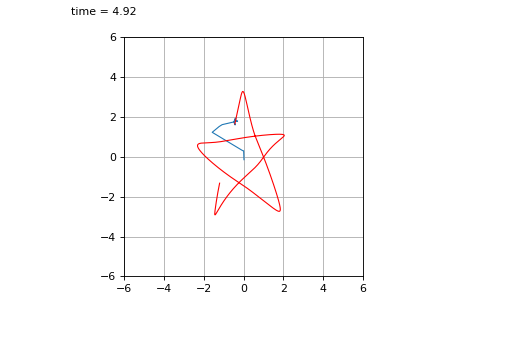

In [63]:
%matplotlib notebook

f = [[1.935483870967742, -2.974025974025974], [1.935483870967742, -2.941558441558441], [1.935483870967742, -2.9090909090909083], [1.935483870967742, -2.8766233766233764], [1.935483870967742, -2.8441558441558437], [1.935483870967742, -2.811688311688311], [1.935483870967742, -2.779220779220779], [1.935483870967742, -2.7467532467532463], [1.9112903225806441, -2.7467532467532463], [1.9112903225806441, -2.7142857142857135], [1.887096774193548, -2.6818181818181817], [1.887096774193548, -2.649350649350649], [1.887096774193548, -2.616883116883116], [1.862903225806452, -2.616883116883116], [1.862903225806452, -2.5844155844155843], [1.862903225806452, -2.5519480519480515], [1.838709677419354, -2.5194805194805188], [1.838709677419354, -2.487012987012987], [1.838709677419354, -2.454545454545454], [1.814516129032258, -2.454545454545454], [1.766129032258064, -2.2922077922077913], [1.766129032258064, -2.2597402597402594], [1.741935483870968, -2.2272727272727266], [1.741935483870968, -2.194805194805194], [1.741935483870968, -2.162337662337662], [1.741935483870968, -2.1298701298701292], [1.71774193548387, -2.1298701298701292], [1.71774193548387, -2.0974025974025965], [1.693548387096774, -2.0649350649350646], [1.693548387096774, -2.032467532467532], [1.693548387096774, -1.9999999999999991], [1.693548387096774, -1.9675324675324672], [1.669354838709678, -1.9675324675324672], [1.64516129032258, -1.8701298701298699], [1.620967741935484, -1.7727272727272725], [1.5967741935483861, -1.7402597402597397], [1.5967741935483861, -1.707792207792207], [1.5967741935483861, -1.675324675324675], [1.5967741935483861, -1.6428571428571423], [1.57258064516129, -1.6428571428571423], [1.57258064516129, -1.6103896103896096], [1.57258064516129, -1.5779220779220777], [1.57258064516129, -1.545454545454545], [1.548387096774194, -1.545454545454545], [1.548387096774194, -1.5129870129870122], [1.548387096774194, -1.4805194805194803], [1.5, -1.3181818181818175], [1.451612903225806, -1.1883116883116873], [1.42741935483871, -1.1233766233766227], [1.403225806451612, -1.1233766233766227], [1.403225806451612, -1.058441558441558], [1.403225806451612, -1.0259740259740253], [1.379032258064516, -1.0259740259740253], [1.379032258064516, -0.9935064935064926], [1.3548387096774182, -0.9285714285714279], [1.3548387096774182, -0.8961038961038952], [1.306451612903226, -0.8636363636363633], [1.306451612903226, -0.8311688311688306], [1.306451612903226, -0.7987012987012978], [1.2822580645161281, -0.7662337662337659], [1.2822580645161281, -0.7337662337662332], [1.258064516129032, -0.7012987012987004], [1.258064516129032, -0.6688311688311686], [1.233870967741936, -0.6363636363636358], [1.209677419354838, -0.603896103896103], [1.185483870967742, -0.5714285714285703], [1.112903225806452, -0.34415584415584366], [1.088709677419354, -0.3116883116883109], [1.088709677419354, -0.27922077922077815], [1.064516129032258, -0.27922077922077815], [1.064516129032258, -0.24675324675324628], [1.064516129032258, -0.21428571428571352], [1.0403225806451601, -0.21428571428571352], [1.0403225806451601, -0.18181818181818077], [1.0403225806451601, -0.1493506493506489], [1.016129032258064, -0.11688311688311614], [1.016129032258064, -0.08441558441558339], [0.991935483870968, -0.08441558441558339], [0.991935483870968, -0.05194805194805152], [0.9677419354838701, 0.01298701298701399], [0.9677419354838701, 0.04545454545454586], [0.943548387096774, 0.14285714285714324], [0.9193548387096779, 0.175324675324676], [0.8951612903225801, 0.20779220779220875], [0.8951612903225801, 0.2402597402597415], [0.8951612903225801, 0.30519480519480613], [0.870967741935484, 0.30519480519480613], [0.870967741935484, 0.337662337662338], [0.870967741935484, 0.37012987012987164], [0.8467741935483861, 0.4025974025974035], [0.8467741935483861, 0.4350649350649354], [0.82258064516129, 0.4350649350649354], [0.82258064516129, 0.467532467532469], [0.798387096774194, 0.467532467532469], [0.798387096774194, 0.5000000000000009], [0.798387096774194, 0.5324675324675328], [0.7741935483870961, 0.5649350649350664], [0.7258064516129021, 0.6948051948051956], [0.7258064516129021, 0.7272727272727275], [0.701612903225806, 0.7272727272727275], [0.701612903225806, 0.7597402597402612], [0.701612903225806, 0.792207792207793], [0.67741935483871, 0.8246753246753249], [0.67741935483871, 0.8571428571428585], [0.6532258064516121, 0.8896103896103904], [0.6532258064516121, 0.9220779220779223], [0.6532258064516121, 0.9545454545454559], [0.629032258064516, 0.9870129870129878], [0.6048387096774199, 0.9870129870129878], [0.6048387096774199, 1.0194805194805197], [0.6048387096774199, 1.0519480519480533], [0.5806451612903221, 1.116883116883117], [0.5806451612903221, 1.1493506493506507], [0.556451612903226, 1.1493506493506507], [0.556451612903226, 1.1818181818181825], [0.556451612903226, 1.2142857142857144], [0.556451612903226, 1.246753246753248], [0.5322580645161281, 1.246753246753248], [0.5322580645161281, 1.27922077922078], [0.508064516129032, 1.27922077922078], [0.508064516129032, 1.3116883116883118], [0.508064516129032, 1.3441558441558454], [0.48387096774193594, 1.3766233766233773], [0.48387096774193594, 1.4090909090909092], [0.48387096774193594, 1.4415584415584428], [0.4596774193548381, 1.4740259740259747], [0.38709677419354804, 1.6363636363636376], [0.38709677419354804, 1.6688311688311694], [0.38709677419354804, 1.701298701298703], [0.36290322580645196, 1.701298701298703], [0.36290322580645196, 1.733766233766235], [0.36290322580645196, 1.7662337662337668], [0.36290322580645196, 1.7987012987013005], [0.3387096774193541, 1.7987012987013005], [0.3387096774193541, 1.8311688311688323], [0.3387096774193541, 1.8636363636363642], [0.3387096774193541, 1.8961038961038978], [0.314516129032258, 1.9285714285714297], [0.29032258064516014, 1.9610389610389616], [0.29032258064516014, 2.025974025974027], [0.29032258064516014, 2.058441558441559], [0.26612903225806406, 2.058441558441559], [0.26612903225806406, 2.0909090909090926], [0.26612903225806406, 2.1233766233766245], [0.26612903225806406, 2.1558441558441563], [0.24193548387096797, 2.1558441558441563], [0.24193548387096797, 2.18831168831169], [0.24193548387096797, 2.220779220779222], [0.2177419354838701, 2.220779220779222], [0.2177419354838701, 2.2532467532467537], [0.2177419354838701, 2.2857142857142874], [0.19354838709677402, 2.3831168831168847], [0.19354838709677402, 2.4155844155844166], [0.16935483870967794, 2.4155844155844166], [0.16935483870967794, 2.4480519480519485], [0.16935483870967794, 2.480519480519482], [0.16935483870967794, 2.512987012987014], [0.16935483870967794, 2.545454545454546], [0.14516129032258007, 2.6103896103896114], [0.14516129032258007, 2.6428571428571432], [0.14516129032258007, 2.675324675324677], [0.14516129032258007, 2.7077922077922087], [0.14516129032258007, 2.7402597402597406], [0.12096774193548399, 2.7727272727272743], [0.12096774193548399, 2.805194805194806], [0.09677419354838612, 2.837662337662338], [0.09677419354838612, 2.8701298701298716], [0.09677419354838612, 2.9025974025974035], [0.09677419354838612, 2.9350649350649354], [0.09677419354838612, 2.967532467532469], [0.09677419354838612, 3.000000000000001], [0.07258064516129004, 3.000000000000001], [0.07258064516129004, 3.0324675324675328], [0.07258064516129004, 3.0649350649350664], [0.07258064516129004, 3.0974025974025983], [0.07258064516129004, 3.129870129870132], [0.04838709677419306, 3.162337662337664], [0.04838709677419306, 3.1948051948051956], [0.04838709677419306, 3.2272727272727293], [0.04838709677419306, 3.259740259740261], [0.04838709677419306, 3.292207792207793], [0.04838709677419306, 3.3246753246753267], [0.024193548387096087, 3.3571428571428585], [0.024193548387096087, 3.3896103896103904], [0.0, 3.3896103896103904], [0.0, 3.422077922077924], [0.0, 3.454545454545456], [0.0, 3.487012987012988], [0.0, 3.5194805194805214], [-0.024193548387096975, 3.5194805194805214], [-0.024193548387096975, 3.487012987012988], [-0.04838709677419395, 3.454545454545456], [-0.04838709677419395, 3.422077922077924], [-0.04838709677419395, 3.3896103896103904], [-0.07258064516129092, 3.3896103896103904], [-0.07258064516129092, 3.3571428571428585], [-0.09677419354838701, 3.3571428571428585], [-0.09677419354838701, 3.3246753246753267], [-0.09677419354838701, 3.259740259740261], [-0.09677419354838701, 3.2272727272727293], [-0.09677419354838701, 3.1948051948051956], [-0.12096774193548399, 3.1948051948051956], [-0.12096774193548399, 3.162337662337664], [-0.12096774193548399, 3.129870129870132], [-0.14516129032258096, 3.0324675324675328], [-0.14516129032258096, 3.000000000000001], [-0.14516129032258096, 2.967532467532469], [-0.16935483870967794, 2.967532467532469], [-0.16935483870967794, 2.9350649350649354], [-0.16935483870967794, 
2.9025974025974035], [-0.19354838709677402, 2.9025974025974035], [-0.19354838709677402, 2.8701298701298716], [-0.19354838709677402, 2.837662337662338], [-0.19354838709677402, 2.805194805194806], [-0.217741935483871, 2.7727272727272743], [-0.217741935483871, 2.7402597402597406], [-0.217741935483871, 2.7077922077922087], [-0.24193548387096797, 2.7077922077922087], [-0.24193548387096797, 2.6428571428571432], [-0.24193548387096797, 2.6103896103896114], [-0.24193548387096797, 2.5779220779220795], [-0.24193548387096797, 2.545454545454546], [-0.26612903225806495, 2.480519480519482], [-0.2903225806451619, 2.4155844155844166], [-0.2903225806451619, 2.3831168831168847], [-0.2903225806451619, 2.350649350649351], [-0.2903225806451619, 2.3181818181818192], [-0.314516129032258, 2.3181818181818192], [-0.314516129032258, 2.2857142857142874], [-0.314516129032258, 2.2532467532467537], [-0.314516129032258, 2.220779220779222], [-0.314516129032258, 2.18831168831169], [-0.314516129032258, 2.1558441558441563], [-0.338709677419355, 2.1233766233766245], [-0.338709677419355, 2.0909090909090926], [-0.338709677419355, 2.058441558441559], [-0.36290322580645196, 1.9935064935064952], [-0.36290322580645196, 1.9610389610389616], [-0.36290322580645196, 1.9285714285714297], [-0.36290322580645196, 1.8961038961038978], [-0.36290322580645196, 1.8636363636363642], [-0.38709677419354893, 1.8636363636363642], [-0.38709677419354893, 1.8311688311688323], [-0.38709677419354893, 1.7987012987013005], [-0.411290322580645, 1.7987012987013005], [-0.411290322580645, 1.7662337662337668], [-0.411290322580645, 1.733766233766235], [-0.411290322580645, 1.701298701298703], [-0.435483870967742, 1.6363636363636376], [-0.435483870967742, 1.6038961038961057], [-0.435483870967742, 1.571428571428572], [-0.435483870967742, 1.5389610389610402], [-0.435483870967742, 1.5064935064935083], [-0.45967741935483897, 1.4740259740259747], [-0.45967741935483897, 1.4415584415584428], [-0.45967741935483897, 1.4090909090909092], [-0.45967741935483897, 1.3766233766233773], [-0.48387096774193594, 1.3441558441558454], [-0.48387096774193594, 1.3116883116883118], [-0.5080645161290329, 1.27922077922078], [-0.532258064516129, 1.1818181818181825], [-0.532258064516129, 1.116883116883117], [-0.556451612903226, 1.0844155844155852], [-0.556451612903226, 1.0519480519480533], [-0.556451612903226, 1.0194805194805197], [-0.580645161290323, 1.0194805194805197], [-0.580645161290323, 0.9870129870129878], [-0.6048387096774199, 0.9870129870129878], [-0.6048387096774199, 0.9545454545454559], [-0.6048387096774199, 0.9220779220779223], [-0.6048387096774199, 0.8896103896103904], [-0.629032258064516, 0.8896103896103904], [-0.629032258064516, 0.8571428571428585], [-0.629032258064516, 0.8246753246753249], [-0.653225806451613, 0.7597402597402612], [-0.67741935483871, 0.7272727272727275], [-0.7016129032258069, 0.6623376623376638], [-0.7016129032258069, 0.6298701298701301], [-0.7258064516129039, 0.5974025974025983], [-0.7258064516129039, 0.5649350649350664], [-0.75, 0.5000000000000009], [-0.75, 0.467532467532469], [-0.75, 0.4350649350649354], [-0.774193548387097, 0.4350649350649354], [-0.774193548387097, 0.4025974025974035], [-0.798387096774194, 0.37012987012987164], [-0.798387096774194, 0.337662337662338], [-0.8225806451612909, 0.30519480519480613], [-0.846774193548387, 0.175324675324676], [-0.9193548387096779, 0.01298701298701399], [-0.9193548387096779, -0.019480519480518765], [-0.9193548387096779, -0.05194805194805152], [-0.943548387096774, -0.08441558441558339], [-0.943548387096774, -0.11688311688311614], [-0.943548387096774, -0.1493506493506489], [-0.943548387096774, -0.18181818181818077], [-0.967741935483871, -0.18181818181818077], [-0.967741935483871, -0.21428571428571352], [-0.991935483870968, -0.24675324675324628], [-0.991935483870968, -0.27922077922077815], [-0.991935483870968, -0.3116883116883109], [-1.016129032258065, -0.4090909090909083], [-1.040322580645162, -0.5064935064935057], [-1.040322580645162, -0.5389610389610384], [-1.040322580645162, -0.5714285714285703], [-1.064516129032258, -0.5714285714285703], [-1.064516129032258, -0.603896103896103], [-1.088709677419355, -0.6363636363636358], [-1.088709677419355, -0.6688311688311686], [-1.088709677419355, -0.7012987012987004], [-1.088709677419355, -0.7337662337662332], [-1.088709677419355, -0.7662337662337659], [-1.088709677419355, -0.7987012987012978], [-1.088709677419355, -0.8311688311688306], [-1.112903225806452, -0.8311688311688306], [-1.112903225806452, -0.8636363636363633], [-1.112903225806452, -0.9610389610389607], [-1.112903225806452, -1.0259740259740253], [-1.112903225806452, -1.058441558441558], [-1.137096774193549, -1.058441558441558], [-1.137096774193549, -1.09090909090909], [-1.137096774193549, -1.1233766233766227], [-1.137096774193549, -1.1558441558441555], [-1.137096774193549, -1.22077922077922], [-1.161290322580645, -1.2532467532467528], [-1.161290322580645, -1.2857142857142847], [-1.161290322580645, -1.3506493506493502], [-1.161290322580645, -1.383116883116882], [-1.161290322580645, -1.4155844155844148], [-1.209677419354839, -1.5129870129870122], [-1.209677419354839, -1.545454545454545], [-1.209677419354839, -1.5779220779220777], [-1.209677419354839, -1.6103896103896096], [-1.233870967741936, -1.6428571428571423], [-1.233870967741936, -1.675324675324675], [-1.233870967741936, -1.7402597402597397], [-1.233870967741936, -1.8051948051948044], [-1.258064516129033, -1.8051948051948044], [-1.258064516129033, -1.837662337662337], [-1.258064516129033, -1.8701298701298699], [-1.258064516129033, -1.9350649350649345], [-1.258064516129033, -1.9675324675324672], [-1.282258064516129, -1.9999999999999991], [-1.282258064516129, -2.032467532467532], [-1.306451612903226, -2.032467532467532], [-1.306451612903226, -2.0649350649350646], [-1.306451612903226, -2.0974025974025965], [-1.330645161290323, -2.194805194805194], [-1.330645161290323, -2.2272727272727266], [-1.35483870967742, -2.2597402597402594], [-1.35483870967742, -2.2922077922077913], [-1.35483870967742, -2.324675324675324], [-1.35483870967742, -2.3571428571428568], [-1.379032258064516, -2.3571428571428568], [-1.403225806451613, -2.454545454545454], [-1.42741935483871, -2.5194805194805188], [-1.42741935483871, -2.5519480519480515], [-1.42741935483871, -2.5844155844155843], [-1.42741935483871, -2.616883116883116], [-1.451612903225807, -2.616883116883116], [-1.451612903225807, -2.649350649350649], [-1.451612903225807, -2.6818181818181817], [-1.451612903225807, -2.7142857142857135], [-1.475806451612903, -2.7142857142857135], [-1.5, -2.7142857142857135], [-1.5, -2.7467532467532463], [-1.5, -2.779220779220779], [-1.524193548387097, -2.8441558441558437], [-1.524193548387097, -2.8766233766233764], [-1.524193548387097, -2.9090909090909083], [-1.524193548387097, -2.941558441558441], [-1.524193548387097, -2.974025974025974], [-1.524193548387097, -3.0064935064935057], [-1.524193548387097, -3.0389610389610384], [-1.524193548387097, -3.071428571428571], [-1.524193548387097, -3.103896103896103], [-1.524193548387097, -3.071428571428571], [-1.5, -3.071428571428571], [-1.5, -3.0389610389610384], [-1.475806451612903, -3.0389610389610384], [-1.475806451612903, -3.0064935064935057], [-1.451612903225807, -3.0064935064935057], [-1.451612903225807, -2.974025974025974], [-1.42741935483871, -2.941558441558441], [-1.42741935483871, -2.9090909090909083], [-1.403225806451613, -2.9090909090909083], [-1.379032258064516, -2.8441558441558437], [-1.35483870967742, -2.811688311688311], [-1.330645161290323, -2.779220779220779], [-1.330645161290323, -2.7467532467532463], 
[-1.306451612903226, -2.7467532467532463], [-1.282258064516129, -2.7467532467532463], [-1.282258064516129, -2.7142857142857135], [-1.282258064516129, -2.6818181818181817], [-1.258064516129033, -2.6818181818181817], [-1.258064516129033, -2.649350649350649], [-1.233870967741936, -2.649350649350649], [-1.233870967741936, -2.616883116883116], [-1.209677419354839, -2.616883116883116], [-1.209677419354839, -2.5844155844155843], [-1.185483870967742, -2.5519480519480515], [-1.112903225806452, -2.454545454545454], [-1.112903225806452, -2.3896103896103895], [-1.088709677419355, -2.3896103896103895], [-1.064516129032258, -2.3571428571428568], [-1.064516129032258, -2.324675324675324], [-1.040322580645162, -2.324675324675324], [-1.040322580645162, -2.2922077922077913], [-1.016129032258065, -2.2597402597402594], [-1.016129032258065, -2.2272727272727266], [-0.991935483870968, -2.2272727272727266], [-0.967741935483871, -2.194805194805194], [-0.943548387096774, -2.194805194805194], [-0.943548387096774, -2.162337662337662], [-0.895161290322581, -2.0974025974025965], [-0.870967741935484, -2.0649350649350646], [-0.846774193548387, -2.032467532467532], 
[-0.846774193548387, -1.9999999999999991], [-0.7258064516129039, -1.8701298701298699], [-0.67741935483871, -1.7727272727272725], [-0.653225806451613, -1.7727272727272725], [-0.629032258064516, -1.7402597402597397], [-0.580645161290323, -1.675324675324675], [-0.556451612903226, -1.6428571428571423], [-0.532258064516129, -1.6103896103896096], [-0.5080645161290329, -1.6103896103896096], [-0.48387096774193594, -1.5779220779220777], [-0.45967741935483897, -1.545454545454545], [-0.435483870967742, -1.5129870129870122], [-0.411290322580645, -1.5129870129870122], [-0.38709677419354893, -1.4805194805194803], [-0.36290322580645196, -1.4480519480519476], [-0.338709677419355, -1.4155844155844148], [-0.314516129032258, -1.383116883116882], [-0.2903225806451619, -1.383116883116882], [-0.2903225806451619, -1.3506493506493502], [-0.26612903225806495, -1.3506493506493502], [-0.19354838709677402, -1.2857142857142847], [-0.024193548387096975, -1.1233766233766227], [0.0, -1.09090909090909], [0.024193548387096087, -1.09090909090909], [0.024193548387096087, -1.058441558441558], [0.04838709677419306, -1.058441558441558], [0.04838709677419306, -1.0259740259740253], [0.09677419354838612, -1.0259740259740253], [0.09677419354838612, -0.9935064935064926], [0.12096774193548399, -0.9610389610389607], [0.12096774193548399, -0.9285714285714279], [0.14516129032258007, -0.9285714285714279], 
[0.16935483870967794, -0.9285714285714279], [0.16935483870967794, -0.8961038961038952], [0.26612903225806406, -0.7987012987012978], [0.29032258064516014, -0.7987012987012978], [0.314516129032258, -0.7662337662337659], [0.3387096774193541, -0.7662337662337659], [0.3387096774193541, -0.7337662337662332], [0.3387096774193541, -0.7012987012987004], [0.38709677419354804, -0.7012987012987004], [0.41129032258064413, -0.6688311688311686], [0.41129032258064413, -0.6363636363636358], [0.435483870967742, -0.6363636363636358], [0.435483870967742, -0.603896103896103], [0.4596774193548381, -0.603896103896103], [0.48387096774193594, -0.603896103896103], [0.48387096774193594, -0.5714285714285703], [0.508064516129032, -0.5714285714285703], [0.5322580645161281, -0.5064935064935057], [0.6048387096774199, -0.44155844155844104], [0.629032258064516, -0.44155844155844104], [0.6532258064516121, -0.44155844155844104], [0.6532258064516121, -0.4090909090909083], [0.67741935483871, -0.4090909090909083], [0.701612903225806, -0.3766233766233755], [0.7258064516129021, -0.3766233766233755], [0.75, -0.3116883116883109], [0.798387096774194, -0.27922077922077815], [0.82258064516129, -0.24675324675324628], [0.8467741935483861, -0.24675324675324628], [0.8467741935483861, -0.21428571428571352], [0.870967741935484, -0.21428571428571352], [0.9193548387096779, -0.1493506493506489], [0.943548387096774, -0.11688311688311614], [0.991935483870968, -0.11688311688311614], [0.991935483870968, -0.08441558441558339], [1.016129032258064, -0.08441558441558339], [1.016129032258064, -0.05194805194805152], [1.0403225806451601, -0.05194805194805152], [1.088709677419354, 0.01298701298701399], [1.137096774193548, 0.04545454545454586], [1.137096774193548, 0.07792207792207861], [1.1612903225806441, 0.07792207792207861], [1.1612903225806441, 0.11038961038961137], [1.185483870967742, 0.11038961038961137], [1.185483870967742, 0.14285714285714324], [1.209677419354838, 0.14285714285714324], [1.233870967741936, 0.20779220779220875], [1.258064516129032, 0.2402597402597415], [1.2822580645161281, 0.2402597402597415], [1.2822580645161281, 0.2727272727272734], [1.306451612903226, 0.2727272727272734], [1.306451612903226, 0.30519480519480613], [1.330645161290322, 0.337662337662338], [1.3548387096774182, 0.37012987012987164], [1.379032258064516, 0.37012987012987164], [1.379032258064516, 0.4025974025974035], [1.403225806451612, 0.4025974025974035], [1.403225806451612, 0.4350649350649354], [1.42741935483871, 0.4350649350649354], [1.42741935483871, 0.467532467532469], [1.451612903225806, 0.5000000000000009], [1.451612903225806, 0.5324675324675328], [1.4758064516129021, 0.5324675324675328], [1.4758064516129021, 0.5649350649350664], [1.5, 0.5974025974025983], [1.524193548387096, 0.6298701298701301], [1.524193548387096, 0.6623376623376638], [1.548387096774194, 0.6623376623376638], [1.548387096774194, 0.6948051948051956], [1.5967741935483861, 0.7272727272727275], [1.5967741935483861, 0.7597402597402612], [1.620967741935484, 0.7597402597402612], [1.64516129032258, 0.792207792207793], [1.669354838709678, 0.792207792207793], [1.669354838709678, 0.8246753246753249], [1.693548387096774, 0.8246753246753249], [1.71774193548387, 0.8246753246753249], [1.71774193548387, 0.8571428571428585], [1.741935483870968, 0.8571428571428585], [1.741935483870968, 0.8896103896103904], [1.766129032258064, 0.8896103896103904], [1.7903225806451601, 0.8896103896103904], [1.7903225806451601, 0.9220779220779223], [1.814516129032258, 0.9220779220779223], [1.838709677419354, 0.9220779220779223], [1.862903225806452, 0.9220779220779223], [1.887096774193548, 0.9220779220779223], [1.887096774193548, 0.9545454545454559], [1.9112903225806441, 0.9545454545454559], [1.935483870967742, 0.9545454545454559], [1.959677419354838, 0.9545454545454559], [1.983870967741936, 0.9545454545454559], [1.983870967741936, 0.9870129870129878], [2.008064516129032, 0.9870129870129878], [2.032258064516128, 0.9870129870129878], [2.080645161290322, 1.0194805194805197], [2.104838709677418, 1.0194805194805197], [2.104838709677418, 1.0519480519480533], [2.129032258064516, 1.0519480519480533], [2.129032258064516, 1.0844155844155852], [2.153225806451612, 1.0844155844155852], [2.153225806451612, 1.116883116883117], [2.153225806451612, 1.1493506493506507], [2.129032258064516, 1.1493506493506507], [2.104838709677418, 1.1493506493506507], 
[2.080645161290322, 1.1493506493506507], [2.056451612903226, 1.1493506493506507], [2.032258064516128, 1.1493506493506507], [2.008064516129032, 1.1493506493506507], [1.983870967741936, 1.1493506493506507], [1.959677419354838, 1.1493506493506507], [1.935483870967742, 1.1493506493506507], [1.9112903225806441, 1.1493506493506507], [1.838709677419354, 1.1493506493506507], [1.766129032258064, 1.1493506493506507], [1.741935483870968, 1.1493506493506507], [1.693548387096774, 1.1493506493506507], [1.669354838709678, 1.1493506493506507], [1.64516129032258, 1.1493506493506507], [1.620967741935484, 1.1493506493506507], [1.5967741935483861, 1.1493506493506507], [1.57258064516129, 1.1493506493506507], [1.548387096774194, 1.1493506493506507], [1.524193548387096, 1.1493506493506507], [1.5, 1.1493506493506507], [1.4758064516129021, 1.1493506493506507], [1.4758064516129021, 1.116883116883117], [1.451612903225806, 1.116883116883117], [1.42741935483871, 1.116883116883117], [1.330645161290322, 1.116883116883117], [1.1612903225806441, 1.0844155844155852], [1.112903225806452, 1.0844155844155852], [1.088709677419354, 1.0844155844155852], [1.064516129032258, 1.0844155844155852], [1.0403225806451601, 1.0844155844155852], [0.991935483870968, 1.0844155844155852], [0.9677419354838701, 1.0519480519480533], [0.9193548387096779, 1.0519480519480533], [0.870967741935484, 1.0519480519480533], [0.8467741935483861, 1.0519480519480533], [0.798387096774194, 1.0519480519480533], [0.7741935483870961, 1.0519480519480533], [0.75, 1.0519480519480533], [0.701612903225806, 1.0194805194805197], [0.67741935483871, 1.0194805194805197], [0.629032258064516, 1.0194805194805197], [0.6048387096774199, 1.0194805194805197], [0.556451612903226, 1.0194805194805197], [0.41129032258064413, 1.0194805194805197], [0.12096774193548399, 0.9870129870129878], [0.07258064516129004, 0.9870129870129878], [0.024193548387096087, 0.9870129870129878], [0.0, 0.9870129870129878], [0.0, 0.9545454545454559], [-0.024193548387096975, 0.9545454545454559], [-0.07258064516129092, 0.9545454545454559], [-0.19354838709677402, 0.9545454545454559], [-0.217741935483871, 0.9545454545454559], [-0.217741935483871, 0.9220779220779223], [-0.24193548387096797, 0.9220779220779223], [-0.26612903225806495, 0.9220779220779223], [-0.2903225806451619, 0.9220779220779223], [-0.314516129032258, 0.9220779220779223], [-0.338709677419355, 0.9220779220779223], [-0.45967741935483897, 0.8896103896103904], [-0.5080645161290329, 0.8571428571428585], [-0.556451612903226, 0.8571428571428585], [-0.580645161290323, 0.8571428571428585], [-0.6048387096774199, 0.8571428571428585], [-0.6048387096774199, 0.8246753246753249], [-0.653225806451613, 0.8246753246753249], [-0.67741935483871, 0.8246753246753249], [-0.7016129032258069, 
0.8246753246753249], [-0.7258064516129039, 0.8246753246753249], [-0.75, 0.8246753246753249], [-0.774193548387097, 0.8246753246753249], [-0.8225806451612909, 0.8246753246753249], [-0.846774193548387, 0.8246753246753249], [-0.846774193548387, 0.792207792207793], [-0.895161290322581, 0.792207792207793], [-1.161290322580645, 0.7597402597402612], [-1.185483870967742, 0.7597402597402612], [-1.209677419354839, 0.7597402597402612], [-1.233870967741936, 0.7597402597402612], [-1.258064516129033, 0.7597402597402612], [-1.282258064516129, 0.7272727272727275], [-1.306451612903226, 0.7272727272727275], [-1.330645161290323, 0.7272727272727275], [-1.35483870967742, 0.7272727272727275], [-1.379032258064516, 0.7272727272727275], [-1.403225806451613, 0.7272727272727275], [-1.42741935483871, 0.7272727272727275], [-1.451612903225807, 0.7272727272727275], [-1.475806451612903, 0.7272727272727275], [-1.5, 0.7272727272727275], [-1.524193548387097, 0.7272727272727275], [-1.548387096774194, 0.7272727272727275], [-1.572580645161291, 0.7272727272727275], [-1.596774193548387, 0.7272727272727275], [-1.620967741935484, 0.7272727272727275], [-1.645161290322581, 0.7272727272727275], [-1.669354838709678, 0.7272727272727275], [-1.693548387096774, 0.6948051948051956], [-1.717741935483871, 0.6948051948051956], [-1.741935483870968, 0.6948051948051956], [-1.766129032258065, 0.6948051948051956], [-1.790322580645162, 0.6948051948051956], [-1.814516129032258, 0.6948051948051956], [-1.838709677419355, 0.6948051948051956], [-1.862903225806452, 0.6948051948051956], [-1.887096774193549, 0.6948051948051956], [-1.911290322580645, 0.6948051948051956], [-1.935483870967742, 0.6948051948051956], [-1.959677419354839, 0.6948051948051956], [-1.983870967741936, 0.6948051948051956], [-2.008064516129033, 0.6948051948051956], [-2.032258064516129, 0.6948051948051956], 
[-2.056451612903226, 0.6948051948051956], [-2.056451612903226, 0.6623376623376638], [-2.080645161290323, 0.6623376623376638], [-2.10483870967742, 0.6623376623376638], [-2.129032258064516, 0.6623376623376638], [-2.153225806451613, 
0.6623376623376638], [-2.17741935483871, 0.6623376623376638], [-2.201612903225807, 0.6623376623376638], [-2.201612903225807, 0.6298701298701301], [-2.225806451612903, 0.6298701298701301], [-2.25, 0.6298701298701301], [-2.274193548387097, 0.6298701298701301], [-2.298387096774194, 0.6298701298701301], [-2.298387096774194, 0.5974025974025983], [-2.322580645161291, 0.5974025974025983], [-2.346774193548387, 0.5974025974025983], [-2.370967741935484, 0.5974025974025983], [-2.370967741935484, 0.5649350649350664], [-2.395161290322581, 0.5649350649350664], [-2.419354838709678, 0.5649350649350664], [-2.443548387096774, 0.5649350649350664], [-2.467741935483871, 0.5649350649350664], [-2.467741935483871, 0.5324675324675328], [-2.419354838709678, 0.5324675324675328], [-2.419354838709678, 0.5000000000000009], [-2.395161290322581, 0.5000000000000009], [-2.395161290322581, 0.467532467532469], [-2.370967741935484, 0.467532467532469], [-2.370967741935484, 0.4350649350649354], [-2.322580645161291, 0.4350649350649354], [-2.322580645161291, 0.4025974025974035], [-2.298387096774194, 0.4025974025974035], [-2.274193548387097, 0.4025974025974035], [-2.274193548387097, 0.37012987012987164], [-2.225806451612903, 0.30519480519480613], [-2.17741935483871, 0.2727272727272734], [-2.129032258064516, 0.2402597402597415], [-2.10483870967742, 0.20779220779220875], [-2.10483870967742, 0.175324675324676], [-2.080645161290323, 0.175324675324676], [-2.056451612903226, 0.14285714285714324], [-2.032258064516129, 0.14285714285714324], [-2.008064516129033, 0.11038961038961137], [-1.983870967741936, 0.11038961038961137], [-1.983870967741936, 0.07792207792207861], [-1.959677419354839, 0.04545454545454586], [-1.935483870967742, 0.04545454545454586], [-1.911290322580645, 0.01298701298701399], [-1.887096774193549, 0.01298701298701399], [-1.862903225806452, -0.019480519480518765], [-1.838709677419355, -0.019480519480518765], [-1.475806451612903, -0.34415584415584366], [-1.42741935483871, -0.34415584415584366], [-1.42741935483871, -0.3766233766233755], [-1.403225806451613, -0.3766233766233755], [-1.379032258064516, -0.4090909090909083], [-1.35483870967742, -0.44155844155844104], [-1.330645161290323, -0.44155844155844104], [-1.306451612903226, -0.44155844155844104], [-1.306451612903226, -0.4740259740259729], [-1.282258064516129, -0.4740259740259729], [-1.258064516129033, -0.4740259740259729], [-1.233870967741936, -0.5064935064935057], [-1.209677419354839, -0.5064935064935057], [-1.112903225806452, -0.603896103896103], [-1.088709677419355, -0.6688311688311686], [-1.064516129032258, -0.6688311688311686], [-1.016129032258065, -0.7012987012987004], [-1.016129032258065, -0.7337662337662332], [-0.991935483870968, -0.7337662337662332], [-0.991935483870968, -0.7662337662337659], [-0.967741935483871, -0.7662337662337659], [-0.967741935483871, -0.7987012987012978], [-0.943548387096774, -0.7987012987012978], [-0.9193548387096779, -0.7987012987012978], [-0.9193548387096779, -0.8311688311688306], [-0.895161290322581, -0.8311688311688306], [-0.895161290322581, -0.8636363636363633], [-0.870967741935484, -0.8636363636363633], [-0.846774193548387, -0.8961038961038952], [-0.8225806451612909, -0.8961038961038952], [-0.798387096774194, -0.9285714285714279], [-0.75, -0.9610389610389607], [-0.7016129032258069, -0.9935064935064926], [-0.67741935483871, -1.0259740259740253], [-0.653225806451613, -1.0259740259740253], [-0.6048387096774199, -1.058441558441558], [-0.580645161290323, -1.058441558441558], [-0.580645161290323, -1.09090909090909], [-0.532258064516129, -1.1233766233766227], [-0.5080645161290329, -1.1233766233766227], [-0.48387096774193594, -1.1233766233766227], [-0.45967741935483897, -1.1558441558441555], [-0.435483870967742, -1.1558441558441555], [-0.411290322580645, -1.1883116883116873], [-0.38709677419354893, -1.1883116883116873], [-0.36290322580645196, -1.1883116883116873], [-0.36290322580645196, -1.22077922077922], [-0.217741935483871, -1.2857142857142847], [-0.19354838709677402, -1.3181818181818175], [-0.16935483870967794, -1.3181818181818175], [-0.16935483870967794, -1.3506493506493502], [-0.14516129032258096, -1.3506493506493502], [-0.12096774193548399, -1.3506493506493502], [-0.12096774193548399, -1.383116883116882], [-0.09677419354838701, -1.383116883116882], [-0.07258064516129092, -1.4155844155844148], [-0.024193548387096975, -1.4480519480519476], [0.0, -1.4480519480519476], [0.024193548387096087, -1.4480519480519476], [0.024193548387096087, -1.4805194805194803], [0.04838709677419306, -1.4805194805194803], [0.07258064516129004, -1.5129870129870122], [0.09677419354838612, -1.5129870129870122], [0.14516129032258007, -1.545454545454545], [0.16935483870967794, -1.5779220779220777], [0.19354838709677402, -1.5779220779220777], [0.2177419354838701, -1.6103896103896096], [0.24193548387096797, -1.6428571428571423], [0.26612903225806406, -1.6428571428571423], [0.29032258064516014, -1.6428571428571423], [0.29032258064516014, -1.675324675324675], [0.314516129032258, -1.675324675324675], [0.3387096774193541, -1.675324675324675], [0.36290322580645196, -1.707792207792207], [0.41129032258064413, -1.707792207792207], [0.41129032258064413, -1.7402597402597397], [0.435483870967742, -1.7402597402597397], [0.4596774193548381, -1.7402597402597397], [0.4596774193548381, -1.7727272727272725], [0.48387096774193594, -1.7727272727272725], [0.48387096774193594, -1.8051948051948044], [0.508064516129032, -1.8051948051948044], [0.508064516129032, -1.837662337662337], [0.5322580645161281, -1.837662337662337], [0.556451612903226, -1.837662337662337], [0.556451612903226, -1.8701298701298699], [0.6048387096774199, -1.8701298701298699], [0.701612903225806, -1.9675324675324672], [0.75, -1.9999999999999991], [0.7741935483870961, -2.032467532467532], [0.798387096774194, -2.0649350649350646], [0.82258064516129, -2.0649350649350646], [0.8467741935483861, -2.0974025974025965], [0.8951612903225801, -2.0974025974025965], [0.8951612903225801, -2.1298701298701292], [0.9193548387096779, -2.1298701298701292], [0.9677419354838701, -2.162337662337662], [0.9677419354838701, -2.194805194805194], [0.991935483870968, -2.194805194805194], [1.016129032258064, -2.194805194805194], [1.016129032258064, -2.2272727272727266], [1.064516129032258, -2.2272727272727266], [1.064516129032258, -2.2597402597402594], [1.088709677419354, -2.2597402597402594], [1.112903225806452, -2.2597402597402594], [1.112903225806452, -2.2922077922077913], [1.112903225806452, -2.324675324675324], [1.137096774193548, -2.324675324675324], [1.1612903225806441, -2.324675324675324], [1.185483870967742, -2.3571428571428568], [1.209677419354838, -2.3571428571428568], [1.209677419354838, -2.3896103896103895], [1.233870967741936, -2.3896103896103895], [1.258064516129032, -2.3896103896103895], [1.2822580645161281, -2.3896103896103895], [1.2822580645161281, -2.4220779220779214], [1.306451612903226, -2.4220779220779214], 
[1.306451612903226, -2.454545454545454], [1.330645161290322, -2.454545454545454], [1.3548387096774182, -2.454545454545454], [1.3548387096774182, -2.487012987012987], [1.379032258064516, -2.487012987012987], [1.403225806451612, -2.487012987012987], [1.42741935483871, -2.487012987012987], [1.42741935483871, -2.5194805194805188], [1.451612903225806, -2.5194805194805188], [1.4758064516129021, -2.5194805194805188], [1.4758064516129021, -2.5519480519480515], [1.5, -2.5519480519480515], [1.524193548387096, -2.5844155844155843], [1.548387096774194, -2.5844155844155843], [1.57258064516129, -2.5844155844155843], [1.57258064516129, -2.616883116883116], [1.5967741935483861, -2.616883116883116], [1.620967741935484, -2.616883116883116], [1.620967741935484, -2.649350649350649], [1.64516129032258, -2.649350649350649], [1.669354838709678, -2.649350649350649], [1.693548387096774, -2.6818181818181817], [1.71774193548387, -2.6818181818181817], [1.741935483870968, -2.6818181818181817], [1.766129032258064, -2.7142857142857135], [1.766129032258064, -2.7467532467532463], [1.7903225806451601, -2.7467532467532463], [1.814516129032258, -2.7467532467532463], [1.838709677419354, -2.7467532467532463], [1.862903225806452, -2.7467532467532463], [1.862903225806452, -2.779220779220779], [1.887096774193548, -2.779220779220779], [1.9112903225806441, -2.779220779220779], [1.935483870967742, -2.779220779220779]]
n = 10

coefs_star = calculate_fouirer_coefs(f, n)

drawingM = drawingMachine(coefs_star)
drawingM.build(tl,10)

ani = animateF(drawingM,tl)   

You can copy the full code from this [repo]() (and I will be glad if you do) and actually doodle something yourself.

## 6. Conclusion <a class="anchor" id="Conclusion"></a>

In this notebook, we went through a quite long journey, defining what is a signal in the sense computers and electronics,
went through the layers of the Fourier Series and Fourier Transform. We saw the uses of both: 
 - Fourier Transform can switch a signal between the time and frequency domain
 - Fourier Series can approximate a function and solve it in infinity
 
 
We learned how we can use matplotlib to do not only plots but interactive programs and animations. 

This whole project was inspired by the cat curve, so what better way to end than to draw it? Thanks for your attention!

<IPython.core.display.Javascript object>


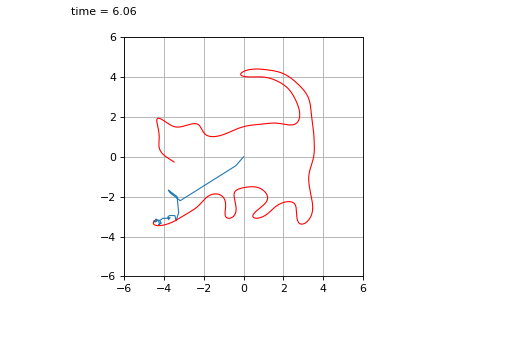

In [66]:
%matplotlib notebook

cat_curve = [[3.4698333333333333, -2.503331871345029], [3.4702617823362734, -2.5256243470303743], [3.470336565073887, -2.548022561760027], [3.470038093079084, -2.570523133446898], [3.469346889623718, -2.593121410102043], [3.4682437095825707, -2.615811417033396], [3.466709663695631, -2.6385858086207743], [3.4647263464101288, -2.6614358250866625], [3.4622759664365064, -2.6843512546697896], [3.4593414791110964, -2.7073204015930954], [3.4559067196231723, -2.7303300601996887], [3.4519565361353246, -2.753365495609697], [3.4474769218044297, -2.77641043122743], [3.442455144695734, -2.7994470434023184], [3.436879874575273, -2.8224559635184145], [3.430741305565986, -2.845416287756139], [3.424031273660447, -2.8683055947364795], [3.416743368098502, -2.891099971222009], [3.4088730356408363, -2.9137740460112194], [3.4004176767998926, -2.9363010321226892], [3.3913767331272195, -2.9586527773239095], [3.381751764701294, -2.9807998230162425], [3.3715465170116, -3.002711471442678], [3.3607669764934642, -3.024355861139208], [3.349421414032696, -3.0457000505036302], [3.3375204158301655, -3.066710109308099], [3.3250769010924124, -3.0873512179337563], [3.3121061260958884, -3.1075877740576017], [3.298625674257933, -3.127383506473837], [3.2846554319375083, -3.14670159568445], [3.2702175497814094, -3.165504800846948], [3.255336389527662, -3.1837555926216514], [3.2400384562752724, -3.2014162914165523], [3.2243523163288534, -3.2184492104852493], [3.2083085008263, -3.234816803292924], [3.191939395457617, -3.25048181452708], [3.1752791166820127, -3.2654074340942083], [3.1583633749481987, -3.279557453410852], [3.1412293255182817, -3.2928964232681746], [3.123915407588541, -3.3053898125229635], [3.106461172489605, -3.317004166846057], [3.0889071018337195, -3.327707266740544], [3.0712944165572096, -3.337468284028314], [3.0536648778811553, -3.346257935993572], [3.036060581282378, -3.354048636366845], [3.0185237446292827, -3.3608146423325103], [3.0010964916927128, -3.366532196747106], [2.9838206322898775, -3.3711796647649908], [2.9667374403597218, -3.3747376640818363], [2.949887431300017, -3.377189188025753], [2.933310139919877, -3.378519720749687], [2.9170439003761697, -3.378717343807776], [2.901125629467913, -3.3777728334320782], [2.8855906146595482, -3.375679747864549], [2.8704723081913768, -3.3724345041422583], [2.8558021286139637, -3.3680364437811905], [2.841609271052558, -3.3624878868556607], [2.8279205274679686, -3.3557941740258395], [2.8147601181320243, -3.347963696125112], [2.802149535478691, -3.3390079109815143], [2.7901074014270053, -3.32894134721292], [2.7786493391989175, -3.3177815948038734], [2.767787860574803, -3.305549282342331], [2.7575322694421875, -3.2922680408667104], [2.7478885823993737, -3.277964454347302], [2.738859467076307, -3.262667996900599], [2.730444198730033, -3.2464109569101014], [2.7226386355629826, -3.2292283483021786], [2.7154352130989086, -3.211157809299997], [2.7088229578350744, -3.1922394890521617], [2.702787520270423, -3.1725159226046586], [2.697311227289169, -3.1520318947548502], [2.692373153757798, -3.1308342933938467], [2.6879492130723714, -3.1089719530083197], [2.684012266272231, -3.0864954890741876], [2.680532249217334, -3.063457124131958], [2.677476317209616, -3.0399105063869287], [2.674809006325305, -3.015910521725828], [2.67249241061531, -2.991513100085142], [2.6704863742258094, -2.9667750171444567], [2.6687486973914587, -2.9417536923505376], [2.6672353551598587, -2.9165069843044473], [2.665900727619075, -2.891092984564112], [2.664697840320204, -2.865569810928644], [2.6635786135151767, -2.83999540127796], [2.6624941187665683, -2.814427309041721], [2.6613948414315045, -2.7889225013655126], [2.6602309474764807, -2.7635371610290456], [2.658952553044033, -2.7383264931515314], [2.6575099951663645, -2.7133445376928584], [2.655854102005253, -2.6886439887262124], [2.6539364609919844, -2.6642760214183907], [2.6517096832458353, -2.6402901276084596], [2.6491276626649483, -2.6167339608239013], [2.6461458281087356, -2.5936531915162977], [2.6427213871268664, -2.5710913732361895], [2.6388135597354223, -2.549089820399547], [2.6343838007964893, -2.5276874982264803], [2.6293960096223286, -2.5069209253572704], [2.623816725499339, -2.4868240895714893], [2.6176153079097726, -2.4674283769539485], [2.6107641003200097, -2.4487625147665764], [2.6032385765026334, -2.4308525281989786], [2.595017468465095, -2.413721711082796], [2.5860828751694633, -2.397390610566627], [2.576420351345325, -2.3818770256600157], [2.566018975820196, -2.3671960194672277], [2.5548713989184346, -2.3533599448450007], [2.5429738686094088, -2.3403784831337022], [2.530326235218214, -2.3282586955290627], [2.5169319346462173, -2.317005086582276], [2.502797950183707, -2.306619679240601], [2.4879347531317277, -2.2971021007689485], [2.47235622258424, -2.288449678826005], [2.4560795448538593, -2.2806575469066717], [2.4391250931540593, -2.2737187583063503], [2.421516288276781, -2.2676244077124372], [2.403279441126236, -2.262363759484647], [2.384443578086359, -2.2579243816486123], [2.365040250310258, -2.25429228459727], [2.3451033281242446, -2.2514520634716386], [2.3246687818360474, -2.249387043177203], [2.303774450325828, -2.2480794249843132], [2.2824597988791844, -2.24751043366065], [2.2607656677927754, -2.2476604640913167], [2.23873401334512, -2.248509226356924], [2.21640764277703, -2.250035888262579], [2.193829944967782, -2.252219214340378], [2.1710446185239785, -2.2550377003848667], [2.148095399018224, -2.2584697026245912], [2.1250257871236773, -2.2624935606831444], [2.1018787793885374, -2.2670877135393512], [2.078696603381208, -2.272230807758388], [2.0555204589126252, -2.277901797332899], [2.0323902670068943, -2.2840800345453394], [2.009344428245327, -2.2907453513389116], [1.9864195920524121, -2.2978781307645697], [1.9636504384254474, -2.305459368154341], [1.9410694735330913, -2.3134707217566635], [1.9187068405222059, -2.321894552656418], [1.896590146777687, -2.330713953890554], [1.8747443087772127, -2.339912768758659], [1.8531914155722928, -2.3494755984160984], [1.8319506118097477, -2.3593877989246277], [1.8110380010842229, -2.369635468020893], [1.7904665702834441, -2.3802054219466435], [1.7702461354544707, -2.3910851627646954], [1.750383309581966, -2.402262836661413], [1.7308814925294136, -2.4137271838090424], [1.7117408832521093, -2.425467480428888], [1.6929585142475707, -2.437473473758805], [1.6745283080656563, -2.4497353106851087], [1.6564411555579788, -2.4622434608493284], [1.6386850154052675, -2.4749886350839954], [1.6212450343228284, -2.48796170006837], [1.6041036872091778, -2.501153590124351], [1.5872409363722724, -2.514555217094758], [1.5706344088420463, -2.528157379260278], [1.5542595906584151, -2.5419506702576276], [1.53809003691088, -2.5559253889599263], [1.5220975962004883, -2.570071451270764], [1.5062526480975433, -2.5843783047660294], [1.4905243520798979, -2.5988348470926605], [1.474880906357615, -2.6134293490007825], [1.4592898149204185, -2.6281493828459896], [1.4437181610855205, -2.642981757351747], [1.4281328857752857, -2.6579124593684713], [1.4125010687171575, -2.6729266033064927], [1.396790210732573, -2.6880083888547426], [1.380968515267559, -2.703141067526756], [1.365005167315089, -2.718306918500545], [1.348870607888775, -2.733487234139892], [1.3325368022281519, -2.7486623155022443], [1.3159774999485438, -2.7638114780532668], [1.2991684853923382, -2.7789130677209553], [1.2820878164935605, -2.793944487333758], [1.264716050533601, -2.8088822333979833], [1.2470364552423, -2.823701943080884], [1.2290352037848888, -2.8383784511774275], [1.2107015522711666, -2.8528858567523994], [1.1920279985279203, -2.86719759906485], [1.1730104209885797, -2.8812865423006087], [1.1536481966745722, -2.8951250685607075], [1.1339442973701177, -2.908685178480028], [1.1139053632255946, -2.9219385987817095], [1.0935417531630633, -2.9348568960097277], [1.0728675716004437, -2.947411595624561], [1.051900671157143, -2.959574305596298], [1.0306626311527871, -2.971316843585251], [1.0091787118611903, -2.9826113667637877], [0.9874777846327606, -2.9934305033036877], [0.9655922381494915, -3.003747484532282], [0.9435578612262033, -3.013536276747218], [0.9214137027191999, -3.0227717116747725], [0.899201909247819, -3.031429614559732], [0.876967541574729, -3.0394869288862107], [0.8547583706261537, -3.0469218367484756], [0.8326246542629946, -3.053713873918322], [0.8106188960367744, -3.059844038690975], [0.7887955872801428, -3.0652948936346713], [0.7672109339891838, -3.070050659418957], [0.7459225700536487, -3.0740972999542375], [0.7249892584805501, -3.077422598138308], [0.7044705823359477, -3.0800162215751707], [0.6844266271985926, -3.081869777706166], [0.6649176569769186, -3.0829768578731187], [0.6460037849874883, -3.0833330699167774], [0.6277446422277455, -3.0829360590011534], [0.6101990447989872, -3.081785516444331], [0.5934246624463068, -3.079883176428327], [0.5774776901810991, -3.077232800554076], [0.5624125249382689, -3.073840150301408], [0.5482814491948887, -3.0697129475478864], [0.5351343234396075, -3.064860823393002], [0.5230182893330113, -3.0592952556254214], [0.5119774853386533, -3.0530294952597874], [0.5020527765327669, -3.0460784826548477], [0.4932815002186047, -3.038458753806695], [0.48569722887890715, -3.0301883374876284], [0.4793295518982159, -3.0212866439734904], [0.4742038773759283, -3.011774346168283], [0.4703412552320005, -3.0016732539947673], [0.4677582226807009, -2.99100618297299], [0.46646667301464234, -2.9797968179543006], [0.46647374850226286, -2.9680695730166944], [0.46778175805784405, -2.9558494485575024], [0.47038812019504916, -2.943161886641474], [0.4742853316236279, -2.9300326256757323], [0.4794609616953957, -2.9164875554882634], [0.48589767275082724, -2.9025525738828133], [0.49357326626253134, -2.8882534457310776], [0.5024607545175236, -2.8736156656421974], [0.5125284574274653, -2.858664325220659], [0.5237401239060567, -2.843423985886387], [0.5360550771061668, -2.827918558185959], [0.5494283826673739, -2.8121711884711815], [0.5638110389879377, -2.7962041537617632], [0.579150188404894, -2.7800387655426317], [0.5953893480426771, -2.7636952831741217], [0.6124686589752469, -2.747192837515521], [0.6303251522398711, -2.7305493652798396], [0.648893030143092, -2.7137815545507635], [0.6681039612116993, -2.6969048018024626], [0.6878873870641833, -2.679933180669822], [0.7081708394117388, -2.6628794226214074], [0.7288802653427595, -2.6457549095912922], [0.7499403590013125, -2.628569678528815], [0.7712748977384878, -2.6113324377290312], [0.7928070807961093, -2.5940505947110695], [0.814459868575046, -2.5767302953182165], [0.8361563205453253, -2.5593764736227094], [0.8578199298725083, -2.541992912130722], [0.8793749528640382, -2.5245823116999215], [0.9007467313803917, -2.5071463705032726], [0.9218620064086164, -2.4896858712999816], [0.9426492210597881, -2.4722007762073517], [0.9630388113266403, -2.454690328107175], [0.9829634830227115, -2.4371531577668937], [1.0023584734191067, -2.4195873957103315], [1.021161796198864, -2.4019907878349773], [1.039314468461207, -2.3843608137434256], [1.0567607186279468, -2.366694806735695], [1.0734481742311093, -2.348990074396949], [1.0893280286937503, -2.331244018711642], [1.1043551863539762, -2.3134542546407086], [1.1184883851244047, -2.295618726112479], [1.1316902963249535, -2.277735818401113], [1.1439276013747248, -2.2598044658976204], [1.1551710451780643, -2.241824254318408], [1.1653954661895587, -2.2237955164438046], [1.174579803291812, -2.2057194205344044], [1.1827070797673311, -2.1875980506351675], [1.1897643647907996, -2.169434478046414], [1.1957427130094322, -2.151232823315617], [1.2006370829161022, -2.132998308184381], [1.2044462348515739, -2.11473729701021], [1.2071726095976232, -2.0964573272718443], [1.2088221886412212, -2.0781671288595693], [1.2094043373005856, -2.059876631947089], [1.2089316320059937, -2.0415969633384328], [1.207419673121111, -2.023340431281431], [1.2048868847737255, -2.0051204988373303], [1.2013543032375225, -1.9869517459936394], [1.1968453554685117, -1.96884982080347], [1.1913856294504732, -1.950831379928279], [1.1850026380430922, -1.9329140190519507], [1.1777255780539035, -1.9151161937210417], [1.1695850862708181, -1.8974571312486608], [1.1606129941955432, -1.8799567343968107], [1.1508420832098865, -1.8626354776235043], [1.1403058418865333, -1.8455142967461424], [1.1290382271239365, -1.8286144729306981], [1.1170734307413157, -1.8119575119669102], [1.1044456531150602, -1.79556501983241], [1.0911888853723362, -1.779458575583209], [1.0773367015817965, -1.7636596026337563], [1.0629220622957676, -1.7481892395069982], [1.0479771307034864, -1.7330682111428488], [1.0325331025517384, -1.718316701852697], [1.0166200508782597, -1.7039542309975098], [1.000266786485317, -1.6899995324482193], [0.9835007349567634, -1.6764704388592377], [0.9663478308925652, -1.6633837717495528], [0.9488324299010745, -1.6507552383411186], [0.9309772387522472, -1.6385993360514348], [0.9128032639554956, -1.6269292654769476], [0.8943297788848515, -1.6157568526364596], [0.8755743094327846, -1.6050924811698255], [0.85655263803302, -1.5949450351071917], [0.8372788257535003, -1.585321852738952], [0.8177652520237164, -1.5762286920267166], [0.7980226714274151, -1.5676697079018007], [0.7780602868627688, -1.5596474417010635], [0.7578858382486344, -1.5521628228905795], [0.737505705838228, -1.545215183127098], [0.7169250270913926, -1.5388022826056713], [0.6961478259542779, -1.5329203485407623], [0.6751771533015485, -1.5275641255275638], [0.6540152372117807, -1.522726937432017], [0.6326636416721046, -1.5184007603617784], [0.6111234322440613, -1.5145763061779576], [0.5893953471693226, -1.5112431159189912], [0.5674799723520014, -1.508389662424328], [0.5453779186238936, -1.5060034613676718], [0.5230899996804487, -1.5040711898375907], [0.500617409068763, -1.5025788115383256], [0.4779618946143435, -1.501511707625894], [0.4551259286909523, -1.5008548121446035], [0.4321128727673239, -1.5005927509874808], [0.4089271347057027, -1.5007099832710606], [0.3855743173399031, -1.5011909439905702], [0.3620613569243073, -1.502020186806569], [0.33839665011974035, -1.5031825258079752], [0.3145901682667912, -1.5046631750998023], [0.29065355779139135, -1.5064478850764147], [0.2666002256906428, -1.5085230742628193], [0.242445409158276, -1.5108759556372595], [0.21820622852794838, -1.5134946563877096], [0.19390172283809248, -1.51636833010292], [0.16955286745314183, -1.5194872604544667], [0.1451825733119821, -1.5228429554900205], [0.12081566751431064, -1.5264282317286078], [0.09647885509822444, -1.530237287326079], [0.07220066200691683, -1.5342657636620358], [0.048011359387640846, -1.538510794788182], [0.02394286951120087, -1.5429710442709677], [2.8653743988292375e-05, -1.5476467290584126], [-0.023696416853879264, -1.55253963010094], [-0.04719620759269359, -1.5576530895582505], [-0.07043348203409573, -1.5629919945280548], [-0.09337007871496365, -1.5685627473366193], [-0.11596710161809698, -1.5743732225353535], [-0.13818512317864104, -1.5804327108505438], [-0.1599843985081181, -1.5867518504346787], [-0.18132508941981396, -1.5933425458662245], [-0.2021674967506945, -1.600217875439863], [-0.22247229939663332, -1.6073919873800613], [-0.2422007984103448, -1.6148799856968479], [-0.26131516445526537, -1.622697806482969], [-0.2797786868644742, -1.6308620855259397], [-0.29755602252169727, -1.6393900181756584], [-0.3146134427620067, -1.648299212468469], [-0.33091907648308094, -1.657607536560703], [-0.3464431476639613, -1.6673329615689014], [-0.36115820550726757, -1.6774934009493712], [-0.37503934545252876, -1.6881065475766142], [-0.38806441935277486, -1.6991897096978679], [-0.40021423316332294, -1.7107596469497865], [-0.41147273056062356, -1.7228324076228347], [-0.42182716098957485, -1.7354231683494243], [-0.43126823072946896, -1.7485460773733055], [-0.43979023567101166, -1.762214102530363], [-0.44739117460913297, -1.7764388850349606], [-0.45407284197769643, -1.7912306001218277], [-0.4598408990820647, -1.8065978255412787], [-0.4647049230228951, -1.8225474188460715], [-0.4686784326484848, -1.8390844043415615], [-0.4717788910227355, -1.8562118704980985], [-0.4740276840501242, -1.873930878545641], [-0.47545007505704817, -1.8922403828869534], [-0.4760751352894427, -1.9111371638773045], [-0.4759356504485436, -1.9306157734266207], [-0.47506800354899864, -1.9506684937849983], [-0.4735120345451117, -1.9712853097752825], [-0.47131087733066473, -1.9924538946376957], [-0.46851077487448384, -2.014159609552322], [-0.4651608734065289, -2.0363855168059803], [-0.4613129967167704, -2.0591124064718813], [-0.45702140177043254, -2.082318836374009], [-0.45234251697731337, -2.105981185014106], [-0.44733466457891247, -2.130073717048381], [-0.4420577687340987, -2.1545686608141885], [-0.4365730509912052, -2.1794362973245565], [-0.43094271493091, -2.2046450600714964], [-0.42522962184948876, -2.230161644907545], [-0.4194969594251928, -2.2559511292101377], [-0.4138079053712134, -2.2819770994751263], [-0.40822528812640074, -2.30820178643485], [-0.4028112466692652, -2.3345862067525824], [-0.3976268915614676, -2.3610903103097565], [-0.3927319693338774, -2.3876731320746787], [-0.3881845323211707, -2.414292947522254], [-0.38404061602989, -2.4409074305631147], [-0.38035392608994717, -2.4674738129379725], [-0.37717553679095067, -2.493949044038439], [-0.37455360314269576, -2.5202899501293965], [-0.3725330883240431, -2.546453391969469], [-0.37115550829679145, -2.5723964198557066], [-0.3704586952613406, -2.5980764251549977], [-0.37047658151983964, -2.6234512874287206], [-0.37123900519059666, -2.6484795163071273], [-0.37277153908571703, -2.6731203873264286], [-0.3750953439229979, -2.697334071003368], [-0.3782270468939848, -2.721081754488773], [-0.38217864645380273, -2.7443257552129188], [-0.3869574440357929, -2.767029626010158], [-0.39256600322634677, -2.7891582512883555], [-0.39900213676362256, -2.81067793388867], [-0.4062589215491875, -2.8315564723631637], [-0.4143247416852742, -2.851763228480441], [-0.4231833593733586, -2.8712691848523066], [-0.4328140133333431, -2.890046992656937], [-0.4431915442279964, -2.908071009515053], [-0.45428654640551, -2.9253173276549647], [-0.466065545105298, -2.941763792578743], [-0.4784911981096118, -2.957390012515357], [-0.4915225206671435, -2.9721773590160114], [-0.505115132365737, -2.986108959112136], [-0.5192215244904863, -2.999169679516598], [-0.5337913462718815, -3.011346103403609], [-0.5487717083070843, -3.0226265003516097], [-0.5641075013267572, -3.0330007900762768], [-0.5797417283808171, -3.042460500616967], [-0.5956158484296943, -3.0509987216693433], [-0.6116701292537826, -3.0586100537794443], [-0.6278440075331626, -3.0652905541297617], [-0.6440764539028985, -3.071037679656231], [-0.6603063407564366, -3.0758502282358835], [-0.676472810551176, -3.0797282786790756], [-0.6925156423661936, -3.082673130247012], [-0.7083756144725, -3.0846872423955616], [-0.7239948607009008, -3.0857741754199197], [-0.7393172184314909, -3.0859385326422184], [-0.7542885660816155, -3.085185904745594], [-0.7688571480356348, -3.0835228168143582], [-0.7829738850393574, -3.0809566785910443], [-0.7965926681742366, -3.0774957384075843], [-0.8096706346306033, -3.0731490411905757], [-0.8221684236147094, -3.067926390879754], [-0.8340504108503963, -3.0618383175353032], [-0.8452849202719777, -3.054896049343809], [-0.8558444116494407, -3.0471114896655123], [-0.8657056430395192, -3.038497199197314], [-0.8748498071154374, -3.0290663832577054], [-0.883262640593153, -3.018832884131788], [-0.890934506141756, -3.0078111783478763], [-0.8978604463389588, -2.9960163786919556], [-0.9040402094084946, -2.9834642407035776], [-0.909478246653347, -2.9701711733369893], [-0.9141836816759831, -2.9561542534149265], [-0.9181702516530872, -2.941431243450258], [-0.9214562211063396, -2.9260206123630788], [-0.9240642687816873, -2.9099415585778514], [-0.9260213484159527, -2.8932140349481226], [-0.9273585243306609, -2.8758587749246067], [-0.9281107829474387, -2.8578973193568613], [-0.9283168214663939, -2.8393520432997126], [-0.92801881508747, -2.8202461821826024], [-0.9272621642841388, -2.800603856694062], [-0.9260952237579752, -2.780450095733967], [-0.9245690148111043, -2.7598108567935116], [-0.9227369229703263, -2.7387130431366176], [-0.9206543827815871, -2.71718451717697], [-0.9183785517655543, -2.695254109471475], [-0.9159679755842857, -2.6729516227838572], [-0.9134822465147231, -2.6503078307106898], [-0.9109816573569574, -2.627354470406326], [-0.9085268529236172, -2.604124228992307], [-0.9061784812613761, -2.5806507232908196], [-0.9039968467463708, -2.556968472579645], [-0.9020415671724882, -2.533112864127741], [-0.9003712369151746, -2.5091201113354757], [-0.8990430982039761, -2.4850272043705446], [-0.8981127224747708, -2.4608718532599787], [-0.897633703698129, -2.4366924234690335], [-0.8976573654939406, -2.4125278640687617], [-0.898232483745044, -2.3884176286652417], [-0.8994050263146763, -2.364401589333885], [-0.9012179113550556, -2.340519943871324], [-0.9037107855679531, -2.3168131167447417], [-0.9069198236437149, -2.293321654183093], [-0.9108775499636873, -2.2700861139164266], [-0.9156126835034223, -2.247146950127309], [-0.921150006721293, -2.2245443942320886], [-0.9275102590604039, -2.202318332158788], [-0.9347100555317805, -2.1805081788320746], [-0.9427618306850646, -2.159152750614144], [-0.9516738081101711, -2.1382901364824853], [-0.9614499954508492, -2.117957568751569], [-0.9720902047496824, -2.0981912941649377], [-0.9835900977850477, -2.0790264461969348], [-0.995941255904717, -2.06049691940922], [-1.0091312737093048, -2.042635246706027], [-1.0231438757925095, -2.0254724803242614], [-1.037959055605014, -2.0090380773792353], [-1.0535532353758614, -1.9933597907653908], [-1.0698994458999664, -1.9784635661823808], [-1.086967524883851, -1.9643734460222695], [-1.1047243324345208, -1.9511114808121186], [-1.123133982179111, -1.9386976488593328], [-1.142158086416248, -1.9271497846944083], [-1.161756013624374, -1.9164835168482035], [-1.1818851565880397, -1.9067122154384422], [-1.2025012093507028, -1.8978469499739103], [-1.223558451162091, -1.8898964577148296], [-1.245010035560034, -1.8828671228549547], [-1.266808282710645, -1.8767629667157302], [-1.2889049731272069, -1.871585649065745], [-1.3112516408966195, -1.8673344806005536], [-1.3337998645630882, -1.8640064465393007], [-1.3565015538512062, -1.861596241216158], [-1.3793092304547647, -1.8600963134667885], [-1.4021763011728208, -1.8594969225340952], [-1.4250573217406604, -1.8597862041431739], [-1.4479082497793996, -1.8609502463241774], [-1.4706866853738327, -1.8629731744936249], [-1.4933520978828796, -1.8658372452404286], [-1.5158660376901008, -1.869522948203078], [-1.5381923317122916, -1.8740091153693725], [-1.5602972616014932, -1.8792730370803616], [-1.5821497236990865, -1.8852905839762786], [-1.603721369928826, -1.8920363340840984], [-1.6249867289482316, -1.8994837042149424], [-1.6459233070134158, -1.9076050848145245], [-1.6665116681505738, -1.916371977391552], [-1.6867354933667449, -1.9257551336377756], [-1.7065816187725311, -1.9357246953490839], [-1.7260400526288737, -1.9462503342596862], [-1.7451039714682108, -1.9573013909110448], [-1.7637696955762312, -1.9688470116937642], [-1.7820366442532007, -1.9808562832236551], [-1.7999072714026172, -1.9932983632428358], [-1.8173869821189288, -2.006142607272476], [-1.8344840310645665, -2.0193586902852387], [-1.851209403538506, -2.032916722712655], [-1.867576680243822, -2.0467873601545383], [-1.8836018868591873, -2.060941906214273], [-1.8993033296085284, -2.0753524079443686], [-1.914701418103748, -2.089991743450942], [-1.9298184768067213, -2.1048337012727942], [-1.9446785465188035, -2.119853051220382], [-1.9593071773579092, -2.1350256064310797], [-1.9737312147251924, -2.150328276469635], [-1.9879785797947698, -2.165739111375579], [-2.00207804608105, -2.1812373366320563], [-2.0160590136487317, -2.196803379102744], [-2.0299512825306847, -2.2124188840540473], [-2.043784826908515, -2.2280667234486145], [-2.0575895715901757, -2.243730995762314], [-2.071395172288316, -2.2593970176400147], [-2.085230801162902, -2.2750513077649757], [-2.0991249390418396, -2.290681563371979], [-2.113105175674799, -2.3062766298853035], [-2.127198019308267, -2.3218264642084296], [-2.1414287167946324, -2.337322092232881], [-2.1558210853656594, -2.3527555611686877], [-2.1703973571110993, -2.3681198873277762], [-2.1851780371077547, -2.383409000014617], [-2.2001817760430016, -2.3986176821951073], [-2.21542525807101, -2.4137415086249367], [-2.2309231045296882, -2.4287767821226223], [-2.2466877940332624, -2.443720468669943], [-2.262729599339331, -2.4585701320137883], [-2.2790565412716757, -2.4733238684285426], [-2.295674359861487, -2.487980242277283], [-2.3125865027507246, -2.5025382229834974], [-2.329794130783172, -2.51699712399313], [-2.3472961405917245, -2.5313565442696015], [-2.365089203875728, -2.545616312822823], [-2.383167822950062, -2.559776436727177], [-2.401524402039334, -2.573837053033695], [-2.420149333686225, -2.587798384928563], [-2.439031099543748, -2.601660702434383], [-2.4581563847271983, -2.6154242878923872], [-2.4775102048138904, -2.6290894064044683], [-2.497076044497415, -2.642656281352858], [-2.5168360068290387, -2.6561250750544247], [-2.5367709719122233, -2.6694958745453885], [-2.5568607638573853, -2.682768682432045], [-2.5770843247534962, -2.6959434126841666], [-2.597419894371045, -2.7090198911906156], [-2.6178451942774568, -2.7219978608422104], [-2.6383376150215896, -2.7348769908550725], [-2.658874405028408, -2.7476568899996385], [-2.6794328598383306, -2.7603371233562393], [-2.699990510328397, -2.772917232178137], [-2.720525308563635, -2.785396756407958], [-2.7410158099474544, -2.7977752593631595], [-2.7614413503686794, -2.8100523540816855], [-2.781782217080149, -2.8222277307996886], [-2.802019812089356, -2.8343011850200566], [-2.82213680689469, -2.846272645623032], [-2.8421172874616634, -2.8581422024689584], [-2.8619468884010506, -2.8699101329477266], [-2.8816129153852126, -2.8815769269403466], [-2.901104454918985, -2.893143309674487], [-2.920412470667381, -2.904610261978178], [-2.9395298856330725, -2.915979037463681], [-2.9584516495715296, -2.927251176206691], [-2.97717479113072, -2.938428514523995], [-2.995698454303918, -2.949513190495444], [-3.014023918888702, -2.960507644922886], [-3.032154604751244, -2.97141461746939], [-3.050096059802332, -2.982237137775848], [-3.067855931699092, -2.9929785114087197], [-3.085443923394132, -3.0036423005514945], [-3.102871732760095, -3.014232299412856], [-3.1201529766228067, -3.0247525043860897], [-3.137303099639054, -3.0352070790561254], [-3.154339268554911, -3.0456003142125776], [-3.17128025247712, -3.0559365830879335], [-3.1881462898826567, -3.0662202920999473], [-3.2049589431794683, -3.07645582743482], [-3.221740941714164, -3.086647497862976], [-3.2385160141998117, -3.096799474231316], [-3.255308711607947, -3.1069157261241425], [-3.2721442216337446, -3.1169999562294026], [-3.289048175900818, -3.1270555329863408], [-3.306046451122948, -3.1370854221254483], [-3.3231649654827153, -3.147092117740664], [-3.340429471522608, -3.157077573557337], [-3.3578653468710904, -3.1670431350766663], [-3.375497384145473, -3.1769894732886144], [-3.3933495813842645, -3.186916520649746], [-3.4114449343641065, -3.1968234100205972], [-3.4298052321508243, -3.206708417248548], [-3.4484508572199872, -3.216568908066894], [-3.467400591460171, -3.2264012899590164], [-3.486671429341805, -3.236200969608288], [-3.5062783994963884, -3.2459623165197087], [-3.526234395904898, -3.2556786333587393], [-3.546550019841214, -3.2653421335064086], [-3.567233433655814, -3.2749439262779707], [-3.588290227418399, -3.2844740101958303], [-3.6097232993643416, -3.2939212746458986], [-3.6315327510110387, -3.303273510181547], [-3.6537157977253982, -3.3125174276702065], [-3.676266695434109, -3.321638686406078], [-3.6991766840745846, -3.3306219312382694], [-3.7224339482862465, -3.33945083868781], [-3.746023595741127, -3.348108171950284], [-3.7699276534085073, -3.35657584460338], [-3.7941250819426853, -3.3648349927618812], [-3.8185918082753942, -3.3728660553464915], [-3.8433007763861324, -3.3806488620586044], [-3.8682220161152987, -3.388162728581025], [-3.893322729776823, -3.395386558455579], [-3.918567396220005, -3.4022989510230297], [-3.9439178918850515, -3.4088783147493986], [-3.9693336282935916, -3.4151029852062735], [-3.9947717053154492, -3.4209513469214374], [-4.0201870794562975, -3.426401958270729], [-4.045532746318148, -3.43143367854288], [-4.070759936296949, -3.4360257962766236], [-4.095818322498464, -3.440158157943834], [-4.120656239776746, -3.4438112960342386], [-4.145220913728306, -3.4469665555866977], [-4.169458698410744, -3.449606218208973], [-4.193315321497006, -3.4517136226328025], [-4.216736135526253, -3.453273280863802], [-4.239666373869692, -3.454270989006159], [-4.262051409995153, -3.4546939318702887], [-4.2838370185874775, -3.454530780507503], [-4.304969637063659, -3.453771781858643], [-4.325396626011935, -3.452408839753976], [-4.345066527082577, -3.450435586558254], [-4.363929316865882, -3.44784744481815], [-4.381936655308395, -3.4446416783380345], [-4.399042127243168, -3.440817432184295], [-4.415201475642676, -3.436375761197442], [-4.430372825244104, -3.431319646674097], [-4.4445168952461, -3.4256540009676466], [-4.457597199833079, -3.4193856598455845], [-4.469580235347644, -3.412523362532911], [-4.480435653003699, -3.405077719463798], [-4.490136416111081, -3.3970611678569367], [-4.498658940867657, -3.3884879153232976], [-4.505983219865608, -3.3793738718071484], [-4.512092927554766, -3.3697365702519395], [-4.516975507007057, -3.359595076470691], [-4.520622237431391, -3.3489698887856267], [-4.523028281997463, -3.3378828280829436], [-4.524192715639038, -3.3263569190052387], [-4.524118532621956, -3.314416263075494], [-4.5228126337782815, -3.302085904612257], [-4.52028579342569, -3.2893916903548153], [-4.516552606108804, -3.2763601237696167], [-4.511631413416996, -3.2630182150542657], [-4.505544211249517, -3.249393327892646], [-4.498316538013931, -3.235513024044101], [-4.489977344356266, -3.22140490687029], [-4.48055884513077, -3.207096464915898], [-4.470096354423009, -3.19261491666268], [-4.458628104541415, -3.1779870575714817], [-4.446195049988762, -3.1632391105126696], [-4.432840657516002, -3.1483965806629413], [-4.418610683445387, -3.133484115915242], [-4.403552939527824, -3.1185253738090046], [-4.3877170486701464, -3.103542895940418], [-4.371154191930995, -3.0885579907570992], [-4.353916848238931, -3.0735906255791305], [-4.336058528332888, -3.058659328618987], [-4.317633504462736, -3.0437811016974092], [-4.298696537416244, -3.0289713442708814], [-4.279302602458065, -3.014243789300271], [-4.259506615776075, -2.9996104513993087], [-4.23936316303062, -2.9850815876074597], [-4.218926231592828, -2.9706656710345], [-4.198248948038916, -2.9563693775247377], [-4.1773833224388905, -2.9421975853883193], [-4.156380000939753, -2.928153388145759], [-4.135288028096035, -2.91423812013111], [-4.114154620343953, -2.900451394699392], [-4.0930249519502375, -2.886791154686001], [-4.0719419546931706, -2.8732537346708837], [-4.050946132451681, -2.8598339345083916], [-4.030075391789273, -2.8465251034964716], [-4.009364889523437, -2.833319234476333], [-3.9888468981685024, -2.8202070670768062], [-3.968550690031466, -2.8071781992470086], [-3.9485024406266995, -2.79422120615717], [-3.928725151957007, -2.781323765490871], [-3.9092385960866642, -2.7684727881034177], [-3.890059279306746, -2.7556545529805554], [-3.8712004270655824, -2.742854845399802], [-3.852671989708303, -2.7300590971736756], [-3.834480668939437, -2.7172525278399253], [-3.816629964793177, -2.704420285659005], [-3.799120242766803, -2.691547587283239], [-3.78194882064603, -2.6786198549755427], [-3.7651100744263015, -2.665622850277996], [-3.7485955626129948, -2.652542803061976], [-3.73239416806637, -2.6393665349313746], [-3.716492256445012, -2.626081575998938], [-3.7008738501948666, -2.61267627411172], [-3.6855208169309686, -2.599139895665516], [-3.6704130709655254, -2.5854627172187143], [-3.655528786650812, -2.571636107193015], [-3.640844622127828, -2.5576525970313635], [-3.626335952003277, -2.543505941271132], [-3.6119771074182476, -2.5291911660832085], [-3.597741621922384, -2.514704605923152], [-3.5836024815279863, -2.5000439280396325], [-3.569532377289347, -2.4852081446861125], [-3.5555039587342874, -2.470197612983626], [-3.541490086467111, -2.4550140224851367], [-3.5274640822656407, -2.4396603705937956], [-3.5133999750089453, -2.424140926088188], [-3.499272740797809, -2.408461181106273], [-3.4850585356655865, -2.392627792035416], [-3.4707349193237365, -2.376648509847937], [-3.4562810684432703, -2.3605321005092095], [-3.441677978039999, -2.3442882561677156], [-3.4269086496082974, -2.3279274979131728], [-3.4119582647335727, -2.3114610709588037], [-3.3968143430081574, -2.2949008331671346], [-3.381466883177767, -2.2782591378941106], [-3.365908486555562, -2.261548712173884], [-3.3501344618574382, -2.244782531305815], [-3.3341429107349696, -2.2279736909356016], [-3.3179347934100916, -2.21113527774386], [-3.3015139739479933, -2.194280239867853], [-3.28488724484037, -2.177421258184967], [-3.268064330709565, -2.1605706195803607], [-3.251057871084336, -2.143740093305661], [-3.2338833823385857, -2.1269408115109583], [-3.2165591990254705, -2.110183154998823], [-3.199106394978535, -2.093476645206855], [-3.1815486846892354, -2.0768298433747567], [-3.1639123056047342, -2.0602502577935975], [-3.1462258821203157, -2.04374425996897], [-3.1285202721666714, -2.0273170104571063], [-3.1108283974123414, -2.0109723950540057], [-3.0931850582150093, -1.994712971932804], [-3.0756267345616535, -1.9785399302351216], [-3.058191374335559, -1.962453060528012], [-3.0409181703373944, -1.9464507374409201], [-3.023847327567536, -1.930529914696821], [-3.0070198223462836, -1.9146861326497293], [-2.9904771549081506, -1.898913538337904], [-2.9742610971542547, -1.8832049179585655], [-2.958413437283802, -1.8675517415675094], [-2.942975723050667, -1.8519442197057772], [-2.9279890054042066, -1.836371371556583], [-2.913493584274526, -1.8208211041399631], [-2.899528758251386, -1.8052803019605799], [-2.886132579882791, -1.7897349264368052], [-2.873341618284187, -1.7741701243571386], [-2.861190730702177, -1.7585703445339051], [-2.849712844618348, -1.742919461754777], [-2.838938751909087, -1.727200907070264], [-2.828896916496932, -1.7113978034007005], [-2.8196132968385026, -1.6954931053997035], [-2.8111111844938255, -1.6794697424729284], [-2.803411059912753, -1.6633107638217826], [-2.796530466456778, -1.64699948436142], [-2.7904839035497355, -1.6305196303512595], [-2.7852827397194586, -1.61385548357457], [-2.7809351461552336, -1.5969920229111048], [-2.7774460512640133, -1.579915062163518], [-2.7748171165626783, -1.562611383024246], [-2.7730467340949785, -1.545068862104152], [-2.7721300454115805, -1.5272765909876798], [-2.7720589820007113, -1.5092249883309554], [-2.7728223269061454, -1.4909059030785743], [-2.7744057971200995, -1.4723127079419276], [-2.7767921461919576, -1.4534403823554478], [-2.7799612863503342, -1.4342855842071733], [-2.783890429297457, -1.414846709725689], [-2.788554244701717, -1.3951239409958527], [-2.793925035287479, -1.3751192806705987], [-2.7999729273022496, -1.3548365735441181], [-2.806666075030251, -1.3342815147526814], [-2.8139708779197883, -1.3134616444719898], [-2.8218522087998985, -1.2923863290837203], [-2.830273651580441, -1.2710667288879085], [-2.8391977467597105, -1.2495157525412037], [-2.848586243005254, -1.227747998502987], [-2.858400353027356, -1.205779683871126], [-2.8686010119311045, -1.1836285610858395], [-2.879149136212036, -1.1613138230731679], [-2.8900058815527974, -1.1388559974880743], [-2.9011328975835062, -1.1162768308003936], [-2.9124925777872113, -1.0935991630444455], [-2.924048302763344, -1.0708467941240962], [-2.935764675106776, -1.0480443426291237], [-2.947607744217014, -1.0252170981753483], [-2.959545219421682, -1.00239086832965], [-2.9715466698795283, -0.9795918212213671], [-2.9835837098205995, -0.9568463249735305], [-2.995630167784441, -0.9341807851102201], [-3.007662238630083, -0.911621481110635], [-3.0196586172137523, -0.88919440328527], [-3.031600612760702, -0.8669250911456804], [-3.0434722430953713, -0.8448384744262522], [-3.0552603080383705, -0.8229587178943057], [-3.0669544414283623, -0.8013090710544332], [-3.0785471413809797, -0.7799117238137286], [-3.0900337785541, -0.7587876691274894], [-3.1014125823480345, -0.7379565735901923], [-3.1126846051297354, -0.7174366568742735], [-3.123853664729903, -0.6972445808506201], [-3.134926265620926, -0.6773953491495562], [-3.1459114993396646, -0.6579022178406153], [-3.1568209248717407, -0.6387766178239185], [-3.1676684298618896, -0.620028089436306], [-3.1784700736568667, -0.6016642296821564], [-3.1892439133225077, -0.5836906524029779], [-3.200009813903738, -0.5661109616018023], [-3.2107892443147072, -0.54892673803936], [-3.2216050603547073, -0.5321375391193883], [-3.232481276443711, -0.5157409119811491], [-3.2434428277579332, -0.4997324196192011], [-3.254515324520737, -0.48410567975411356], [-3.2657248002662254, -0.4688524160843197], [-3.2770974559420942, -0.45396252145898636], [-3.28865940175406, -0.4394241324255795], [-3.300436398675915, -0.4252237145243694], [-3.3124536015574635, -0.41134615762584203], [-3.324735305756421, -0.3977748805367524], [-3.3373046992001325, -0.3844919440367254], [-3.3501836217490815, -0.37147817145017475], [-3.363392333686091, -0.35871327580881046], [-3.376949295094075, -0.34617599261776566], [-3.3908709578106606, -0.3338442172043981], [-3.4051715715613127, -0.32169514560282586], [-3.419863005773736, -0.30970541790957706], [-3.4349545884662605, -0.2978512630366536], [-3.4504529634825176, -0.2861086437873627], [-3.4663619672143517, -0.27445340118804634], [-3.48268252581623, -0.2628613970246755], [-3.499412573767708, -0.25130865355731447], [-3.5165469944872414, -0.23977148941738247], [-3.5340775835417744, -0.22822665073214707], [-3.551993034833261, -0.2166514365675586], [-3.5702789499767373, -0.20502381783410276], [-3.5889178709158465, -0.19332254886020017], [-3.6078893356525015, -0.18152727090340284], [-3.6271699567981113, -0.1696186069406327], [-3.646733522486632, -0.1575782471543534], [-3.6665511190250903, -0.14538902461136435], [-3.6865912744967977, -0.13303498071396389], [-3.706820122377434, -0.12050142008912931], [-3.727201584075225, -0.10777495466923509], [-3.747697569165418, -0.09484353680699469], [-3.768268191956401, -0.08169648135709381], [-3.788872002901729, -0.0683244767466933], [-3.8094662332597244, -0.05471958514568565], [-3.830007051300798, -0.04087523193503662], [-3.8504498282735926, -0.026786184756445605], [-3.8707494122643213, -0.012448522508846342], [-3.890860408020666, 0.0021404052640969927], [-3.910737460762253, 0.016982028076871228], [-3.9303355419645696, 0.03207661270681458], [-3.949610235082722, 0.04742332924758331], [-3.968518019175468, 0.0630203242993502], [-3.9870165483988838, 0.07886480053097905], [-4.005064925362676, 0.09495310180323357], [-4.022623966380342, 0.1112808030026907], [-4.039656456696937, 0.12784280370377912], [-4.056127393844716, 0.14463342475158764], [-4.072004217357093, 0.1616465068406509], [-4.087257023164182, 0.17887551015521425], [-4.101858761098738, 0.19631361413439258], [-4.115785414057974, 0.213953816431095], [-4.129016157494514, 0.23178903014677565], [-4.14153349804703, 0.24981217844435138], [-4.15332339026742, 0.2680162856694515], [-4.164375330555332, 0.28639456414465786], [-4.174682427571535, 0.3049404958426008], [-4.184241448567714, 0.32364790819138667], [-4.19305284124086, 0.3425110433190768], [-4.201120730893657, 0.3615246201027515], [-4.208452892857846, 0.38068388845151857], [-4.215060700313057, 0.39998467532073917], [-4.220959047808869, 0.4194234220269321], [-4.226166250970644, 0.4389972125079212], [-4.230703923039485, 0.45870379225069624], [-4.234596829061809, 0.47854157768951794], [-4.237872718703287, 0.49850965595797936], [-4.240562138814551, 0.5186077749610185], [-4.242698227020391, 0.5388363238150116], [-4.244316487739561, 0.5591963037858276], [-4.2454545521676295, 0.5796892899353876], [-4.246151923869512, 0.6003173837659266], [-4.246449711730916, 0.6210831572277764], [-4.246390352107698, 0.6419895885298339], [-4.24601732208888, 0.6630399902619785], [-4.24537484585182, 0.6842379304045673], [-4.244507596136802, 0.7055871468617014], [-4.243460392902184, 0.7270914562112516], [-4.2422779012404686, 0.7487546574159413], [-4.2410043306398215, 0.7705804312848896], [-4.239683137664802, 0.7925722365144761], [-4.238356734104185, 0.8147332031701799], [-4.23706620259345, 0.8370660244974064], [-4.235851021664475, 0.8595728479689545], [-4.234748802106192, 0.8822551664894088], [-4.2337950364374315, 0.9051137106825964], [-4.233022863198074, 0.9281483431870206], [-4.232462847656978, 0.9513579558760256], [-4.232142780416517, 0.974740370904605], [-4.232087495264074, 0.9982922464630087], [-4.232318707482111, 1.0220089880891015], [-4.232854873680982, 1.045884666357061], [-4.233711074063938, 1.0699119417193448], [-4.234898917872672, 1.094081997232789], [-4.236426472595666, 1.1183844798480758], [-4.238298217351569, 1.1428074508852608], [-4.240515020687241, 1.1673373462571854], [-4.243074142856247, 1.191958946937198], [-4.245969262469461, 1.2166553600992214], [-4.249190527236828, 1.2414080112861416], [-4.252724628348965, 1.2661966478882083], [-4.2565548978807906, 1.2909993541367486], [-4.260661428437815, 1.315792577740518], [-4.265021214110218, 1.3405511682131075], [-4.269608311651741, 1.365248426860706], [-4.274394020660479, 1.3898561683201687], [-4.279347081408321, 1.4143447934591569], [-4.284433888845351, 1.4386833733727478], [-4.289618721196703, 1.4628397441355057], [-4.294863981472038, 1.486780611894888], [-4.300130450123427, 1.5104716678211891], [-4.305377547015993, 1.5338777123621852], [-4.3105636008181225, 1.5569627881867454], [-4.3156461238743935, 1.5796903211421363], [-4.320582090595283, 1.6020232684944684], [-4.325328217382986, 1.6239242736711859], [-4.329841242112569, 1.6453558266788935], [-4.334078201202253, 1.666280429329777], [-4.3379967023353885, 1.6866607643749014], [-4.34155519093977, 1.7064598676138514], [-4.344713208586621, 1.7256413020268997], [-4.347431641541719, 1.744169332958582], [-4.349672957783813, 1.7620091033705063], [-4.351401430900491, 1.7791268081757925], [-4.352583349377601, 1.7954898666685402], [-4.353187209915161, 1.8110670920684047], [-4.3531838935287706, 1.8258288572129748], [-4.352546823330394, 1.839747255449125], [-4.351252103024622, 1.8527962557984117], [-4.34927863530543, 1.8649518515008559], [-4.3466082194923645, 1.876192201076109], [-4.343225627903454, 1.8864977610801879], [-4.3391186606231065, 1.8958514097800978], [-4.334278178486196, 1.9042385610168757], [-4.328698114262756, 1.9116472675798644], [-4.322375462190163, 1.9180683134709449], [-4.315310246160295, 1.9234952944965555], [-4.3075054670263695, 1.9279246866873898], [-4.29896702964708, 1.9313559021101505], [-4.28970365043317, 1.933791331702372], [-4.279726746302186, 1.9352363748296064], [-4.269050306080486, 1.9356994553338516], [-4.2576907455159185, 1.9351920239125713], [-4.245666747179673, 1.933728546738582], [-4.2329990866403255, 1.9313264803020949], [-4.219710446386571, 1.9280062325269063], [-4.205825219056804, 1.923791110282718], [-4.191369301603045, 1.9187072534845322], [-4.176369882073096, 1.9127835560375175], [-4.160855220738083, 1.906051573951573], [-4.144854427322341, 1.8985454210133952], [-4.1283972361085475, 1.890301652465164], [-4.111513780693527, 1.8813591371975276], [-4.094234370158628, 1.8717589190201962], [-4.076589268393896, 1.8615440676258888], [-4.058608478276872, 1.85075951991241], [-4.040321532355939, 1.8394519123730209], [-4.021757291624356, 1.8276694053069138], [-4.002943753895629, 1.8154614996392235], [-3.9839078732039117, 1.8028788471736343], [-3.964675391555738, 1.7899730551300592], [-3.9452706842519136, 1.7767964858449474], [-3.92571661988228, 1.7634020525327019], [-3.9060344359717245, 1.7498430120230395], [-3.8862436311245183, 1.7361727554012265], [-3.866361874377038, 1.7224445974859048], [-3.846404932326373, 1.708711566082357], [-3.8263866144569585, 1.6950261919483367], [-3.806318736938455, 1.6814403004041534], [-3.7862111050184293, 1.668004805509401], [-3.7660715139829937, 1.6547695077152997], [-3.7459057685093393, 1.6417828958840242], [-3.7257177200866893, 1.6290919545452727], [-3.7055093220382465, 1.6167419772352536], [-3.685280701536643, 1.6047763867347415], [-3.665030247871307, 1.5932365629909404], [-3.6447547160976415, 1.5821616794727038], [-3.6244493450776782, 1.5715885486704857], [-3.60410798880909, 1.5615514774113088], [-3.583723259836421, 1.5520821326153138], [-3.5632866834448884, 1.543209418074298], [-3.542788861254337, 1.534959362784141], [-3.522219642759483, 1.5273550213125764], [-3.501568303302648, 1.5204163866314462], [-3.4808237269175906, 1.514160315788554], [-3.4599745924478458, 1.5086004687390104], [-3.4390095613206997, 1.503747260599334], [-3.41791746534814, 1.4996078275301838], [-3.396687492929817, 1.4961860063953702], [-3.375309372048978, 1.4934823282860585], [-3.353773548481428, 1.4914940259401674], [-3.332071357678933, 1.490215055027825], [-3.3101951888416448, 1.4896361292149254], [-3.2881386397595698, 1.4897447688583052], [-3.2658966610787963, 1.490525363128131], [-3.2434656887350695, 1.4919592452960735], [-3.2208437633936056, 1.4940247808716978], [-3.1980306358392268, 1.4966974682147776], [-3.1750278573746367, 1.499950051197856], [-3.151838854405143, 1.5037526434416713], [-3.128468986515383, 1.508072863596247], [-3.104925587475796, 1.5128759810926797], [-3.081217988753155, 1.5181250717451176], [-3.0573575252393863, 1.5237811825393408], [-3.0333575230544754, 1.5298035049038856], [-3.0092332694223445, 1.5361495557219582], [-2.9850019647611545, 1.5427753653077325], [-2.9606826572709632, 1.5496356715389015], [-2.9362961604408206, 1.5566841193091647], [-2.9118649540332537, 1.5638734644393366], [-2.8874130692352, 1.5711557811643895], [-2.8629659587905287, 1.5784826722960932], [-2.8385503530486758, 1.5858054811469446], [-2.8141941029760233, 1.5930755042910636], [-2.7899260112808837, 1.6002442042315719], [-2.7657756528977, 1.6072634210420174], [-2.741773186161692, 1.614085582051349], [-2.7179491560803366, 1.6206639086480847], [-2.6943342911720083, 1.6269526192896941], [-2.670959295395479, 1.6329071278175535], [-2.647854636734766, 1.6384842361965481], [-2.6250503340333804, 1.6436423208209887], [-2.60257574368892, 1.6483415115553282], [-2.5804593478235374, 1.6525438627089626], [-2.5587285455386, 1.6562135151789892], [-2.5374094488415633, 1.6593168490333212], [-2.516526684801604, 1.6618226258486717], [-2.4961032054467296, 1.6637021201635418], [-2.4761601068599313, 1.6649292394554056], [-2.4567164588660915, 1.665480632103356], [-2.4377891466246124, 1.6653357828526203], [-2.4193927253565435, 1.66447709535515], [-2.4015392893393352, 1.662889961420731], [-2.3842383561984204, 1.6605628166755766], [-2.36749676741325, 1.6574871823896773], [-2.351318605837065, 1.6536576933002252], [-2.3357051309054735, 1.649072111325679], [-2.320654732079853, 1.643731325133275], [-2.3061629009386637, 1.6376393355916812], [-2.2922222221937365, 1.6308032272096173], [-2.278822383771099, 1.6232331257302968], [-2.2659502059570986, 1.6149421421201813], [-2.253589689472411, 1.6059463032582422], [-2.241722082199465, 1.5962644696986001], [-2.2303259641538657, 1.5859182409442498], [-2.219377350159108, 1.5749318487327943], [-2.2088498095564986, 1.5633320388957004], [-2.1987146021601838, 1.5511479424107495], [-2.188940829551367, 1.5384109363223797], [-2.179495600696562, 1.5251544952562093], [-2.1703442107737465, 1.5114140343021785], [-2.161450331997162, 1.4972267440845863], [-2.152776215148046, 1.4826314188771006], [-2.1442829004444293, 1.46766827865602], [-2.1359304363193843, 1.4523787860153143], [-2.1276781046239734, 1.436805458892467], [-2.119484650728946, 1.420991680074249], [-2.1113085169684003, 1.4049815044663307], [-2.1031080778491162, 1.3888194651200036], [-2.0948418754413662, 1.372550379012974], [-2.086468853370604, 1.3562191535792596], [-2.07794858784452, 1.33987059497563], [-2.0692415141762535, 1.323549219058734], [-2.06030914730199, 1.307299066028137], [-2.0511142948391816, 1.2911635196660511], [-2.041621261290038, 1.2751851320745822], [-2.031796042063108, 1.2594054547762397], [-2.0216065060630806, 1.2438648770030318], [-2.0110225656851104, 1.2286024719544573], [-2.0000163331437353, 1.213655851754843], [-1.9885622621677277, 1.199061031786406], [-1.9766372741997038, 1.184852305016405], [-1.964220868352366, 1.171062126874851], [-1.9512952144911395, 1.1577210111743461], [-1.9378452289344619, 1.144857437495718], [-1.9238586323874518, 1.132497770392685], [-1.9093259898511477, 1.1206661906965762], [-1.8942407323767667, 1.1093846391281368], [-1.8785991606619217, 1.0986727723485825], [-1.8624004306122648, 1.0885479315065365], [-1.845646521116641, 1.0790251232618233], [-1.8283421844058696, 1.0701170131920341], [-1.8104948794835591, 1.0618339314133334], [-1.7921146892312627, 1.0541838901743006], [-1.7732142218989195, 1.047172613110465], [-1.7538084977940813, 1.0408035757787255], [-1.7339148220792862, 1.035078057024981], [-1.713552644675503, 1.0299952006758937], [-1.6927434083498916, 1.0255520869868955], [-1.6715103861383296, 1.0217438132238492], [-1.6498785093159845, 1.0185635827056645], [-1.627874187183034, 1.016002801589658], [-1.6055251199765985, 1.014051182641375], [-1.5828601062540246, 1.0126968551955624], [-1.5599088461168304, 1.011926480485924], [-1.5367017416583757, 1.01172537149783], [-1.513269696022191, 1.012077616480809], [-1.4896439124515748, 1.012966205246321], [-1.4658556946946857, 1.014373157371272], [-1.4419362501035238, 1.0162796514286896], [-1.4179164967297333, 1.0186661543743167], [-1.3938268756756276, 1.0215125502310973], [-1.369697169905849, 1.024798267232979], [-1.3455563306637106, 1.028502402614381], [-1.3214323125673935, 1.032603844262673], [-1.2973519183854334, 1.0370813884868604], [-1.2733406544083383, 1.0419138531971495], [-1.2494225972456285, 1.0470801858357872], [-1.2256202727843206, 1.0525595654501654], [-1.201954547947888, 1.058331498353403], [-1.1784445357942, 1.0643759068756937], [-1.1551075143875256, 1.0706732107707573], [-1.131958859774754, 1.0772044009055208], [-1.1090119932898712, 1.0839511049270585], [-1.0862783433042094, 1.0908956446684126], [-1.0637673214345065, 1.0980210851235175], [-1.0414863131161334, 1.10531127489083], [-1.0194406823467168, 1.112750878054474], [-0.9976337903060739, 1.120325397540511], [-0.9760670274623086, 1.1280211900537926], [-0.9547398586827268, 1.1358254727669417], [-0.9336498807812883, 1.143726321997214], [-0.9127928918534087, 1.151712664168441], [-0.8921629716737164, 1.1597742594138039], [-0.8717525723638306, 1.1679016782300589], [-0.8515526184756024, 1.1760862716449645], [-0.8315526155810626, 1.1843201354061368], [-0.8117407664135827, 1.192596068741804], [-0.7921040935660861, 1.200907528280587], [-0.7726285677215194, 1.2092485777493662], [-0.7532992403682478, 1.2176138340941776], [-0.7341003799389337, 1.225998410689637], [-0.7150156103054401, 1.2343978583167654], [-0.6960280505645364, 1.2428081045977228], [-0.6771204550594208, 1.2512253925783527], [-0.658275352600114, 1.2596462191460263], [-0.6394751838715542, 1.268067273960647], [-0.6207024360509318, 1.2764853795614208], [-0.6019397736958926, 1.284897433290795], [-0.5831701650112504, 1.2933003516503923], [-0.564377002654411, 1.3016910176718302], [-0.5455442182974923, 1.3100662318483105], [-0.5266563902268743, 1.318422667131405], [-0.507698843328334, 1.3267568284513944], [-0.48865774087690833, 1.3350650171698089], [-0.4695201676249088, 1.3433433008194933], [-0.4502742037584828, 1.351587488431254], [-0.43090898937174293, 1.3597931116873556], [-0.41141477918771047, 1.3679554120814064], [-0.39178298733593336, 1.3760693342018595], [-0.3720062220772135, 1.3841295251933434], [-0.352078310446125, 1.392130340386434], [-0.33199431286040026, 1.4000658550232736], [-0.31175052782335544, 1.407929881943878], [-0.2913444869197223, 1.4157159950367997], [-0.2707749403766602, 1.4234175581984212], [-0.25004183352947995, 1.4310277594882412], [-0.22914627459549522, 1.4385396501134158], [-0.20809049421853154, 1.4459461878251414], [-0.1868777973013923, 1.4532402842626206], [-0.16551250769252962, 1.460414855737772], [-0.1439999063371345, 1.4674628769159357], [-0.12234616354075416, 1.4743774368148368], [-0.10055826602548042, 1.4811517965166134], [-0.07864393948476811, 1.4877794479655313], [-0.05661156736245467, 1.494254173207934], [-0.03447010659500438, 1.5005701034206522], [-0.0122290010631184, 1.5067217770699732], [0.010101906500300439, 1.512704196545281], [0.03251246340399526, 1.5185128826195773], [0.05499229596326942, 1.5241439261035075], [0.07753089782222167, 1.5295940360796991], [0.10011771694176932, 1.5348605841305174], [0.12274224058963076, 1.539941644004227], [0.14539407770076002, 1.544836026201844], [0.16806303801370867, 1.549543307009448], [0.19073920742949038, 1.5540638515480452], [0.21341301908414348, 1.558398830464674], [0.23607531967427192, 1.5625502299441698], [0.2587174306255448, 1.5665208547801646], [0.281331203747079, 1.5703143243061481], [0.303909071069604, 1.5739350610520424], [0.32644408862126745, 1.5773882720584718], [0.3489299739518388, 1.5806799228489268], [0.37136113727332676, 1.5838167041287792], [0.39373270614175887, 1.5868059913491346], [0.4160405436613297, 1.5896557973421368], [0.43828126024697733, 1.5923747183018426], [0.46045221903490685, 1.5949718734507161], [0.4825515350820045, 1.5974568387956232], [0.5045780685437438, 1.599839575438034], [0.5265314120664083, 1.6021303529608415], [0.5484118726720729, 1.604339668467889], [0.5702204484541168, 1.6064781619016417], [0.5919588004365255, 1.608556528309012], [0.613629219981693, 1.6105854277644982], [0.6352345921585206, 1.6125753936934526], [0.656778355505604, 1.614536740365738], [0.6782644586423591, 1.616479470351387], [0.6996973141948506, 1.6184131827445223], [0.7210817505120514, 1.6203469829696813], [0.7424229616527147, 1.622289394985881], [0.7637264561231187, 1.6242482766977226], [0.7849980048411653, 1.6262307393700357], [0.8062435887936493, 1.6282430718226704], [0.8274693468403679, 1.6302906701553952], [0.848681524101721, 1.6323779737194462], [0.8698864213458648, 1.6345084080123704], [0.8910903457671118, 1.6366843351267437], [0.91229956352018, 1.6389070123312919], [0.9335202543445856, 1.6411765593054546], [0.9547584685808148, 1.643491934485698], [0.9760200868453665, 1.6458509209146448], [0.9973107825948921, 1.6482501219127115], [1.0186359877722118, 1.6506849668167336], [1.0400008616877188, 1.653149726952284], [1.0614102632506008, 1.6556375419257905], [1.0828687266246784, 1.658140456240373], [1.1043804403441517, 1.66064946615623], [1.12594922988608, 1.6631545766323754], [1.1475785436585324, 1.6656448681033058], [1.1692714423271346, 1.668108572761455], [1.1910305913679413, 1.6705331599354079], [1.2128582567020987, 1.6729054300750588], [1.2347563032375009, 1.6752116167792352], [1.2567261961148652, 1.677437496229026], [1.278769004431056, 1.6795685033220178], [1.3008854071906955, 1.6815898537394685], [1.323075701218743, 1.6834866711203589], [1.3453398107516161, 1.685244118464282], [1.3676772984132586, 1.6868475328391894], [1.3900873772743925, 1.6882825624309248], [1.4125689236893448, 1.6895353049395447], [1.435120490604166, 1.6905924463025825], [1.4577403210331912, 1.6914413987086463], [1.4804263614076907, 1.6920704368555435], [1.5031762745106996, 1.6924688314059053], [1.5259874517258931, 1.6926269786004575], [1.5488570243448532, 1.6925365250038111], [1.5717818736971854, 1.6921904863809565], [1.5947586398905669, 1.6915833597334369], [1.6177837289726917, 1.6907112275628842], [1.6408533183547336, 1.6895718534757729], [1.6639633603650763, 1.6881647682965868], [1.6871095838331491, 1.6864913459166968], [1.710287493635371, 1.6845548681727545], [1.7334923681684047, 1.6823605781210569], [1.7567192547488881, 1.6799157211518192], [1.779962962972575, 1.6772295734704477], [1.8032180560999507, 1.6743134575594183], [1.8264788405688217, 1.6711807443251043], [1.8497393537667415, 1.6678468417272996], [1.872993350227707, 1.6643291697846363], [1.8962342864474289, 1.6606471219464587], [1.9194553045391964, 1.656822012919382], [1.942649214978493, 1.6528770131347497], [1.9658084787075607, 1.648837070140319], [1.9889251888919894, 1.644728817295136], [2.011991052638751, 1.6405804702400808], [2.0349973729998045, 1.6364217117069224], [2.0579350315964287, 1.6322835653157823], [2.080794472206841, 1.628198259093237], [2.1035656856637956, 1.624199079521077], [2.1262381964090054, 1.620320216997576], [2.1488010510475752, 1.6165966036591748], [2.1712428092383163, 1.6130637445696365], [2.1935515372448195, 1.6097575433358389], [2.2157148044570185, 1.6067141232540285], [2.2377196831748787, 1.603969645127007], [2.2595527519235725, 1.6015601229212055], [2.281200102544476, 1.5995212384527704], [2.3026473512777286, 1.5978881563031533], [2.323879654020821, 1.5966953401676147], [2.344881725913812, 1.5959763718340192], [2.3656378653651444, 1.5957637739746797], [2.3861319825938865, 1.5960888379108238], [2.406347632723919, 1.5969814574774448], [2.4262680534239274, 1.598469970076539], [2.445876207044647, 1.6005810059588073], [2.4651548271614696, 1.6033393467186097], [2.4840864693869005, 1.6067677939243847], [2.502653566274136, 1.6108870487375564], [2.52083848608998, 1.6157156032976139], [2.5386235951935596, 1.6212696445700496], [2.5559913237163756, 1.6275629712679482], [2.5729242342005536, 1.6346069243676598], [2.5894050928151064, 1.6424103316452046], [2.605416942735601, 1.650979466563], [2.620943179240986, 1.6603180217375464], [2.6359676260527016, 1.670427097118082], [2.6504746124161143, 1.681305202904926], [2.664449050402624, 1.6929482771350697], [2.6778765118934773, 1.7053497177620667], [2.690743304692578, 1.7185004289584844], [2.7030365472066866, 1.73238888127256], [2.7147442411265583, 1.7470011851771923], [2.7258553415425917, 1.7623211774595842], [2.7363598239330185, 1.7783305198142938], [2.7462487474718973, 1.7950088089220486], [2.755514314118201, 1.8123336972218858], [2.76414992296568, 1.8302810235152023], [2.7721502193562877, 1.8488249524783587], [2.779511138287678, 1.8679381221054492], [2.786229941676825, 1.8875917980549222], [2.7923052490778444, 1.907756033834273], [2.797737061491805, 1.928399835724896], [2.8025267779495437, 1.9494913313257374], [2.806677204595208, 1.9709979405790319], [2.810192556047573, 1.9928865481347264], [2.8130784488684974, 2.0151236759117133], [2.8153418870221127, 2.037675654723994], [2.816991239264452, 2.060508793858098], [2.8180362084608, 2.0835895475144923], [2.8184877928865415, 2.106884677059533], [2.818358239626134, 2.1303614080762387], [2.8176609902439447, 2.153987581250802], [2.8164106189592855, 2.177731796186983], [2.814622763615499, 2.201563547302027], [2.812314049789578, 2.225453351025303], [2.809502008442998, 2.2493728635927], [2.8062049875669977, 2.2732949888070753], [2.802442058324954, 2.297193975215686], [2.798232916241056, 2.3210455022395275], [2.793597778027437, 2.3448267548760664], [2.7885572746810356, 2.3685164866852584], [2.7831323415163602, 2.392095070858484], [2.7773441058306663, 2.4155445392597836], [2.771213772923655, 2.438848609418786], [2.7647625112141934, 2.461992699543598], [2.758011337211867, 2.484963931708736], [2.750981001110884, 2.50775112345857], [2.7436918737780602, 2.530344768148269], [2.7361638359051326, 2.552737004422749], [2.728416170088485, 2.574921575308398], [2.7204674565864946, 2.5968937774616405], [2.712335473486086, 2.618650401183016], [2.704037101986027, 2.640189661863806], [2.6955882374748312, 2.6615111235850675], [2.6870037070462844, 2.682615615635063], [2.6782971940556854, 2.703505142750543], [2.6694811702751173, 2.7241827899199027], [2.6605668361567267, 2.7446526226117385], [2.651564069659708, 2.7649195833103772], [2.6424813840391197, 2.7849893852509044], [2.63332589493419, 2.8048684042498575], [2.6241032970299267, 2.824563569523867], [2.6148178504994903, 2.844082254377891], [2.605472377366655, 2.8634321676269456], [2.596068267857393, 2.882621246590611], [2.5866054967389918, 2.9016575524688615], [2.5770826495731116, 2.9205491688705694], [2.5674969587379155, 2.9393041042236963], [2.557844349003009, 2.957930198747705], [2.5481194923710766, 2.976435036616371], [2.538315871831333, 2.9948258638819727], [2.5284258536036486, 3.013109512670716], [2.5184407673882463, 3.0312923320956564], [2.5083509940750393, 3.0493801262663287], [2.49814606030958, 3.0673780997057065], [2.487814739259184, 3.0852908104150862], [2.4773451568740894, 3.103122130756442], [2.4667249028943923, 3.1208752162509183], [2.4559411458148013, 3.138552482321194], [2.444980750985736, 3.156155588936216], [2.4338304010018046, 3.173685433048549], [2.4224767175071436, 3.1911421486489577], [2.41090638353169, 3.208525114199791], [2.3991062654635105, 3.225832967148955], [2.3870635337598194, 3.2430636251702807], [2.374765781503348, 3.260214313724083], [2.3622011399212544, 3.2772815994847027], [2.3493583900009996, 3.29426142913919], [2.336227069361015, 3.3111491730244467], [2.322797573563959, 3.3279396730383954], [2.3090612510961734, 3.344627294234993], [2.2950104912790263, 3.3612059794929974], [2.2806388044252075, 3.3776693066340915], [2.265940893605817, 3.394010547358523], [2.250912717452083, 3.410222727364014], [2.2355515434778392, 3.426298687017994], [2.219855991475279, 3.4422311419631346], [2.203826066607107, 3.4580127430515426], [2.1874631818913044, 3.4736361350244147], [2.170770169851143, 3.4890940133798165], [2.153751283181208, 3.5043791789029695], [2.1364121843602955, 3.519484589368777], [2.118759924222921, 3.534403407966601], [2.1008029095825367, 3.5491290480409834], [2.082550860081078, 3.5636552137889312], [2.064014754519816, 3.5779759366044295], [2.045206767005884, 3.592085606813096], [2.026140193326312, 3.605979000593653], [2.006829368036269, 3.619651301938563], [1.987289572820173, 3.6330981195620113], [1.9675369367528301, 3.646315498719713], [1.9475883291520935, 3.6592999279608875], [1.9274612457742868, 3.6720483408879643], [1.907173689158586, 3.6845581130529528], [1.8867440439758798, 3.696827054171331], [1.8661909482813295, 3.708853395883449], [1.8455331616071557, 3.720635775340201], [1.8247894308633659, 3.7321732149325504], [1.803978355038308, 3.743465098524201], [1.7831182497082296, 3.7545111445821493], [1.762227012375496, 3.765311376630783], [1.7413219896579395, 3.7758660914816846], [1.7204198473476495, 3.7861758257128564], [1.6995364443460996, 3.796241320887302], [1.6786867114635189, 3.806063488012394], [1.657884536044727, 3.8156433717469778], [1.6371426533503581, 3.824982114864076], [1.6164725455829307, 3.8340809234717987], [1.595884349400608, 3.8429410334852507], [1.575386772708718, 3.851563678826776], [1.554987021460724, 3.8599500618114666], [1.534690737135634, 3.8681013261498167], [1.5145019454896507, 3.8760185329695895], [1.4944230171055133, 3.883702640224796], [1.4744546401846057, 3.8911544858219758], [1.4545958059446014, 3.8983747747520527], [1.4348438069002316, 3.905364070471547], [1.4151942482166975, 3.91212279072924], [1.3956410722353585, 3.9186512079846545], [1.3761765961799768, 3.9249494545130976], [1.3567915629597258, 3.9310175322390224], [1.3374752048929763, 3.93685532728578], [1.3182153200839528, 3.9424626291758087], [1.298998361094075, 3.947839154561523], [1.279809535460778, 3.9529845753139834], [1.2606329175300857, 3.9578985507450524], [1.2414515709860268, 3.9625807636882526], [1.2222476813799643, 3.967030960116242], [1.2030026978870714, 3.9712489919277387], [1.1836974834465104, 3.9752348624947076], [1.164312472375623, 3.978988774522792], [1.1448278344886205, 3.982511179743556], [1.1252236446959407, 3.9858028299271293], [1.1054800570131336, 3.988864828678997], [1.0855774818673019, 3.9916986834639387], [1.0654967655556016, 3.994306357285339], [1.045219370684461, 3.9966903194380037], [1.0247275563995264, 3.9988535947485118], [1.0040045572058516, 4.000799810718064], [0.983034759175288, 4.002533241989816], [0.9618038723431996, 4.004058851574847], [0.9402990981099656, 4.005382328288859], [0.9185092904841187, 4.00651011987494], [0.896425110032891, 4.007449461316067], [0.8740391694427604, 4.008208397874661], [0.8513461696367606, 4.008795802434584], [0.8283430254469059, 4.009221386763635], [0.8050289798981755, 4.009495706361503], [0.7814057062255111, 4.009630158608397], [0.7574773968162607, 4.009636973983603], [0.7332508383472277, 4.00952920017967], [0.7087354724672312, 4.00932067899711], [0.6839434414629408, 4.00902601596531], [0.6588896184363305, 4.008660542697649], [0.6335916216163203, 4.0082402720519905], [0.6080698125247637, 4.007781846230983], [0.5823472778161018, 4.007302478019852], [0.5564497947117204, 4.006819885421559], [0.5304057800518989, 4.006352220010224], [0.5042462230913816, 4.005917989382744], [0.4780046022666621, 4.00553597414508], [0.4517167862644411, 4.005225139923481], [0.42542091982084157, 4.005004544941038], [0.39915729477801276, 4.004893243746525], [0.3729682070195559, 4.004910187724391], [0.3468977999972125, 4.005074123052267], [0.3209918956480239, 4.005403486804656], [0.29529781358332124, 4.005916301928426], [0.26986417950787517, 4.006630071837162], [0.2447407238985908, 4.007561675386698], [0.21997807203695502, 4.0087272630038395], [0.19562752654769378, 4.0101421547434315], [0.1717408436472731, 4.011820741045894], [0.14837000434953324, 4.013776386958366], [0.1255669819117589, 4.016021340566848], [0.1033835068326851, 4.018566646365486], [0.08187083073387592, 4.021422064261097], [0.06107949046739912, 4.0245959948780765], [0.04105907379637518, 4.02809541178935], [0.021857987989666375, 4.031925801254979], [0.003523232658518163, 4.03609111000055], [-0.013899821858508108, 4.04059370151344], [-0.030367649286212283, 4.045434321277061], [-0.045838774140455306, 4.050612071301029], [-0.06027396920022953, 4.056124394240055], [-0.07363644258418342, 4.061967067326302], [-0.08589201335203725, 4.068134206269579], [-0.09700927461824498, 4.074618279207973], [-0.10695974323823945, 4.081410130717975], [-0.1157179952069233, 4.088499015819912], [-0.12326178599324157, 4.095872643840474], [-0.129572155123938, 4.103517231921212], [-0.13463351442297763, 4.11141756788997], [-0.13843371941019594, 4.119557082142116], [-0.14096412346275883, 4.127917928110651], [-0.1422196144454212, 4.136481070839284], [-0.14219863361983354, 4.145226383111201], [-0.1409031767482294, 4.154132748528498], [-0.13833877741253367, 4.1631781708839695], [-0.13451447267518887, 4.1723398891185965], [-0.1294427513124018, 4.1815944971145935], [-0.12313948495328807, 4.190918067536268], [-0.11562384255881235, 4.200286278898824], [-0.10691818877213465, 4.209674545019709], [-0.09704796676595633, 4.219058145987258], [-0.08604156630250065, 4.228412359768626], [-0.07393017780711937, 4.237712593572432], [-0.06074763333647822, 4.246934514081865], [-0.0465302353969439, 4.256054175680759], [-0.031316574636862424, 4.26504814580875], [-0.015147337498180171, 4.273893626601611], [0.0019348950323163589, 4.282568571999136], [0.019885856384446277, 4.291051799535619], [0.038659809851218266, 4.299323096066314], [0.05820976926069187, 4.307363316727272], [0.07848772358918887, 4.315154476475329], [0.09944486421593685, 4.322679833609244], [0.12103181351105965, 4.329923964731393], [0.1431988534493464, 4.336872830672441], [0.16589615295051746, 4.343513832967195], [0.18907399266326497, 4.349835860539347], [0.21268298593471546, 4.35582932632402], [0.23667429473909926, 4.361486193631009], [0.26099983937925414, 4.366799992125986], [0.2856125008212039, 4.371765823382831], [0.3104663145759409, 4.376380356035904], [0.33551665510292816, 4.380641810636179], [0.36072040977585645, 4.384549934389857], [0.3860361415234273, 4.388105966030343], [0.4114242393349932, 4.391312591145429], [0.4368470559024004, 4.394173888349076], [0.4622690317553777, 4.396695266752182], [0.4876568053369017, 4.398883395247513], [0.5129793085572238, 4.400746124180862], [0.5382078474594078, 4.4022924000329855], [0.5633161677255284, 4.403532173783769], [0.5882805048495737, 4.4044763036725705], [0.6130796189004717, 4.4051364531047], [0.6376948138958715, 4.405524984484704], [0.6621099419035859, 4.405654849781638], [0.6863113920821682, 4.405539478649348], [0.7102880649647508, 4.405192664937225], [0.7340313323802156, 4.404628452431691], [0.7575349834920445, 4.403861020668143], [0.7807951575181216, 4.40290457164546], [0.8038102637728847, 4.4017732182615825], [0.826580889746836, 4.400480875268864], [0.8491096980063216, 4.399041153522015], [0.8714013127590375, 4.397467258260101], [0.8934621969870099, 4.395771892126852], [0.9153005210984779, 4.393967163591762], [0.9369260240933489, 4.392064501387317], [0.9583498682730679, 4.3900745755265635], [0.9795844885545264, 4.388007225410234], [1.0006434374695048, 4.38587139547364], [1.0215412269453623, 4.383675078762272], [1.042293167969448, 4.3814252687606485], [1.0629152092391758, 4.3791279197329525], [1.083423775891723, 4.37678791576639], [1.1038356093920854, 4.374409048639782], [1.1241676096358058, 4.371994004571043], [1.1444366802934782, 4.369544359828603], [1.164659578388289, 4.367060585123885], [1.184852769055417, 4.364542058635389], [1.2050322863839555, 4.36198708744991], [1.2252136011880572, 4.359392937143993], [1.2454114964947407, 4.356755869168713], [1.2656399514718246, 4.354071185644325], [1.285912034451357, 4.35133328111817], [1.3062398056314533, 4.348535700790309], [1.326634229964375, 4.34567120466664], [1.3471051006603676, 4.342731837059172], [1.3676609736565644, 4.339709000818285], [1.3883091133182581, 4.336593535651806], [1.4090554495568972, 4.333375799861359], [1.429904546465935, 4.3300457548074665], [1.4508595824921848, 4.326593051401702], [1.4719223420779897, 4.323007117916413], [1.4930932186282992, 4.319277248400766], [1.5143712285772706, 4.315392690995573], [1.5357540362521556, 4.311342735448672], [1.557237989158256, 4.307116799147316], [1.5788181632379275, 4.302704511004272], [1.6004884175901384, 4.298095792559205], [1.6222414580744862, 4.293280935687003], [1.6440689091662404, 4.288250676339052], [1.6659613933761208, 4.282996263782191], [1.687908617501782, 4.277509524842508], [1.7098994649365895, 4.271782922707163], [1.7319220932258537, 4.265809609886409], [1.7539640360317907, 4.259583474989757], [1.776012308645752, 4.2530991830239255], [1.7980535161698978, 4.246352208976], [1.8200739634809968, 4.239338864502013], [1.842059766085964, 4.232056317598774], [1.863996960982058, 4.224502605194881], [1.8858716166448957, 4.216676638654567], [1.9076699412834586, 4.208578202245317], [1.929378388524179, 4.200207944676212], [1.9509837597143558, 4.191567363868737], [1.9724733020696508, 4.182658785174221], [1.9938348019301748, 4.173485333302481], [2.0150566724343895, 4.164050898273831], [2.036128034969747, 4.1543600957508815], [2.0570387938131627, 4.144418222147754], [2.0777797034320713, 4.134231204951436], [2.0983424279785314, 4.123805548723494], [2.1187195925732443, 4.113148277279147], [2.1389048260432646, 4.1022668725656874], [2.158892794846385, 4.091169210782072], [2.178679227985519, 4.079863496297079], [2.198260932788109, 4.068358193934046], [2.2176358014972957, 4.056661960196104], [2.2368028086935086, 4.044783574007048], [2.2557619996364515, 4.032731867539181], [2.274514469687238, 4.020515657691453], [2.293062335038943, 4.008143678768385], [2.311408695050097, 3.9956245168929945], [2.3295575865389533, 3.982966546665981], [2.3475139304569996, 3.9701778705579107], [2.3652834714169937, 3.9572662614923684], [2.382872710603644, 3.944239109045725], [2.4002888326438043, 3.9311033696538256], [2.417539627056856, 3.917865521177603], [2.4346334049450613, 3.904531522139118], [2.4515789116171804, 3.891106775897064], [2.468385235867137, 3.8775960999862047], [2.48506171665199, 3.864003700799861], [2.5016178479302886, 3.850333153748132], [2.5180631824328326, 3.8365873889774527], [2.534407235142896, 3.8227686826902687], [2.5506593872618497, 3.808878654056694], [2.566828791429316, 3.7949182676643214], [2.582924278954252, 3.7808878414069738], [2.598954269794765, 3.7667870596701016], [2.6149266860005844, 3.752614991628454], [2.6308488693025747, 3.738370114432237], [2.646727503499301, 3.724050341020602], [2.6625685422512766, 3.7096530522667037], [2.6783771428495866, 3.6951751331272895], [2.694157606477869, 3.680613012440745], [2.709913325434432, 3.665962705993084], [2.7256467377264513, 3.6512198624493903], [2.741359289390061, 3.636379811730373], [2.7570514048292383, 3.62143761539989], [2.7727224654041867, 3.6063881186185127], [2.7883707964353714, 3.5912260032123156], [2.803993662724375, 3.5759458414029996], [2.8195872726268045, 3.5605421497472336], [2.835146790646704, 3.5450094428378303], [2.850666358456558, 3.5293422863282173], [2.8661391241823693, 3.513535348854085], [2.881557279730469, 3.497583452441573], [2.8969121058714107, 3.481481621010498], [2.9121940247376092, 3.465225126602876], [2.927392659335319, 3.4488095329919743], [2.942496899618924, 3.432230736354013], [2.957494974626181, 3.415485002714572], [2.972374530127896, 3.3985690019130157], [2.9871227112046648, 3.3814798378614714], [3.0017262491269467, 3.3642150749096538], [3.0161715518831693, 3.3467727601622026], [3.030444797674367, 3.3291514416318604], [3.0445320306725487, 3.311350182148401], [3.0584192583243763, 3.29336856898027], [3.0720925494713907, 3.2752067191625542], [3.08553813255357, 3.2568652805609877], [3.098742493163716, 3.238345428737083], [3.111692470226817, 3.21964885971378], [3.124375350090527, 3.200777778773448], [3.136778957830076, 3.1817348854517298], [3.148891745093954, 3.1625233549193985], [3.160702873843826, 3.143146815971937], [3.17220229537521, 3.12360932587096], [3.1833808240419716, 3.103915342304041], [3.1942302051492897, 3.084069692749128], [3.2047431765250325, 3.0640775415461814], [3.2149135233279447, 3.0439443549930107], [3.2247361257034886, 3.0236758647928625], [3.2342069989525863, 3.0032780301892372], [3.2433233259358984, 2.982756999128431], [3.2520834814951756, 2.9621190687919254], [3.2604870487337063, 2.9413706458395614], [3.2685348270595664, 2.920518206700392], [3.2762288319569324, 2.8995682582410147], [3.28357228651326, 2.8785272991313935], [3.290569604791262, 2.857401782215787], [3.2972263671955346, 2.8361980781816643], [3.3035492880427944, 2.8149224408021083], [3.3095461756022537, 2.793580974007982], [3.3152258849278597, 2.7721796010250843], [3.3205982638563585, 2.7507240357884215], [3.3256740925950705, 2.729219756821447], [3.3304650173686756, 2.7076719837426286], [3.334983478636937, 2.6860856565351154], [3.3392426344332296, 2.664465417687909], [3.3432562794072953, 2.6428155972894327], [3.34703876018514, 2.62114020112634], [3.3506048876827528, 2.5994429018125813], [3.353969847030018, 2.5777270329459845], [3.357149105775046, 2.5559955862629944], [3.360158321048185, 2.5342512117354805], [3.3630132463685256, 2.5124962205284986], [3.3657296387741407, 2.4907325907138973], [3.368323166950329, 2.468961975611892], [3.3708093210181675, 2.447185714611655], [3.373203324628374, 2.4254048463029054], [3.375520049983623, 2.4036201237328414], [3.377773936385592, 2.3818320315875585], [3.379978912871855, 2.3600408050838233], [3.3821483254720577, 2.3382464503461495], [3.3842948695737944, 2.3164487660353665], [3.3864305278451297, 2.2946473659884616], [3.388566514114775, 2.272841702625627], [3.390713223561655, 2.2510310908785947], [3.392880189513852, 2.2292147323951004], [3.3950760471034855, 2.2073917397772584], [3.397308503968393, 2.18556116061681], [3.3995843181352274, 2.1637220010973883], [3.401909283161136, 2.141873248943511], [3.4042882205537444, 2.120013895507026], [3.4067249794316377, 2.0981429567948338], [3.4092224433308886, 2.0762594932565492], [3.4117825440074516, 2.0543626281664773], [3.414406282030998, 2.0324515644522005], [3.4170937539136874, 2.01052559984006], [3.4198441854672894, 1.9885841402077216], [3.4226559710350504, 1.9666267110538416], [3.425526718200678, 1.9446529670155772], [3.4284532975360182, 1.922662699385822], [3.431431896912459, 1.9006558416029293], [3.434458079868053, 1.8786324727067287], [3.437526847493907, 1.8565928187754763], [3.4406327032795216, 1.834537252378408], [3.4437697203371997, 1.8124662900981778], [3.4469316104114243, 1.7903805881962647], [3.45011179406926, 1.7682809365119387], [3.4533034714635495, 1.7461682507020495], [3.456499693060777, 1.7240435629439659], [3.4596934297312107, 1.7019080112378953], [3.4628776416090266, 1.6797628274569738], [3.4660453451453828, 1.6576093243039836], [3.469189677797429, 1.6354488813425772], [3.4723039598202647, 1.6132829302778433], [3.475381752658009, 1.5911129396661152], [3.478416913462532, 1.5689403992376285], [3.481403645305141, 1.5467668040167413], [3.484336542686517, 1.5245936384241785], [3.4872106319932485, 1.5024223605436964], [3.4900214065954547, 1.4802543867312372], [3.4927648563281077, 1.458091076739164], [3.495437491149172, 1.435933719520537], [3.4980363588195265, 1.4137835198696147], [3.5005590565026767, 1.3916415860441207], [3.5030037362361126, 1.3695089185031248], [3.5053691042801405, 1.347386399881418], [3.5076544144038957, 1.3252747863070313], [3.509859455221503, 1.3031747001535705], [3.511984531743512, 1.2810866243033288], [3.514030441359379, 1.2590108979805807], [3.5159984445155983, 1.236947714197585], [3.517890230400514, 1.2148971188387534], [3.519707877990545, 1.192859011391073], [3.5214538128534114, 1.1708331473116542], [3.523130760141089, 1.1488191420061777], [3.524741694238975, 1.126816476375593], [3.5262897855672946, 1.1048245038719753], [3.527778345056239, 1.0828424589892807], [3.529210766837303, 1.060869467100048], [3.530590469709641, 1.0389045555354661], [3.5319208379519016, 1.0169466657935484], [3.533205162056802, 0.9949946667490859], [3.5344465799675056, 0.9730473687286372], [3.5356480193919704, 0.9511035383053745], [3.536812141763286, 0.9291619136613604], [3.53794128840144, 0.907221220358942], [3.539037429414252, 0.8852801873591067], [3.5401021158532213, 0.8633375631216978], [3.54113643561337, 0.8413921316219054], [3.5421409735355343, 0.8194427281177136], [3.5431157761346754, 0.7974882545053287], [3.5440603213395456, 0.7755276941036326], [3.5449734935871144, 0.7535601257137472], [3.5458535645705247, 0.7315847368066435], [3.5466981798917065, 0.7096008357001375], [3.5475043518201623, 0.6876078625956343], [3.5482684583077297, 0.6656053993561706], [3.5489862483561034, 0.6435931779186245], [3.549652853779758, 0.6215710872461875], [3.5502628073522424, 0.5995391787404334], [3.5508100672690746, 0.5774976700470271], [3.551288047805873, 0.5554469472038969], [3.551689655996761, 0.5333875650963795], [3.5520073341055327, 0.511320246199353], [3.5522331076111517, 0.4892458776026103], [3.552358638380549, 0.4671655063316077], [3.552375282655198, 0.44508033299149824], [3.552274153434569, 0.42299170377830064], [3.5520461867993838, 0.40090110091599324], [3.5516822116808324, 0.3788101315932317], [3.5511730225492273, 0.35672051548730754], [3.5505094544668334, 0.3346340709764358], [3.5496824599254477, 0.3125527001537177], [3.5486831868696176, 0.2904783727674825], [3.547503057291578, 0.2684131092231444], [3.546133845773996, 0.246358962790758], [3.5445677573517598, 0.2243180011702216], [3.542797504064157, 0.2022922875728612], [3.540816379574061, 0.18028386148297584], [3.5386183312409663, 0.1582947192669341], [3.5361980290501527, 0.13632679479956847], [3.533550930820255, 0.11438194027858677], [3.530673343136596, 0.09246190739705282], [3.5275624774869523, 0.07056832904181416], [3.5242165011104083, 0.048702701682644164], [3.520634582107598, 0.02686636861161595], [3.516816928402469, 0.005060504186181816], [3.5127648201907284, -0.016713900777938433], [3.5084806355582936, -0.0384560523269267], [3.503967869004074, -0.06016536527464491], [3.4992311426546574, -0.08184147357751748], [3.4942762100135436, -0.1034842390738952], [3.4891099521443283, -0.1250937584961527], [3.483740366244774, -0.1466703686770468], [3.4781765466269583, -0.16821464988626977], [3.4724286581769657, -0.18972742724756883], [3.4665079024255516, -0.21120977020219087], [3.460426476418178, -0.23266298999952448], [3.454197524628807, -0.2540886352114826], [3.4478350842156438, -0.2754884852829354], [3.4413540239690614, -0.2968645421456597], [3.434769977351067, -0.31821901993891827], [3.4280992700720145, -0.33955433289477893], [3.4213588426930888, -0.3608730814605769], [3.4145661687821267, -0.3821780367453331], [3.4077391691855907, -0.40347212339020705], [3.4008961230100967, -0.4247584009755775], [3.3940555759330375, -0.4460400440895084], [3.387236246483248, -0.46732032119295347], [3.3804569309488044, -0.48860257242729915], [3.373736407580267, -0.5098901865183991], [3.36709334076369, -0.531186576939341], [3.3605461858380887, -0.5524951575005468], [3.354113095227571, -0.5738193175413382], [3.3478118265481447, -0.5951623969010997], [3.3416596533341165, -0.616527660851321], [3.335673279008514, -0.6379182751710843], [3.3298687546967507, -0.6593372815490927], [3.324261401452637, -0.6807875734944787], [3.318865737431194, -0.7022718729361257], [3.3136954105038576, -0.7237927076870778], [3.3087631367689125, -0.7453523899457868], [3.3040806453633023, -0.766952996000266], [3.299658629932533, -0.7885963472940327], [3.295506707062525, -0.8102839930049356], [3.2916333819223897, -0.8320171942787604], [3.2880460213100475, -0.8537969102495463], [3.2847508342340097, -0.8756237859675623], [3.281752860104933, -0.8974981423444136], [3.2790559645503787, -0.9194199682119455], [3.2766628428057953, -0.9413889145788269], [3.274575030574778, -0.9634042911548], [3.272792922192506, -0.9854650651984913], [3.271315795868527, -1.0075698627300635], [3.27014184572903, -1.0297169721350152], [3.269268220325294, -1.051904350170525], [3.268691067223729, -1.0741296303700283], [3.268405583245452, -1.0963901338267956], [3.2684060698788926, -1.118682882321689], [3.26868599334866, -1.1410046137451226], [3.2692380487878587, -1.1633517997481517], [3.270054227929423, -1.1857206655430717], [3.2711258897054747, -1.2081072117591205], [3.2724438331220376, -1.2305072382451905], [3.2739983717600296, -1.2529163696978005], [3.275779409242649, -1.2753300829795962], [3.2777765150037443, -1.297743735981341], [3.2799789996918247, -1.3201525978686854], [3.2823759895503963, -1.3425518805441468], [3.2849564991262885, -1.36493677114445], [3.2877095016747258, -1.387302465384137], [3.2906239966519815, -1.4096442015481498], [3.293689073713855, -1.4319572949282189], [3.2968939726707447, -1.4542371724917018], [3.3002281388872468, -1.4764794075659788], [3.303681273655887, -1.49867975431674], [3.307243379120462, -1.5208341817955227], [3.310904797374186, -1.542938907329225], [3.3146562434107683, -1.5649904290231638], [3.3184888316627354, -1.5869855571492126], [3.3223940959198104, -1.6089214441915904], [3.326364002480849, -1.6307956133250483], [3.3303909564550604, -1.6526059851035078], [3.3344678011915785, -1.6743509021418286], [3.338587810880224, -1.696029151579048], [3.342744676430283, -1.717639985118146], [3.3469324847974127, -1.7391831364455619], [3.351145691991239, -1.7606588358427777], [3.355379090056881, -1.7820678218124915], [3.359627768382532, -1.8034113495533046], [3.3638870697411876, -1.8246911961295293], [3.3681525415279494, -1.845909662195907], [3.3724198827037046, -1.867069570151942], [3.3766848870018067, -1.8881742586159718], [3.3809433829955045, -1.9092275731257065], [3.3851911716606002, -1.9302338529894023], [3.389423962099022, -1.951197914230173], [3.3936373061153593, -1.9721250285851908], [3.3978265323585846, -1.9930208985412574], [3.4019866807559134, -2.0138916284089894], [3.406112437974222, -2.034743691459032], [3.4101980746467713, -2.0555838931653936], [3.4142373850990833, -2.0764193306232985], [3.4182236302977156, -2.0972573482315795], [3.422149484729088, -2.1181054897523173], [3.4260069878930244, -2.138971446883687], [3.4297875010668277, -2.1598630045049054], [3.433481669961165, -2.180787982775422], [3.437079393848665, -2.20175417629318], [3.440569801700365, -2.2227692905396186], [3.4439412358142776, -2.2438408758612582], [3.447181243364682, -2.264976259259328], [3.45027657624062, -2.286182474280038], [3.4532131994781587, -2.307466189318361], [3.455976308523367, -2.328833634667351], [3.458550355492468, -2.350290528663424], [3.460919084522643, -2.37184200329491], [3.463065576231979, -2.39349252965702], [3.4649723012307345, -2.4152458436503004], [3.466621182549075, -2.437104872332435], [3.4679936667689897, -2.4590716613439407], [3.4690708035713826, -2.4811473038371825], [3.4698333333333333, -2.503331871345026]]
n=100
coefs_cat = calculate_fouirer_coefs(cat_curve, n)

drawingM = drawingMachine(coefs_cat)
drawingM.build(tl,n)

ani = animateF(drawingM,tl)   